In [1]:
import numpy as np
import os 
import pandas as pd 
import random 
import shutil
import sys  
import matplotlib.pyplot as plt
import logging
from pprint import pprint 
from datetime import datetime

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logging.logThreads = False
logging.logProcesses = False

chapters = ['chapter01', 'chapter02', 'chapter03']
sys.path.append(os.path.abspath(f'../code/'))

for chapter in chapters:
    base_path = os.path.abspath(f'../code/{chapter}/')
    sys.path.append(base_path)

import tic_tac_toe as c1 
import ten_armed_testbed as c2
import grid_world as c3
import chapter04 as c4
import chapter05 as c5
import seaborn as sns

# auto load the changes of referenced codes
%load_ext autoreload
%autoreload 2

In [2]:
# if new methods are created in referenced codes, run the following code.
%reload_ext autoreload

代码来自https://github.com/ShangtongZhang/reinforcement-learning-an-introduction

## chapter 1

In [6]:
state = c1.State()
print(f'state.data=\n{state.data}')
print(f'state.hash_val={state.hash_val}')
print(f'state.is_end()={state.is_end()}') 
state.print_state()

state.data=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
state.hash_val=None
state.is_end()=False
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------


In [7]:
states = c1.get_all_states() 
print(len(states))

5478


In [18]:
# check hash_val


state = c1.State()
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) )
state = state.next_state(0, 0, 1)
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) + np.power(3, 8))

9841.0 9841
16402.0 16402


In [19]:
i = 0 
for key, value in states.items():
    i = i+1
    if i>=11: break
    state, is_end = value
    print('-'*20, i, key, is_end, '-'*20)
    state.print_state()

-------------------- 1 9841.0 False --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 False --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 False --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 False --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 False --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 False --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0 False ----------

In [27]:
## check player

player = c1.Player(epsilon=0)
player.set_symbol(1)
print(f'len(player.estimations)={len(player.estimations)}') 
states = c1.get_all_states() 

i = 0 
for hash_val, value in player.estimations.items():
    i = i+1
    if i>=11: break
    print('-'*20, i, hash_val, value, '-'*20)
    states[hash_val][0].print_state()

len(player.estimations)=5478
-------------------- 1 9841.0 0.5 --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 0.5 --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 0.5 --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0

In [21]:
c1.train(int(1e5))

Epoch 1000, player 1 winrate: 0.16, player 2 winrate: 0.04, tie_rate: 0.80
Epoch 2000, player 1 winrate: 0.11, player 2 winrate: 0.03, tie_rate: 0.87
Epoch 3000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 4000, player 1 winrate: 0.13, player 2 winrate: 0.05, tie_rate: 0.83
Epoch 5000, player 1 winrate: 0.13, player 2 winrate: 0.05, tie_rate: 0.82
Epoch 6000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 10000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 12000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [22]:
c1.compete(int(1e3))

load policy from _policy_first.bin
load policy from _policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [24]:
c1.play(human_first=False)

please input one of the following keys for human players when playing.
-------------------------
| q | w | e | 
-------------------------
| a | s | d | 
-------------------------
| z | x | c | 
-------------------------
if you want to exit the game, press f.
load policy from _policy_first.bin
-------------
| 0 | 0 | 0 | 
-------------
| 0 | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
--------------------------------------------------
Input your position:d
-------------
| 0 | * | 0 | 
-------------
| 0 | * | x | 
-------------
| 0 | 0 | 0 | 
-------------
--------------------------------------------------
Input your position:x
-------------
| 0 | * | * | 
-------------
| 0 | * | x | 
-------------
| 0 | x | 0 | 
-------------
--------------------------------------------------
Input your position:q
-------------
| x | * | * | 
-------------
| 0 | * | x | 
-------------
| * | x | 0 | 
-------------
You lose!
Do you want to play again(y/n):n


In [25]:
c1.play(human_first=False, print_values=True) 

please input one of the following keys for human players when playing.
-------------------------
| q | w | e | 
-------------------------
| a | s | d | 
-------------------------
| z | x | c | 
-------------------------
if you want to exit the game, press f.
load policy from _policy_first.bin
value of player 1:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
| 0.5000 | 0.5025 | 0.5000 | 
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
--------------------------------------------------
Input your position:x
value of player 1:
-------------------------
| 0.7375 | 0.5000 | 0.5442 | 
-------------------------
| 0.5000 |   *   | 0.5038 | 
-------------------------
| 0.5099 |   x   | 0.5861 | 
-------------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
-------

### always update

无论是否greedy，都进行更新价值表，会发生什么?

In [26]:
c1.train(int(4e4), always_update_value=True, policy_prefix='4e4_at')

Epoch 1000, player 1 winrate: 0.27, player 2 winrate: 0.13, tie_rate: 0.60
Epoch 2000, player 1 winrate: 0.21, player 2 winrate: 0.09, tie_rate: 0.70
Epoch 3000, player 1 winrate: 0.18, player 2 winrate: 0.08, tie_rate: 0.74
Epoch 4000, player 1 winrate: 0.16, player 2 winrate: 0.07, tie_rate: 0.77
Epoch 5000, player 1 winrate: 0.13, player 2 winrate: 0.06, tie_rate: 0.81
Epoch 6000, player 1 winrate: 0.12, player 2 winrate: 0.05, tie_rate: 0.83
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 10000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 12000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 13000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 14000, player 1

In [27]:
c1.train(int(4e4), always_update_value=False, policy_prefix='4e4')

Epoch 1000, player 1 winrate: 0.30, player 2 winrate: 0.12, tie_rate: 0.57
Epoch 2000, player 1 winrate: 0.21, player 2 winrate: 0.09, tie_rate: 0.70
Epoch 3000, player 1 winrate: 0.18, player 2 winrate: 0.07, tie_rate: 0.75
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.06, tie_rate: 0.79
Epoch 5000, player 1 winrate: 0.12, player 2 winrate: 0.05, tie_rate: 0.82
Epoch 6000, player 1 winrate: 0.11, player 2 winrate: 0.05, tie_rate: 0.85
Epoch 7000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 8000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 10000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 11000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 12000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [28]:
c1.train(int(1e5), always_update_value=False, policy_prefix='1e5')

Epoch 1000, player 1 winrate: 0.17, player 2 winrate: 0.12, tie_rate: 0.71
Epoch 2000, player 1 winrate: 0.15, player 2 winrate: 0.08, tie_rate: 0.76
Epoch 3000, player 1 winrate: 0.13, player 2 winrate: 0.07, tie_rate: 0.80
Epoch 4000, player 1 winrate: 0.10, player 2 winrate: 0.06, tie_rate: 0.84
Epoch 5000, player 1 winrate: 0.09, player 2 winrate: 0.05, tie_rate: 0.86
Epoch 6000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 7000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 8000, player 1 winrate: 0.08, player 2 winrate: 0.04, tie_rate: 0.88
Epoch 9000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 10000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 11000, player 1 winrate: 0.06, player 2 winrate: 0.03, tie_rate: 0.91
Epoch 12000, player 1 winrate: 0.06, player 2 winrate: 0.03, tie_rate: 0.91
Epoch 13000, player 1 winrate: 0.06, player 2 winrate: 0.03, tie_rate: 0.92
Epoch 14000, player 1

In [29]:
c1.compete(int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='4e4_at') 
c1.compete(int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='4e4')
c1.compete(int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='1e5')

load policy from 4e4_at_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 4e4_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [30]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='4e4_at') 
c1.compete(turns=int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='4e4') 

load policy from 4e4_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 4e4_at_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [31]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='1e5') 
c1.compete(turns=int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='4e4') 

load policy from 4e4_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [32]:
c1.compete(turns=1, player1_policy_prefix='1e5', player2_policy_prefix='4e4')

load policy from 1e5_policy_first.bin
load policy from 4e4_policy_second.bin
value of player 1:
-------------------------
| 0.5001 | 0.5008 | 0.5000 | 
-------------------------
| 0.4981 | 0.5000 | 0.4997 | 
-------------------------
| 0.5000 | 0.5000 | 0.4995 | 
-------------------------
value of player 2:
-------------------------
| 0.4957 |   *   | 0.4939 | 
-------------------------
| 0.4933 | 0.5038 | 0.4959 | 
-------------------------
| 0.4945 | 0.4972 | 0.4964 | 
-------------------------
value of player 1:
-------------------------
| 0.5001 |   *   | 0.4947 | 
-------------------------
| 0.4953 |   x   | 0.4941 | 
-------------------------
| 0.4996 | 0.4461 | 0.4971 | 
-------------------------
value of player 2:
-------------------------
|   *   |   *   | 0.5003 | 
-------------------------
| 0.2657 |   x   | 0.2952 | 
-------------------------
| 0.2657 | 0.2952 | 0.4500 | 
-------------------------
value of player 1:
-------------------------
|   *   |   *   |   x   | 
-----

In [33]:
c1.compete(turns=1, player1_policy_prefix='4e4', player2_policy_prefix='4e4_at')

load policy from 4e4_policy_first.bin
load policy from 4e4_at_policy_second.bin
value of player 1:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
| 0.4981 | 0.5006 | 0.5000 | 
-------------------------
| 0.4987 | 0.4997 | 0.4996 | 
-------------------------
value of player 2:
-------------------------
| 0.4646 | 0.3580 | 0.4701 | 
-------------------------
| 0.3413 |   *   | 0.3731 | 
-------------------------
| 0.4673 | 0.3342 | 0.4894 | 
-------------------------
value of player 1:
-------------------------
| 0.4995 | 0.5000 | 0.4995 | 
-------------------------
| 0.5000 |   *   | 0.5038 | 
-------------------------
| 0.5000 | 0.5000 |   x   | 
-------------------------
value of player 2:
-------------------------
| 0.1271 | 0.2657 | 0.0443 | 
-------------------------
| 0.5022 |   *   |   *   | 
-------------------------
| 0.1937 | 0.1980 |   x   | 
-------------------------
value of player 1:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 

In [34]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='1e5') 
c1.compete(turns=int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='4e4_at') 

load policy from 4e4_at_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


## chapter 2

### figure 2.1

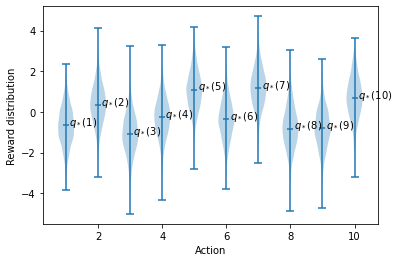

In [3]:
c2.figure_2_1(show=True) 

### figure 2.2

In [3]:
# c2.figure_2_2(show=True) 

Bandit(greedy, sample_averages)
    reward=1.02, best_action_rate=0.37
Bandit(ε-greedy=0.1, sample_averages)
    reward=1.37, best_action_rate=0.77
Bandit(ε-greedy=0.01, sample_averages)
    reward=1.25, best_action_rate=0.54


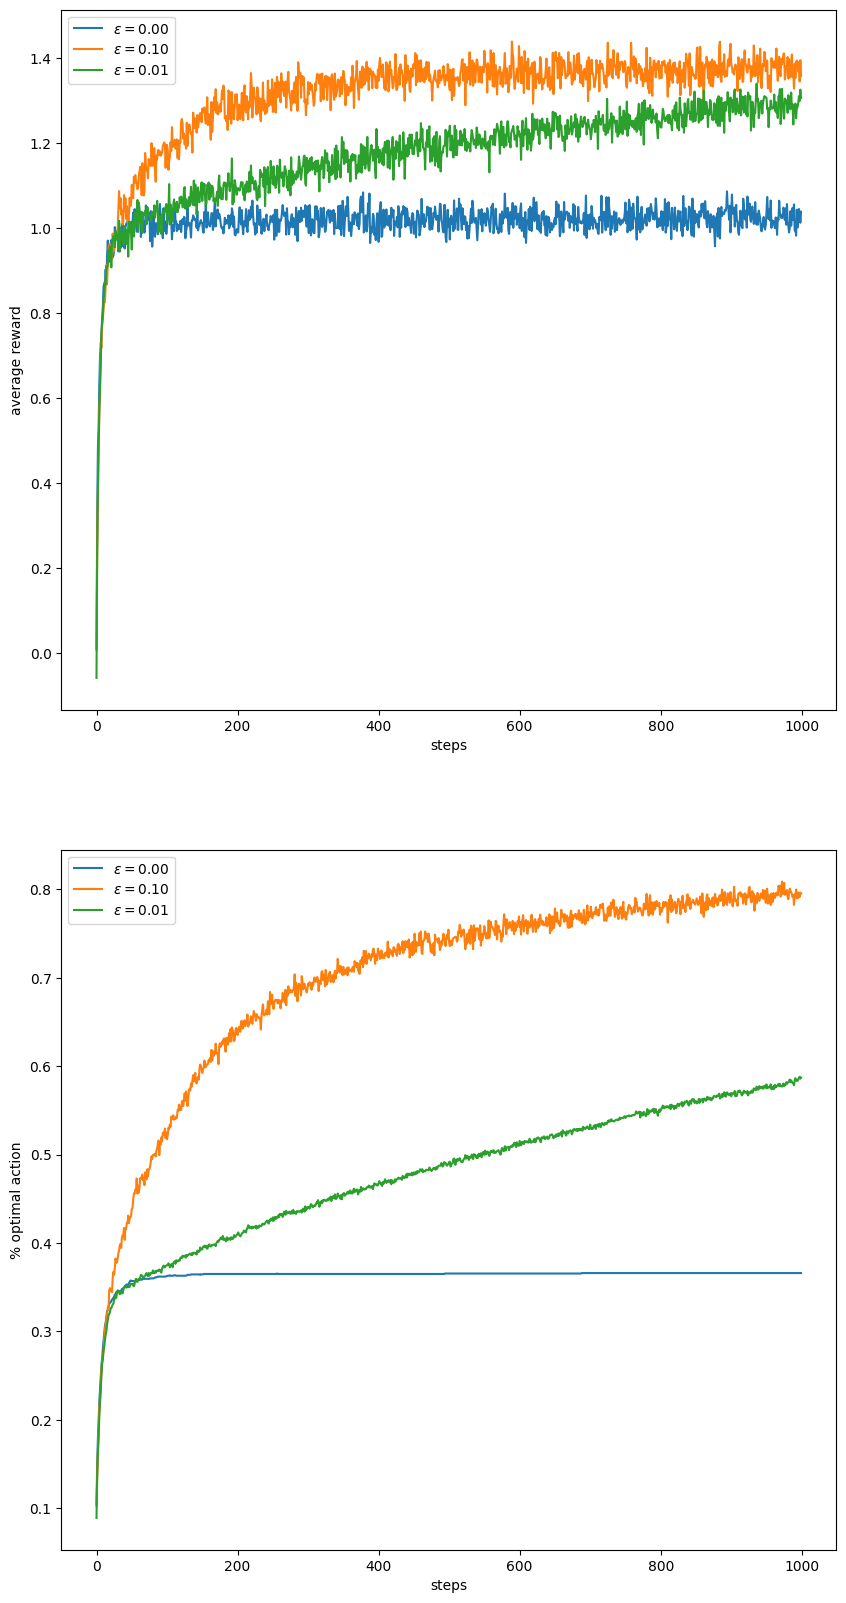

In [29]:
c2.figure_2_2(show=True, n_jobs=10) 

### exercise 2.5

In [30]:
# 练习2.5
# c2.exercise_2_5(show=True, runs=200, time=1000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, sample_averages)
    reward=1.36, best_action_rate=0.72
    init_q_true=[-0.73, 0.35, -0.45, -0.68, -0.36, -1.01, -0.09, -0.55, -0.42, -1.57] 
    q_true=[-0.62, 0.32, -0.33, -0.38, -0.1, -1.25, 0.25, -0.24, -0.3, -1.47]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, step_size=0.1)
    reward=1.43, best_action_rate=0.72
    init_q_true=[0.25, 0.27, -0.7, -0.66, -0.04, 0.67, 0.97, -0.72, -0.44, 0.79] 
    q_true=[-0.24, -0.04, -0.98, -0.44, -0.05, 0.76, 0.82, -0.8, -0.73, 1.01]


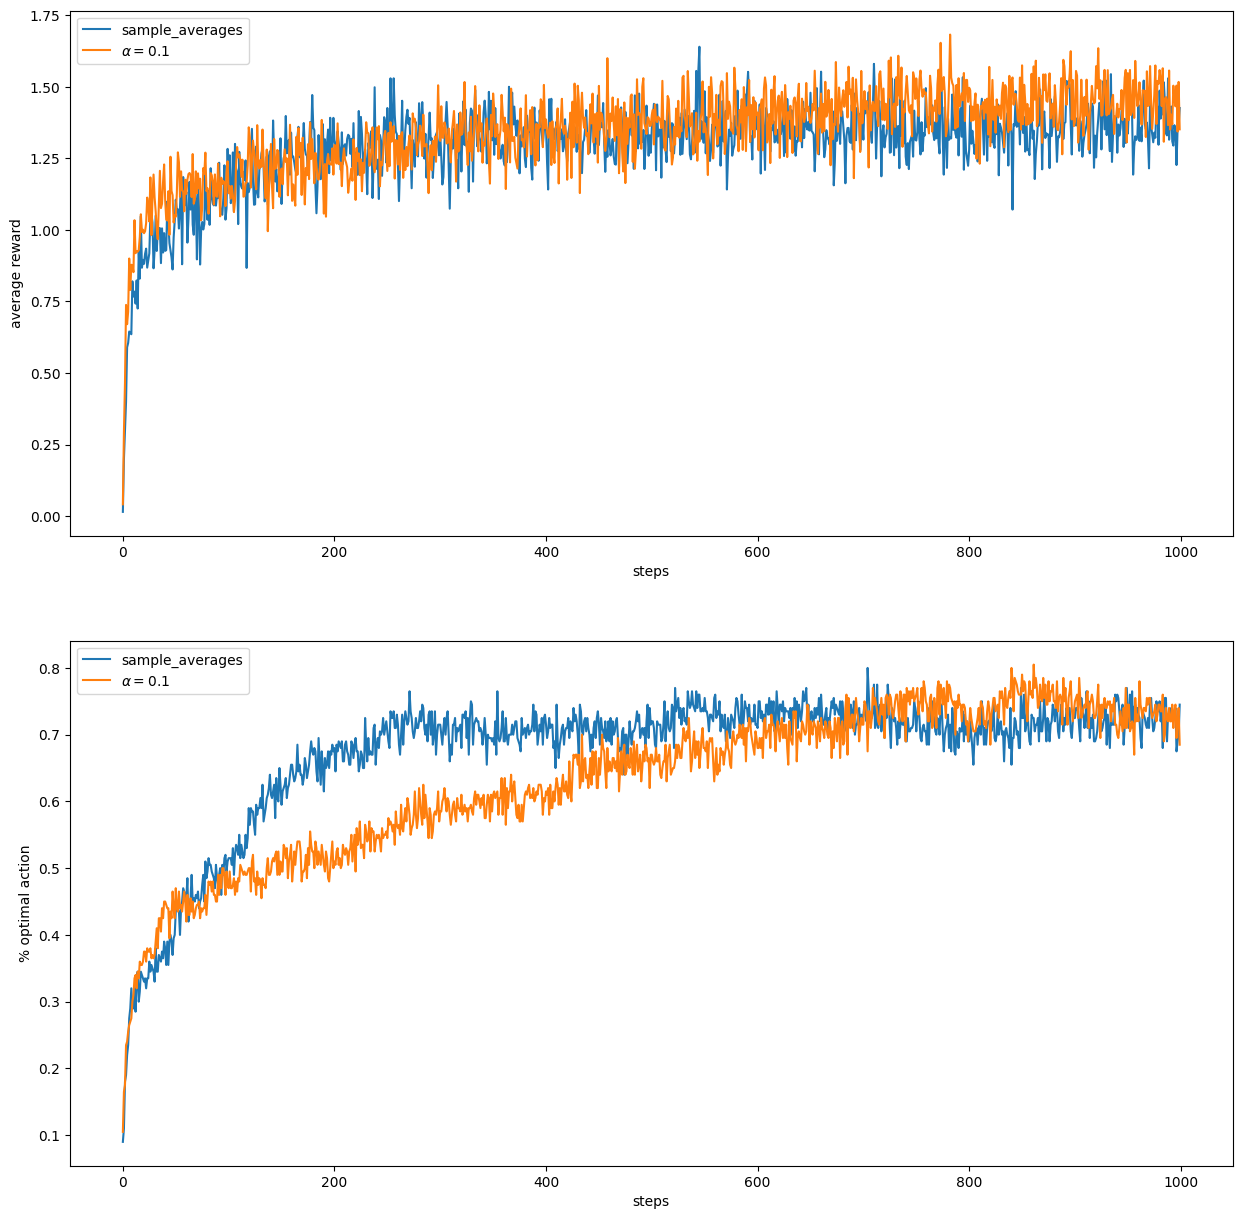

In [31]:
# 练习2.5
c2.exercise_2_5(show=True, runs=200, time=1000, n_jobs=10)

In [32]:
# c2.exercise_2_5(show=True, runs=2000, time=10000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, sample_averages)
    reward=1.70, best_action_rate=0.61
    init_q_true=[0.7, -0.7, 0.55, 0.31, 0.44, 0.57, 0.06, 0.05, 0.46, -0.71] 
    q_true=[0.2, -0.21, -0.53, 1.02, -0.75, 0.49, 0.87, -0.52, 1.13, -0.75]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, step_size=0.1)
    reward=1.82, best_action_rate=0.80
    init_q_true=[1.01, -1.23, -0.96, 0.02, -0.14, 0.54, 0.47, -0.63, -0.53, -0.23] 
    q_true=[1.1, -2.47, -1.2, 0.93, 1.16, -0.1, 0.4, 0.59, 2.44, -0.11]


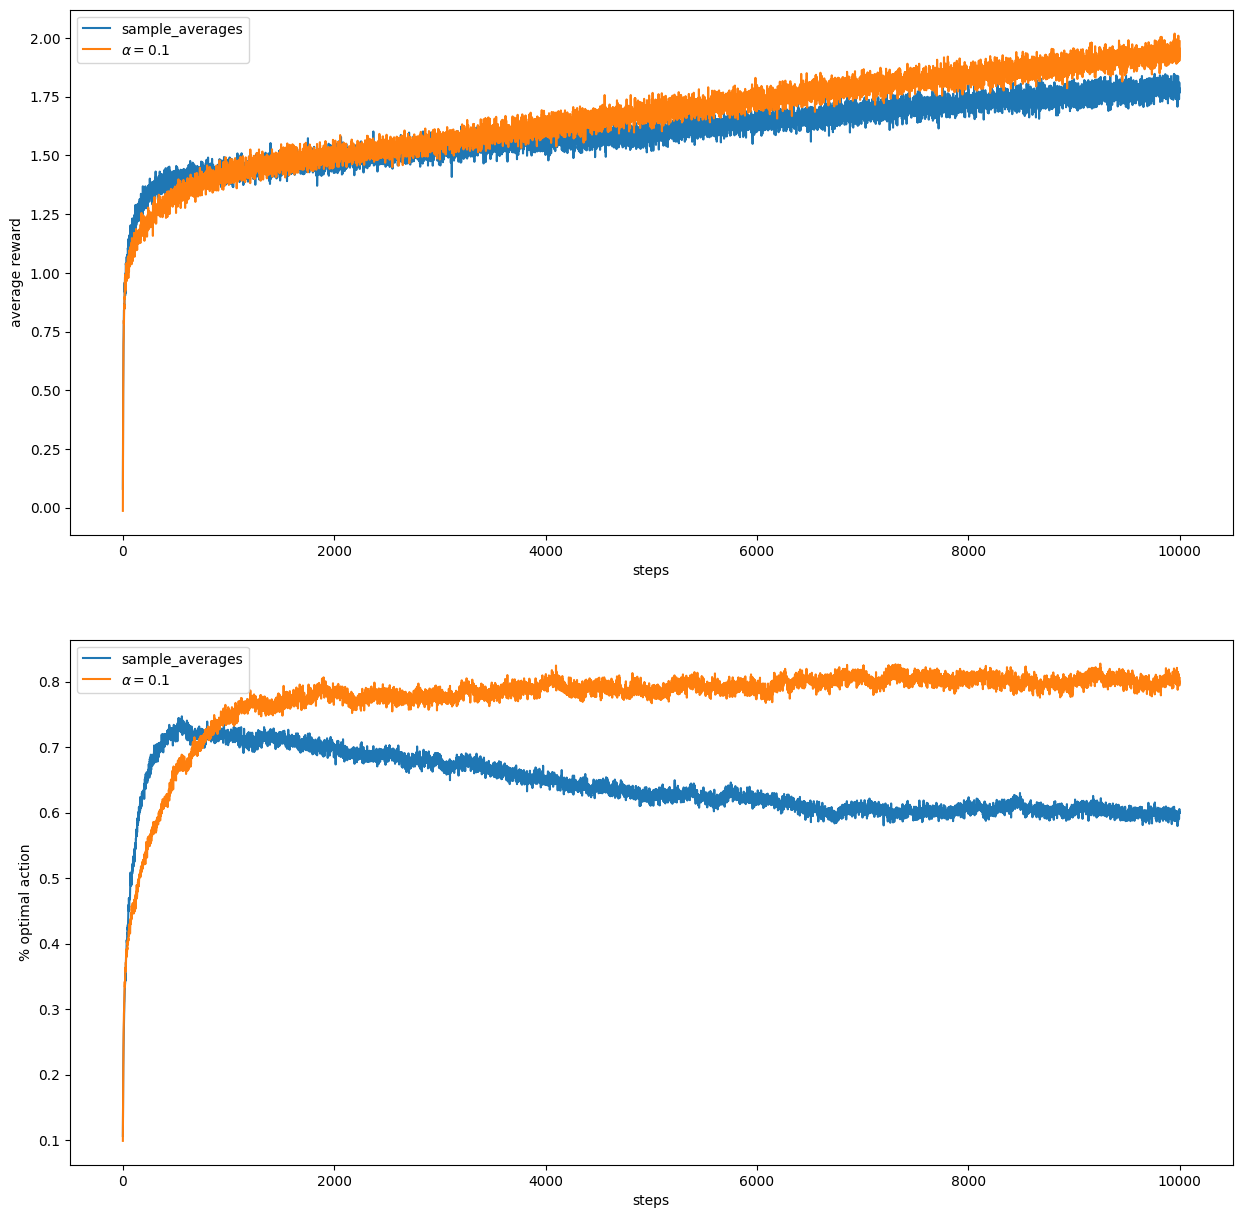

In [33]:
c2.exercise_2_5(show=True, runs=2000, time=10000, n_jobs=10) 

### figure 2.3

In [34]:
# c2.figure_2_3(show=True) 

Bandit(greedy, optimistic_initial=5, step_size=0.1)
    reward=1.47, best_action_rate=0.84
Bandit(ε-greedy=0.1, step_size=0.1)
    reward=1.33, best_action_rate=0.72


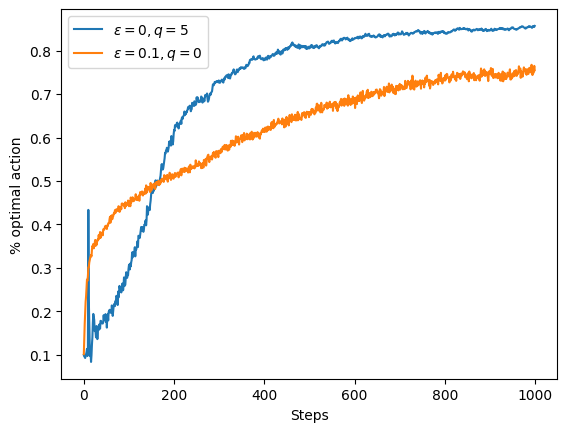

In [35]:
c2.figure_2_3(show=True, n_jobs=10) 

### figure 2.4

In [36]:
# c2.figure_2_4(show=True) 

Bandit(greedy, UCB_param=2, sample_averages)
    reward=1.46, best_action_rate=0.83
Bandit(ε-greedy=0.1, sample_averages)
    reward=1.36, best_action_rate=0.78


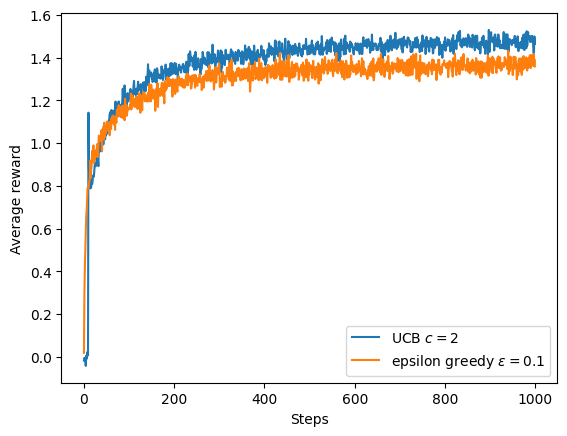

In [37]:
c2.figure_2_4(show=True, n_jobs=15) 

### figure 2.5

In [38]:
# c2.figure_2_5(show=True) 

Bandit(true_reward=4, greedy, gradient_baseline, step_size=0.1)
    reward=5.49, best_action_rate=0.84
Bandit(true_reward=4, greedy, gradient, step_size=0.1)
    reward=5.16, best_action_rate=0.46
Bandit(true_reward=4, greedy, gradient_baseline, step_size=0.4)
    reward=5.46, best_action_rate=0.71
Bandit(true_reward=4, greedy, gradient, step_size=0.4)
    reward=4.80, best_action_rate=0.28


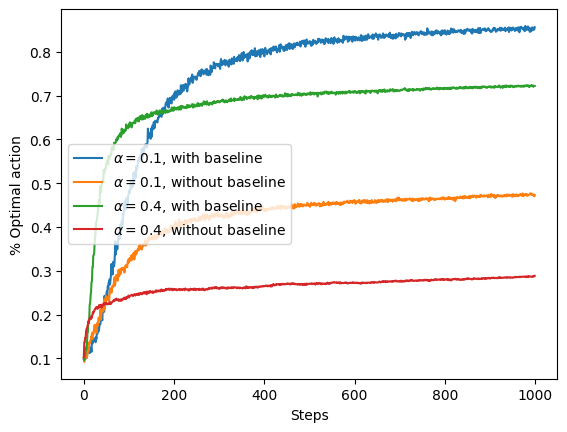

In [39]:
c2.figure_2_5(show=True, n_jobs=10) 

In [40]:
# c2.figure_2_5(show=True, true_reward=0) 

Bandit(greedy, gradient_baseline, step_size=0.1)
    reward=1.48, best_action_rate=0.84
Bandit(greedy, gradient, step_size=0.1)
    reward=1.49, best_action_rate=0.83
Bandit(greedy, gradient_baseline, step_size=0.4)
    reward=1.45, best_action_rate=0.72
Bandit(greedy, gradient, step_size=0.4)
    reward=1.42, best_action_rate=0.69


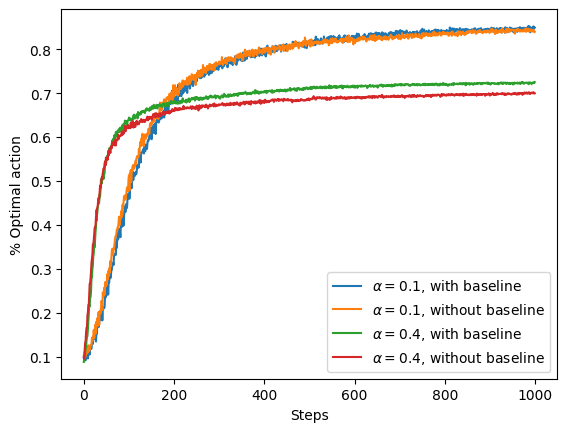

In [41]:
c2.figure_2_5(show=True, true_reward=0, n_jobs=10) 

### figure 2.6

In [42]:
# c2.figure_2_6(show=True) 

Bandit(ε-greedy=0.0078125, sample_averages)
    reward=1.24, best_action_rate=0.52
Bandit(ε-greedy=0.015625, sample_averages)
    reward=1.32, best_action_rate=0.62
Bandit(ε-greedy=0.03125, sample_averages)
    reward=1.40, best_action_rate=0.73
Bandit(ε-greedy=0.0625, sample_averages)
    reward=1.39, best_action_rate=0.77
Bandit(ε-greedy=0.125, sample_averages)
    reward=1.33, best_action_rate=0.78
Bandit(ε-greedy=0.25, sample_averages)
    reward=1.14, best_action_rate=0.70
Bandit(ε-greedy=0.0078125, step_size=0.1)
    reward=1.28, best_action_rate=0.55
Bandit(ε-greedy=0.015625, step_size=0.1)
    reward=1.30, best_action_rate=0.57
Bandit(ε-greedy=0.03125, step_size=0.1)
    reward=1.34, best_action_rate=0.64
Bandit(ε-greedy=0.0625, step_size=0.1)
    reward=1.34, best_action_rate=0.68
Bandit(ε-greedy=0.125, step_size=0.1)
    reward=1.30, best_action_rate=0.72
Bandit(ε-greedy=0.25, step_size=0.1)
    reward=1.14, best_action_rate=0.66
Bandit(greedy, gradient_baseline, step_size=0.

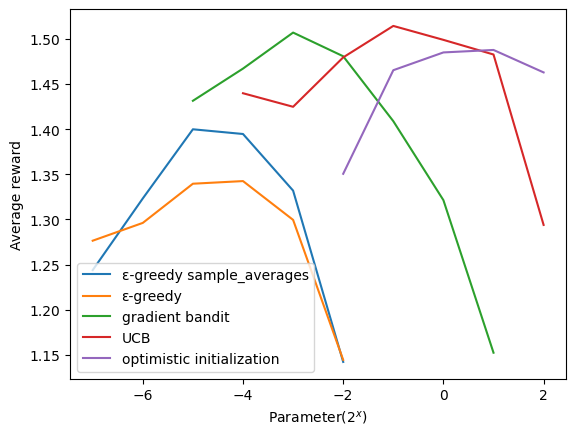

In [43]:
c2.figure_2_6(show=True, n_jobs=10) 

### exercise 2.11

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0078125, sample_averages)
    reward=1.24, best_action_rate=0.45
    init_q_true=[-0.02, -0.6, -0.06, 0.9, 0.83, 0.17, 1.7, -0.33, -0.51, -0.18] 
    q_true=[-0.22, -0.41, -0.11, 1.43, 0.78, 0.43, 2.26, -0.16, -0.95, -0.22]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.015625, sample_averages)
    reward=1.37, best_action_rate=0.57
    init_q_true=[1.22, -1.59, 2.09, 0.12, 0.36, -1.09, 0.21, -1.31, -0.1, -0.65] 
    q_true=[1.29, -1.66, 2.32, 0.02, 0.33, -1.56, 0.06, -2.14, 0.09, -1.05]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.03125, sample_averages)
    reward=1.38, best_action_rate=0.60
    init_q_true=[1.67, 0.73, -1.56, 0.23, -0.69, 0.11, 1.07, 0.58, 1.84, 0.86] 
    q_true=[1.77, 0.73, -1.76, 0.66, -0.99, 0.33, 0.52, 0.51, 2.15, 0.66]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0625, sample_averages)
    reward=1.51, best_action_rate=0.74
    init_q_true=[-1.39, -1.37, -0.36, 1

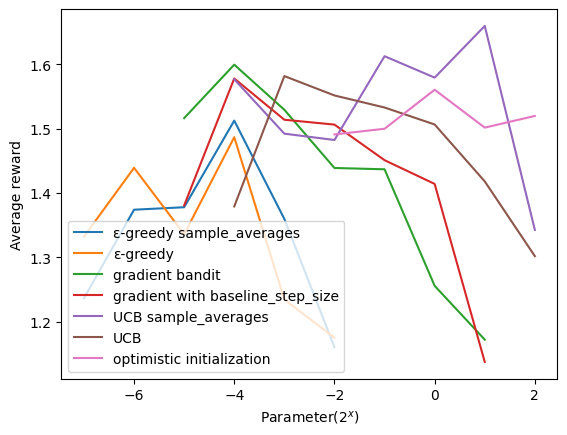

In [44]:
c2.exercise_2_11(show=True, runs=100, time=1000, n_jobs=10) 

In [45]:
# c2.exercise_2_11(show=True, runs=100, time=1000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0078125, sample_averages)
    reward=2.10, best_action_rate=0.59
    init_q_true=[0.2, -1.01, -1.08, 0.37, 0.32, 0.4, -0.84, -0.06, 1.17, -0.67] 
    q_true=[-0.26, 0.72, -0.59, 0.76, 0.35, 0.21, -1.36, -0.16, 0.83, -2.91]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.015625, sample_averages)
    reward=2.06, best_action_rate=0.58
    init_q_true=[-0.45, 0.76, -1.03, 1.25, -0.87, -0.34, 0.1, 0.15, 0.59, -1.39] 
    q_true=[0.91, -0.07, -1.65, 2.76, 0.46, -0.76, -0.42, -0.81, -1.79, -1.96]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.03125, sample_averages)
    reward=2.05, best_action_rate=0.59
    init_q_true=[0.32, -0.52, -1.57, 2.82, 0.5, 1.59, -0.82, -0.17, -0.66, -1.13] 
    q_true=[1.02, 0.55, 0.65, 4.52, 1.87, 1.53, -3.96, 0.17, -0.25, -2.18]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0625, sample_averages)
    reward=2.01, best_action_rate=0.58
    init_q_true=[-1.09, 1.53, 0.0

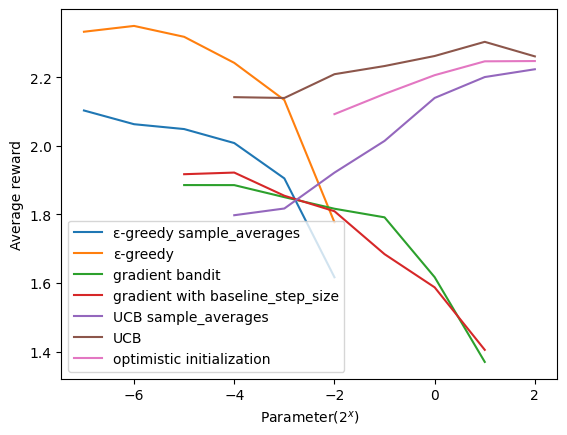

In [46]:
c2.exercise_2_11(show=True, runs=2000, time=20000, n_jobs=18)

In [47]:
#c2.exercise_2_11(show=True, runs=2000, time=20000) 

## chapter 3

### figure_3_2

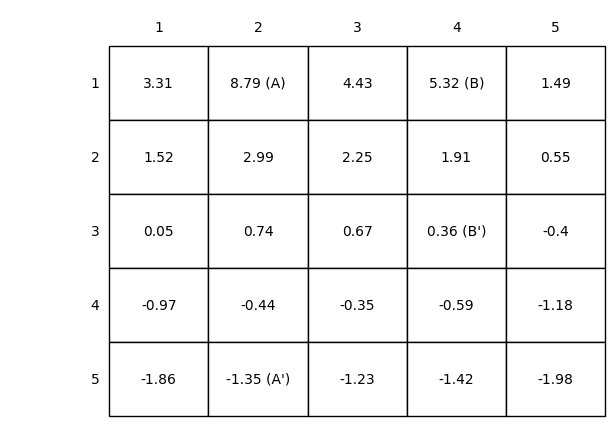

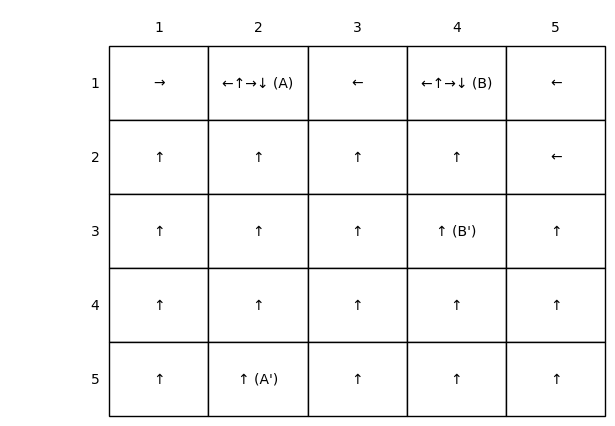

after 77 iteration the status value function converges


In [15]:
c3.figure_3_2(True)

### figure_3_2_linear_system

这个线性方程组 $$Ax = b$$ 的设定非常巧妙。

- 对角线为 $$-1$$
- 其他节点 $$(i, j)$$ 表示 $$\pi(a|s)  \gamma$$

其中的任一方程构建过程如下。第一个根据贝尔曼方程可得：

$$
\begin{split}\begin{aligned}
v_\pi(s) &= \sum_a \pi(a|s)  [r+\gamma v_\pi(s^a)] \\
\sum_a \pi(a|s)  \gamma v_\pi(s^a) - v_\pi(s) &= -\sum_a \pi(a|s) r \\
\begin{bmatrix} \pi(south|s)\gamma & \pi(north|s)\gamma & \pi(east|s)\gamma & \pi(west|s)\gamma & -1 \end{bmatrix} \begin{bmatrix} v_\pi(s^{north}) \\ v_\pi(s^{south}) \\ v_\pi(s^{east}) \\ v_\pi(s^{west}) \\ v_\pi(s) \end{bmatrix} &= -\sum_a \pi(a|s) r
\end{aligned}\end{split} 
$$


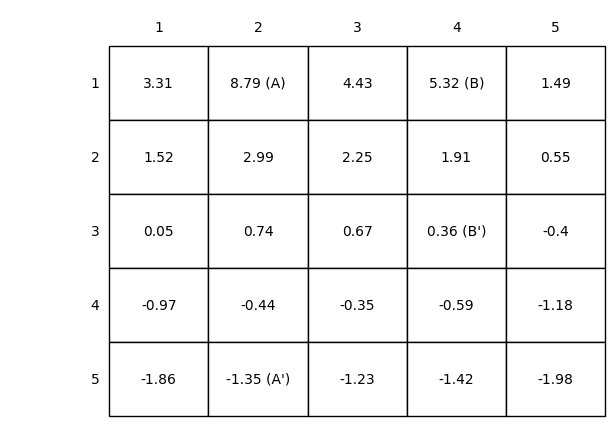

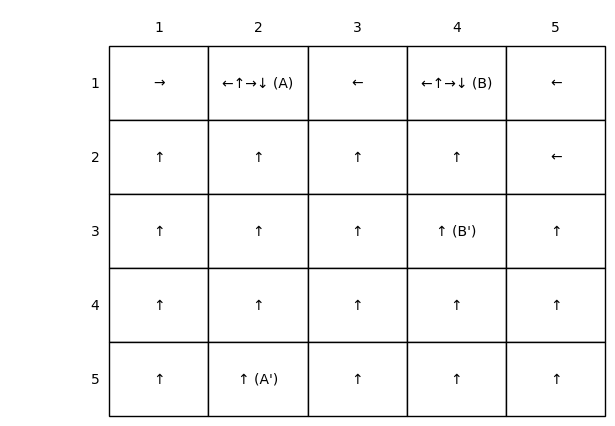

In [14]:
c3.figure_3_2_linear_system(True)

### figure_3_5

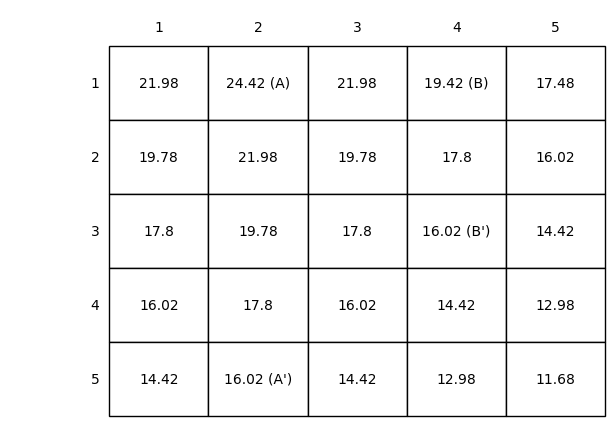

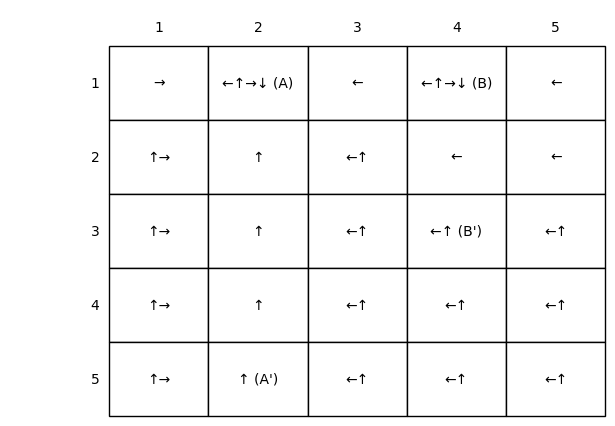

after 124 iteration the status value function converges


In [16]:
c3.figure_3_5(True)

## chapter 4

### figure_4_1

看起来 In-place 迭代次数要少，但是由于 Synchronous 可以并发处理，所以可能还是Synchronous更快。

In-place: 113 iterations


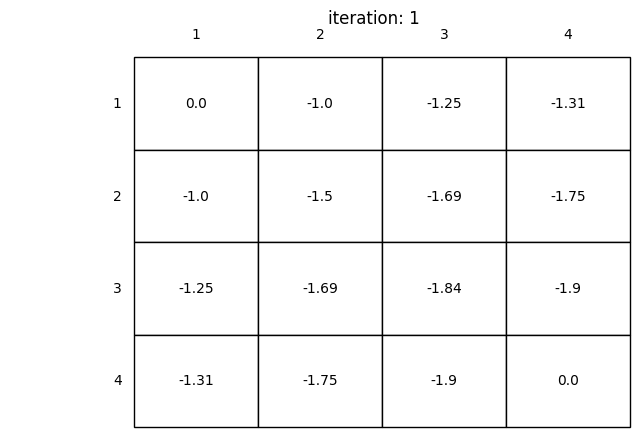

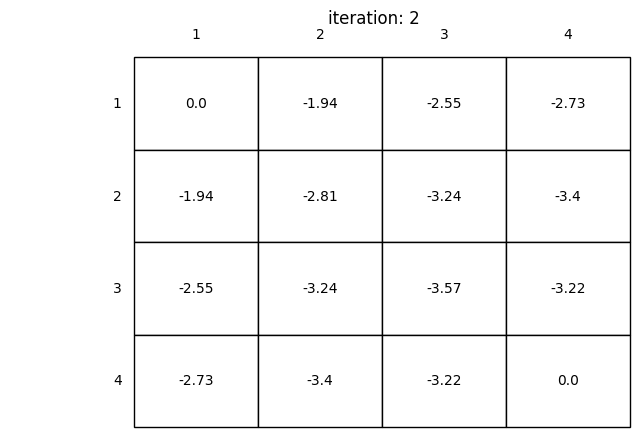

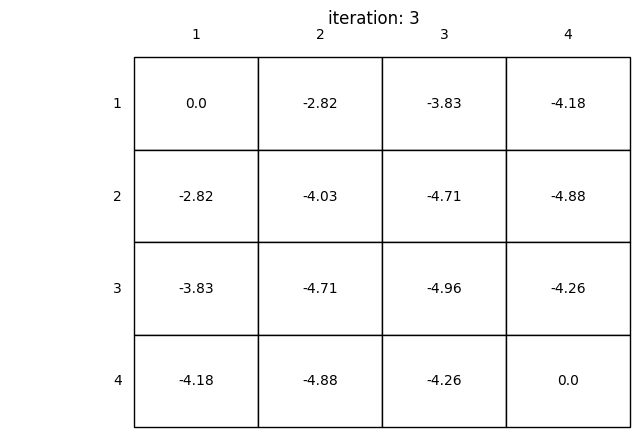

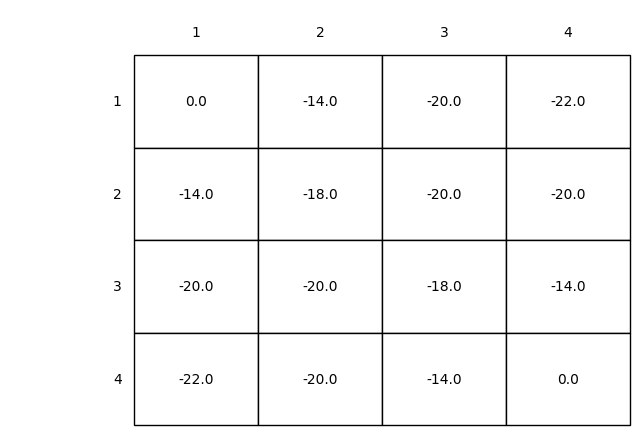

Synchronous: 172 iterations


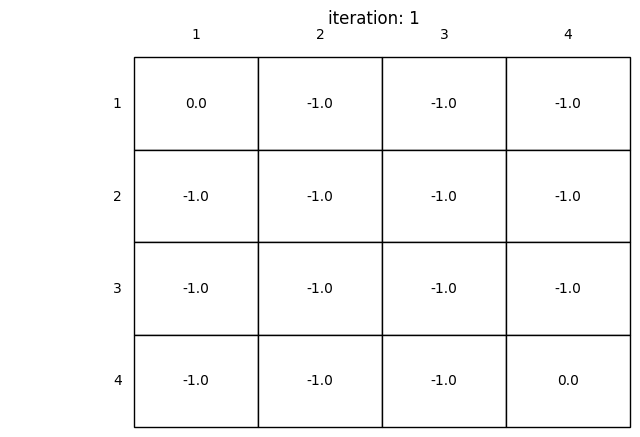

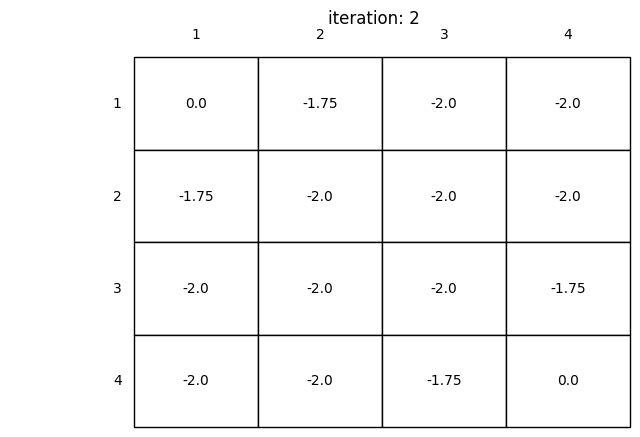

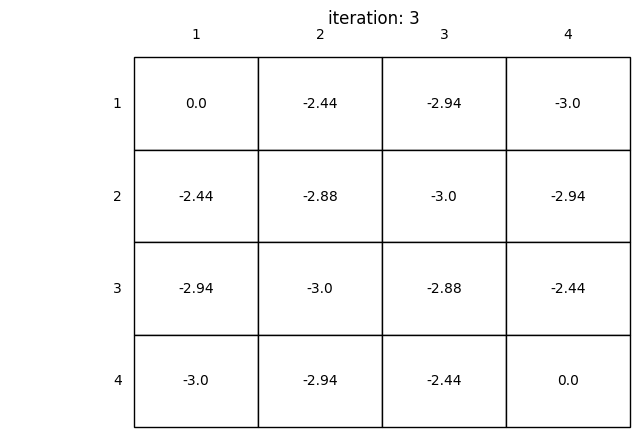

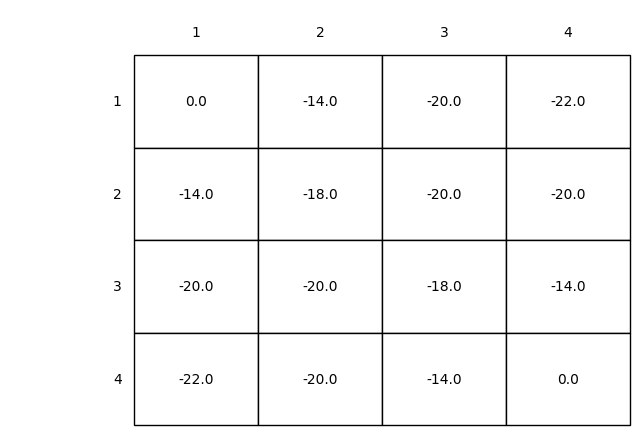

In [5]:
# 价值评估  
#                 value = 0
#                 for action in ACTIONS:
#                     (next_i, next_j), reward = step([i, j], action)
#                     value += ACTION_PROB * (reward + discount * state_values[next_i, next_j])
#                 new_state_values[i, j] = value
c4.grid_world.figure_4_1(True)

In-place: 3 iterations


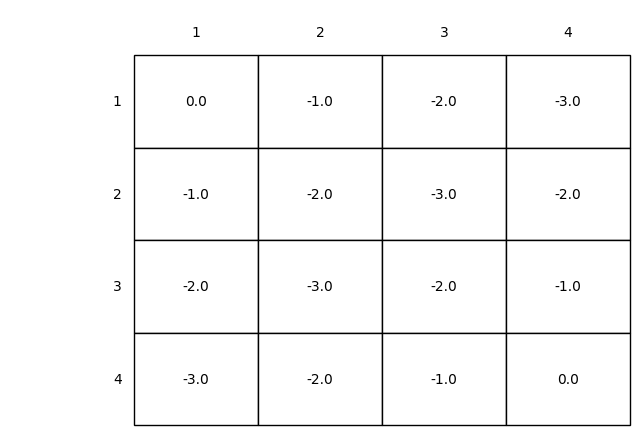

Synchronous: 3 iterations


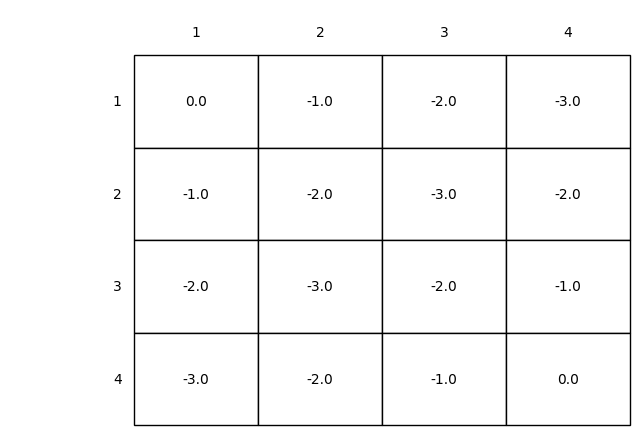

In [43]:
# 价值迭代  
#                 values = []
#                 for action in ACTIONS:
#                     (next_i, next_j), reward = step([i, j], action)
#                     values.append(reward + discount * state_values[next_i, next_j])
#                 new_state_values[i, j] = np.max(values)
c4.grid_world.figure_4_11(True)

### figure_4_2

**例4.2: 杰克汽车出租** 杰克为一个全国性的汽车租赁公司管理两个网点。每天，一些顾客会到网点租车。每租一辆车，杰克可以从租赁公司得到 10 美元报酬。但如果租车时，该网点没车，这次生意就泡汤了。汽车返回来后，还可以再次出租。为了保证网点有车，杰克可以在晚上把车在两个网点转移，每次转移的成本是 2 美元。为了简化问题，我们进行如下假定：

- 每个网点汽车需要的数量和返回的数量是泊松随机变量（Poisson random variables），也就是数量是 n 的概率为 $\frac{\lambda^n}{n!}e^{-\lambda}$。两个网点的租车需求 $\lambda $ 分别是 $3$ 和 $4$，而返回的数量的 $\lambda$ 分别是 $3$ 和 $2$。
- 每个网点的车辆不会超过20辆（任何多余的车都将会被送回租赁公司，从问题中消失）
- 一个晚上，最多五辆车可以进行转移。 
- 衰减因子 $\gamma=0.9$

这个问题可以看做连续有限MDP，时间步骤是天数， 状态是每天结束时网点剩余车子的数量，动作是每晚车子在两个网点之间转移的净数量。 图4.2展示的是：从不转移任何车子的策略开始，到通过策略迭代找到的一系列策略。

以下程序中:


car_rental 对于[网上的版本](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter04/car_rental.py)，做了一点修改。 去掉了 POISSON_UPPER_BOUND  的限制，这样更加符合实际的情况。但最优策略相同。

#### in_place
- in_place=True: 每一次价值函数被更新后，下一次更新可以用到最新的价值函数。
- in_place=False: 策略评估的一次迭代中，每次更新用到的价值函数是上一次迭代的值。
  ~~~
            old_value = value.copy()            
            for i in range(MAX_CARS + 1):
                for j in range(MAX_CARS + 1):
                    if in_place:
                        new_state_value = expected_return([i, j], policy[i, j], value, constant_returned_cars)
                    else:
                        new_state_value = expected_return([i, j], policy[i, j], old_value, constant_returned_cars)
                    value[i, j] = new_state_value
  ~~~

In [64]:
values, policies = c4.car_rental.figure_4_2(in_place=True, constant_returned_cars=True, show=True) 

2024-01-07 08:45:22,829: INFO: after 10 iteration: max value change 20.182621174
2024-01-07 08:45:24,565: INFO: after 20 iteration: max value change 4.6258524111
2024-01-07 08:45:26,318: INFO: after 30 iteration: max value change 0.9933278918
2024-01-07 08:45:28,063: INFO: after 40 iteration: max value change 0.2073998219
2024-01-07 08:45:29,849: INFO: after 50 iteration: max value change 0.0426586301
2024-01-07 08:45:31,654: INFO: after 60 iteration: max value change 0.0087006785
2024-01-07 08:45:33,438: INFO: after 70 iteration: max value change 0.001766079
2024-01-07 08:45:35,221: INFO: after 80 iteration: max value change 0.000357486
2024-01-07 08:45:38,378: INFO: policy stable False
2024-01-07 08:45:40,119: INFO: after 10 iteration: max value change 0.3781895355
2024-01-07 08:45:41,827: INFO: after 20 iteration: max value change 0.0706254926
2024-01-07 08:45:43,583: INFO: after 30 iteration: max value change 0.0131748633
2024-01-07 08:45:45,370: INFO: after 40 iteration: max value

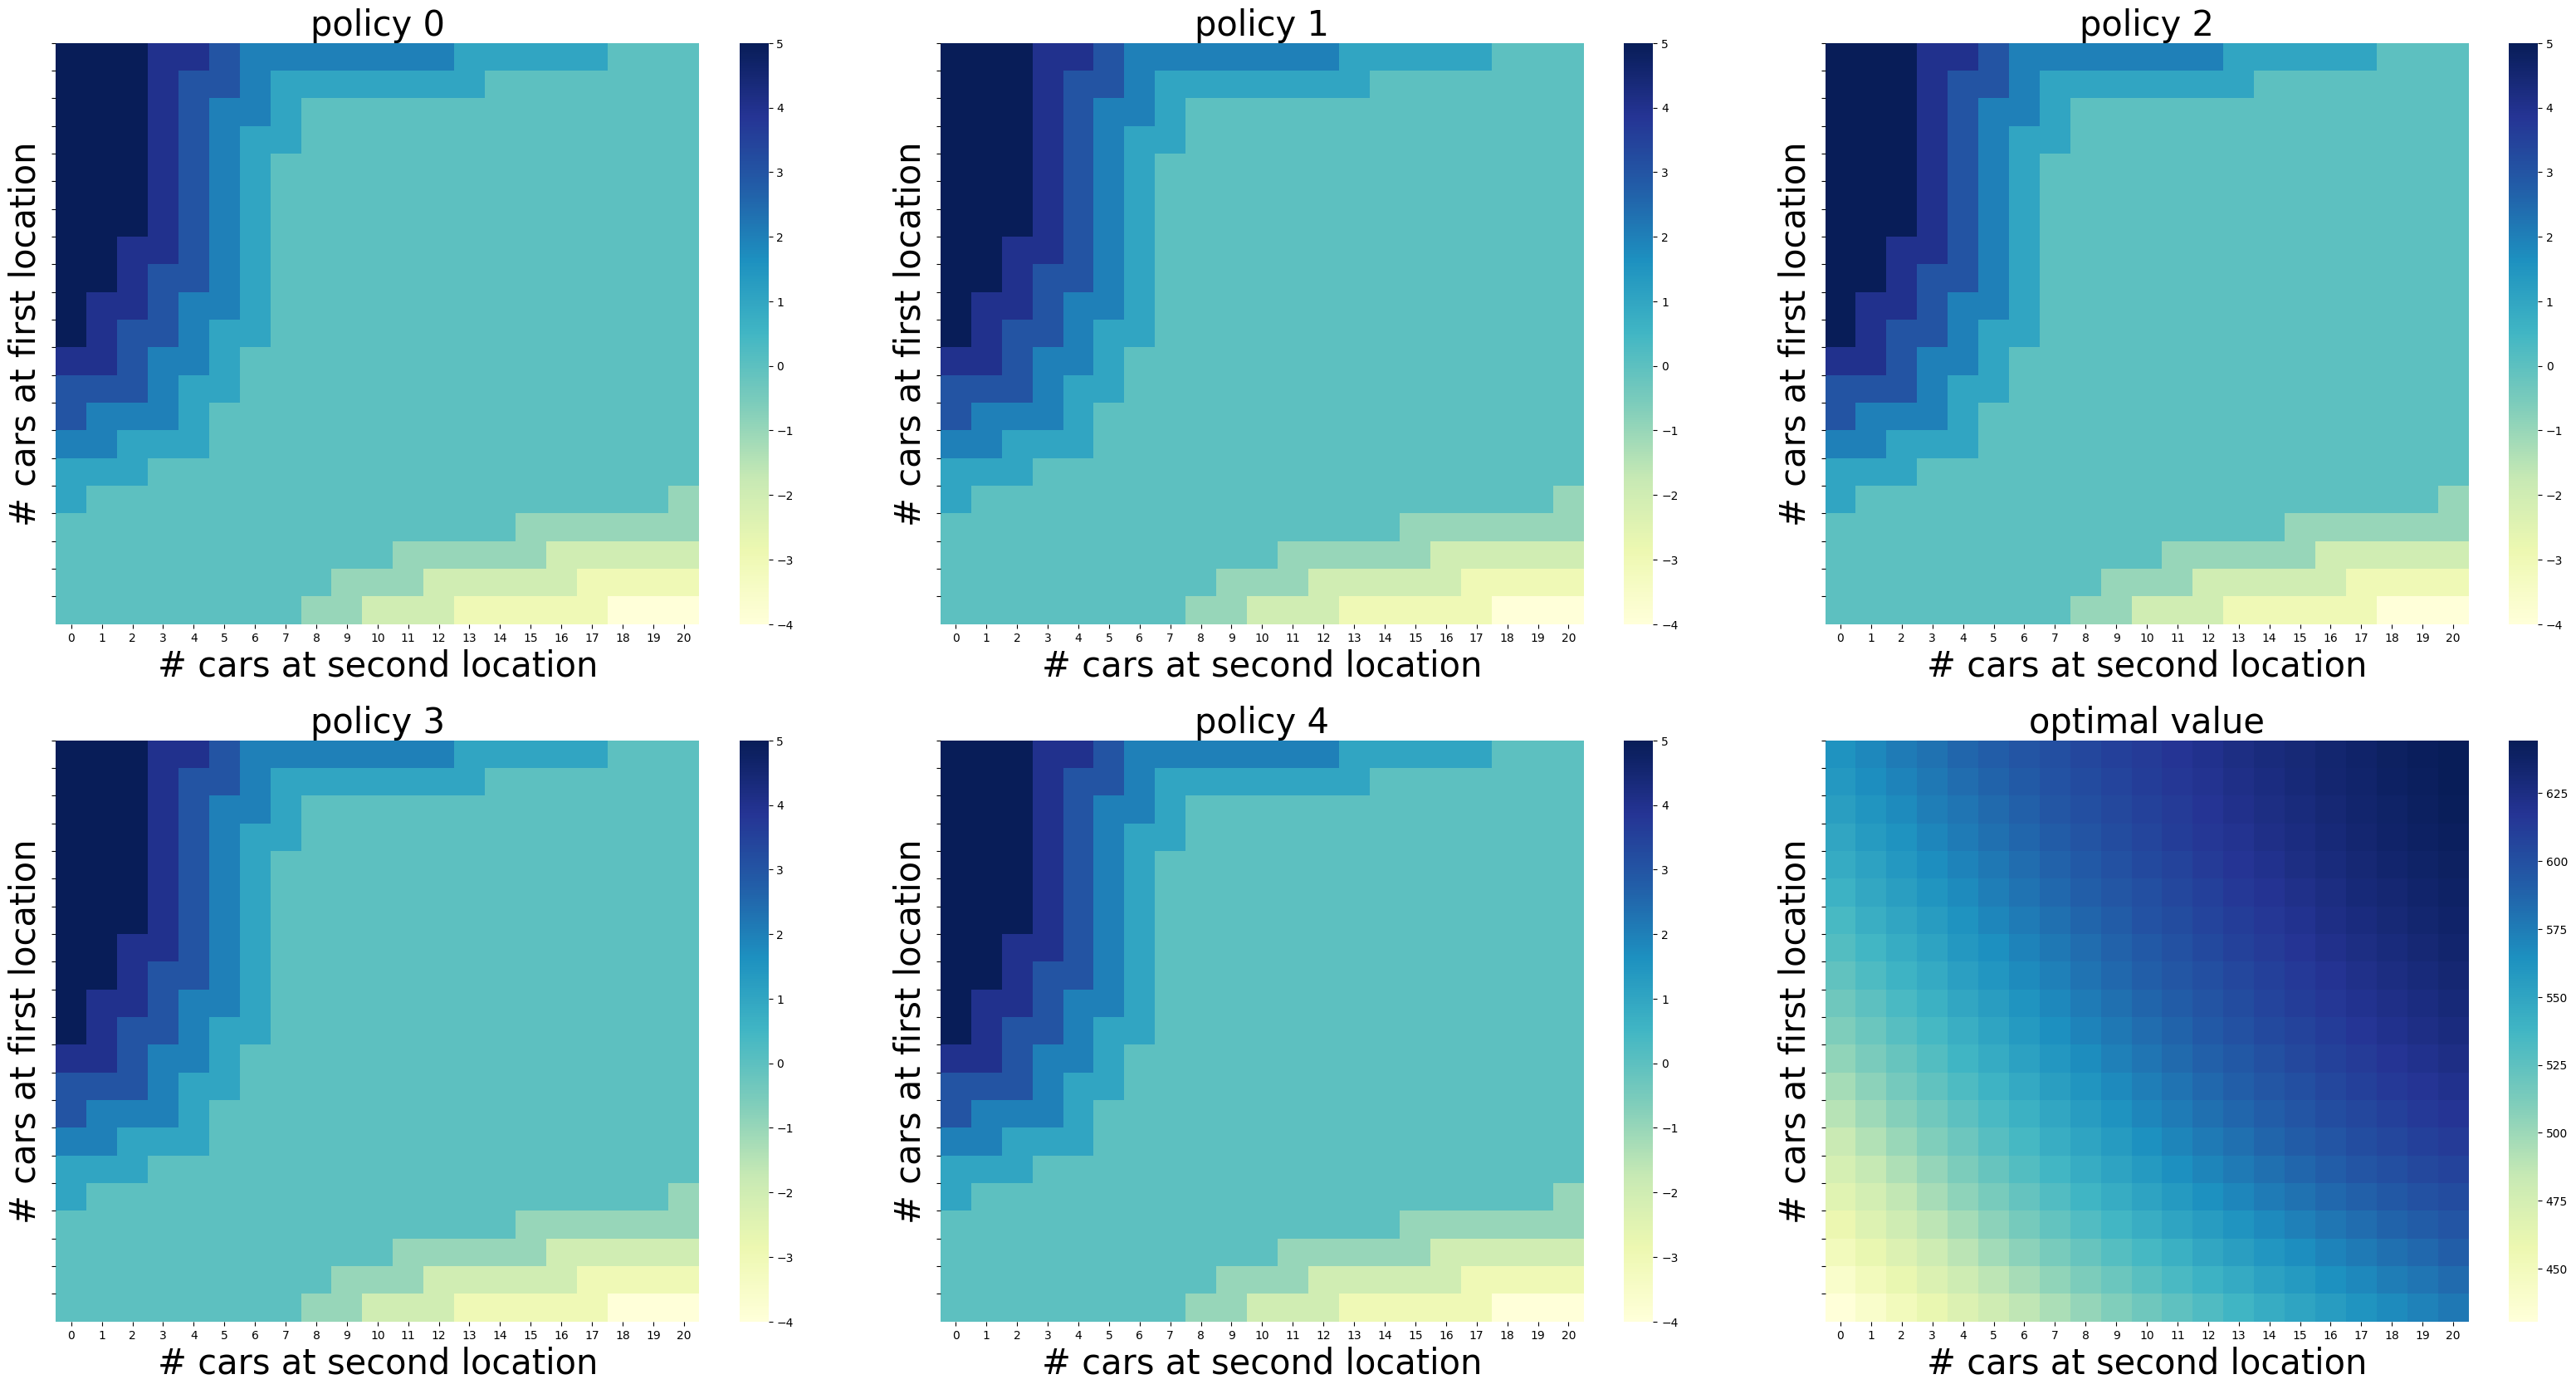

In [65]:
c4.car_rental.plot_policies(values, policies)

In [72]:
print(np.round(values[-1][0:10, 0:10])) 
print(policies[-1])

[[431. 440. 450. 460. 469. 478. 487. 495. 503. 510.]
 [440. 450. 460. 470. 479. 488. 497. 505. 512. 519.]
 [450. 460. 470. 479. 489. 497. 506. 514. 521. 529.]
 [459. 468. 478. 488. 497. 506. 515. 523. 530. 537.]
 [466. 476. 486. 496. 505. 514. 522. 530. 538. 545.]
 [474. 484. 494. 503. 512. 521. 529. 537. 544. 551.]
 [482. 492. 501. 510. 519. 528. 536. 543. 551. 557.]
 [490. 499. 508. 517. 526. 534. 542. 549. 556. 563.]
 [497. 506. 515. 524. 532. 540. 547. 555. 561. 568.]
 [504. 513. 522. 530. 538. 545. 553. 560. 566. 573.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

In [66]:
# inplace=False 比 inplace=True 运行时间要多30%
values, policies = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=True, show=True) 

2024-01-07 08:47:08,146: INFO: after 10 iteration: max value change 22.1726702935
2024-01-07 08:47:09,934: INFO: after 20 iteration: max value change 6.7379793096
2024-01-07 08:47:11,740: INFO: after 30 iteration: max value change 2.3379688146
2024-01-07 08:47:13,568: INFO: after 40 iteration: max value change 0.8129558351
2024-01-07 08:47:15,365: INFO: after 50 iteration: max value change 0.2829205657
2024-01-07 08:47:17,167: INFO: after 60 iteration: max value change 0.0985215891
2024-01-07 08:47:18,938: INFO: after 70 iteration: max value change 0.0343228134
2024-01-07 08:47:20,724: INFO: after 80 iteration: max value change 0.0119607527
2024-01-07 08:47:22,495: INFO: after 90 iteration: max value change 0.0041688588
2024-01-07 08:47:24,297: INFO: after 100 iteration: max value change 0.0014532198
2024-01-07 08:47:26,080: INFO: after 110 iteration: max value change 0.0005066201
2024-01-07 08:47:27,876: INFO: after 120 iteration: max value change 0.0001766274
2024-01-07 08:47:30,633:

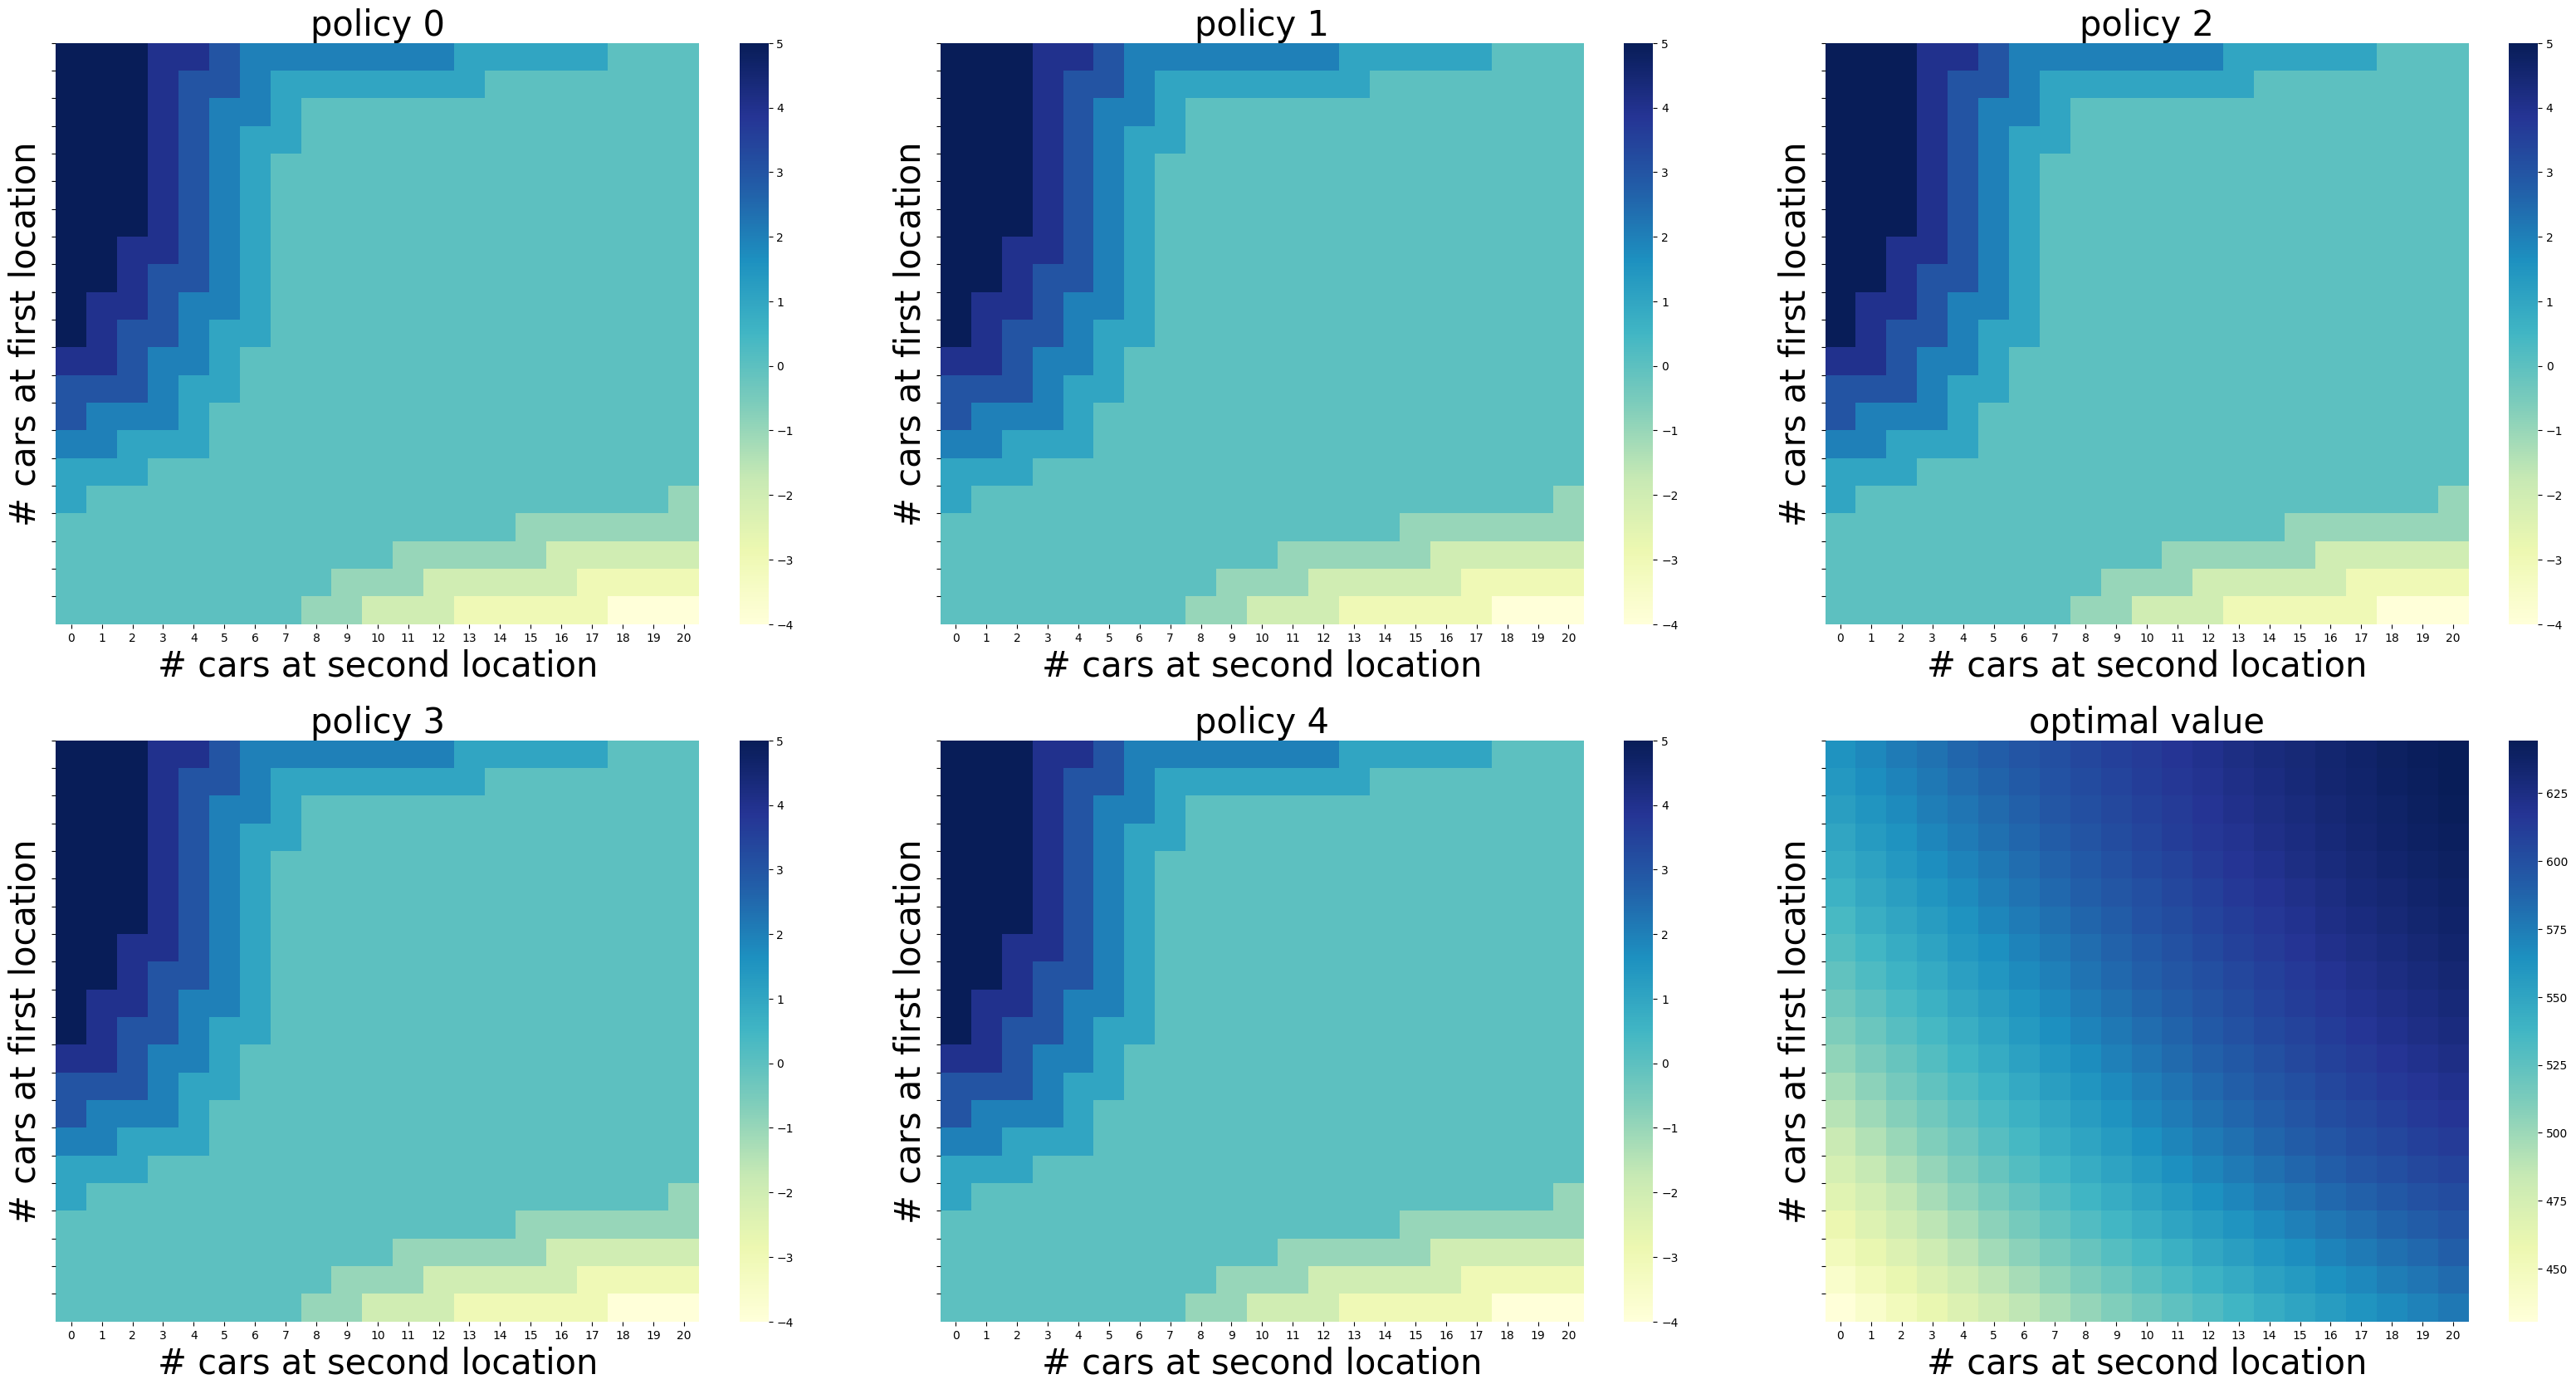

In [74]:
c4.car_rental.plot_policies(values, policies)

In [75]:
print(np.round(values[-1][0:10, 0:10])) 
print(policies[-1])

[[431. 440. 450. 460. 469. 478. 487. 495. 503. 510.]
 [440. 450. 460. 470. 479. 488. 497. 505. 512. 519.]
 [450. 460. 470. 479. 489. 497. 506. 514. 521. 529.]
 [459. 468. 478. 488. 497. 506. 515. 523. 530. 537.]
 [466. 476. 486. 496. 505. 514. 522. 530. 538. 545.]
 [474. 484. 494. 503. 512. 521. 529. 537. 544. 551.]
 [482. 492. 501. 510. 519. 528. 536. 543. 551. 557.]
 [490. 499. 508. 517. 526. 534. 542. 549. 556. 563.]
 [497. 506. 515. 524. 532. 540. 547. 555. 561. 568.]
 [504. 513. 522. 530. 538. 545. 553. 560. 566. 573.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

#### parallel

##### joblib

采用joblib进行并行处理

由于是并行运行，只能是in_place=False。
~~~
    value = Parallel(n_jobs=n_jobs)(delayed(expected_return)([i, j], policy[i, j], old_value, constant_returned_cars) 
                                    for i in range(MAX_CARS + 1) 
                                    for j in range(MAX_CARS + 1)) 
    value = np.array(value)
    value = value.reshape(MAX_CARS + 1, MAX_CARS + 1)
~~~

In [67]:
# 虽然并行度是10，但是只提高20秒。原因每一个底层循环计算的都比较快。
values_p, policies_p = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=True, show=True, n_jobs=10) 

2024-01-07 08:48:33,110: INFO: after 10 iteration: max value change 22.1726702935
2024-01-07 08:48:34,495: INFO: after 20 iteration: max value change 6.7379793096
2024-01-07 08:48:35,871: INFO: after 30 iteration: max value change 2.3379688146
2024-01-07 08:48:37,239: INFO: after 40 iteration: max value change 0.8129558351
2024-01-07 08:48:38,645: INFO: after 50 iteration: max value change 0.2829205657
2024-01-07 08:48:39,995: INFO: after 60 iteration: max value change 0.0985215891
2024-01-07 08:48:41,365: INFO: after 70 iteration: max value change 0.0343228134
2024-01-07 08:48:42,935: INFO: after 80 iteration: max value change 0.0119607527
2024-01-07 08:48:44,306: INFO: after 90 iteration: max value change 0.0041688588
2024-01-07 08:48:45,696: INFO: after 100 iteration: max value change 0.0014532198
2024-01-07 08:48:47,059: INFO: after 110 iteration: max value change 0.0005066201
2024-01-07 08:48:48,455: INFO: after 120 iteration: max value change 0.0001766274
2024-01-07 08:48:49,509:

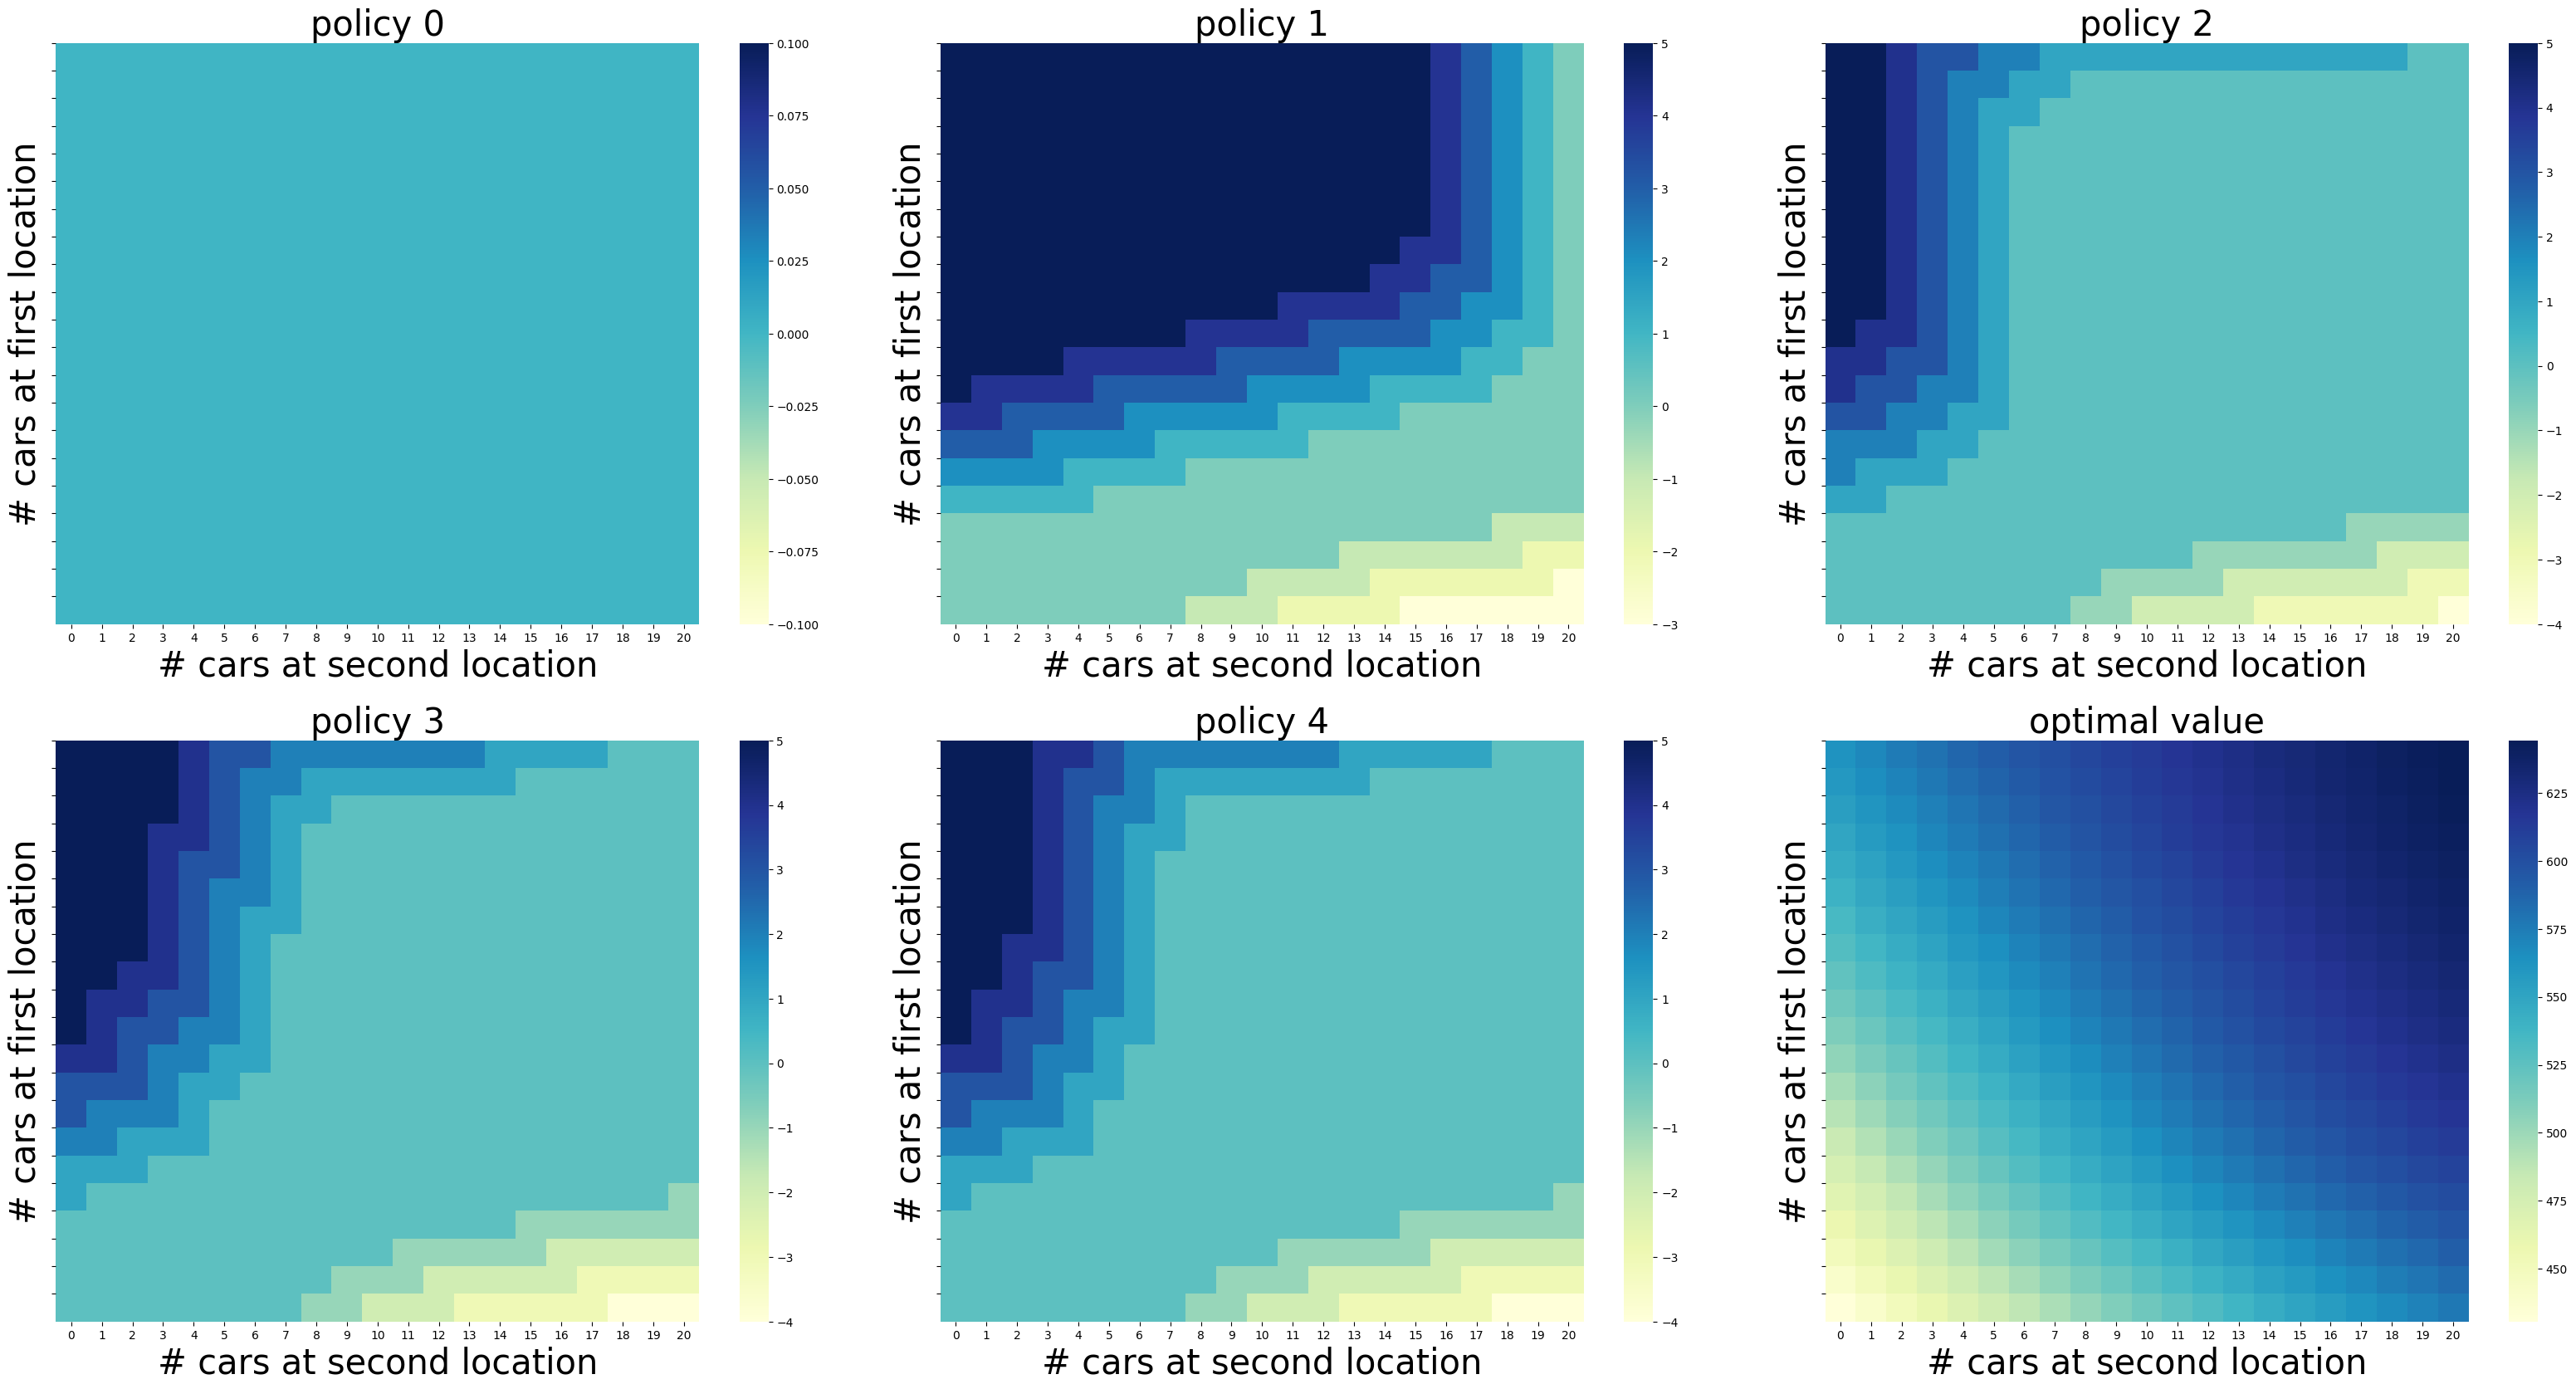

In [77]:
c4.car_rental.plot_policies(values_p, policies_p)

In [78]:
# np.testing.assert_array_equal(values[-1], values_p[-1])  # 为啥不相等呢
np.testing.assert_array_equal(policies[-1], policies_p[-1])

In [79]:
# 如果还车时，也不是固定值，这个时候并行计算，能够提高很多。 从50分钟减少到9分钟
values_p, policies_p = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=False, show=True, n_jobs=10) 

2023-03-12 04:20:11,348: INFO: after 10 iteration: max value change 21.7877345644
2023-03-12 04:20:23,722: INFO: after 20 iteration: max value change 6.6657871395
2023-03-12 04:20:37,549: INFO: after 30 iteration: max value change 2.3001814354
2023-03-12 04:20:50,548: INFO: after 40 iteration: max value change 0.7991071964
2023-03-12 04:21:04,626: INFO: after 50 iteration: max value change 0.2781520172
2023-03-12 04:21:18,903: INFO: after 60 iteration: max value change 0.0969058971
2023-03-12 04:21:31,510: INFO: after 70 iteration: max value change 0.0337757402
2023-03-12 04:21:45,004: INFO: after 80 iteration: max value change 0.0117746678
2023-03-12 04:21:58,323: INFO: after 90 iteration: max value change 0.0041052062
2023-03-12 04:22:11,145: INFO: after 100 iteration: max value change 0.0014313359
2023-03-12 04:22:24,140: INFO: after 110 iteration: max value change 0.0004990658
2023-03-12 04:22:36,550: INFO: after 120 iteration: max value change 0.0001740118
2023-03-12 04:22:57,391:

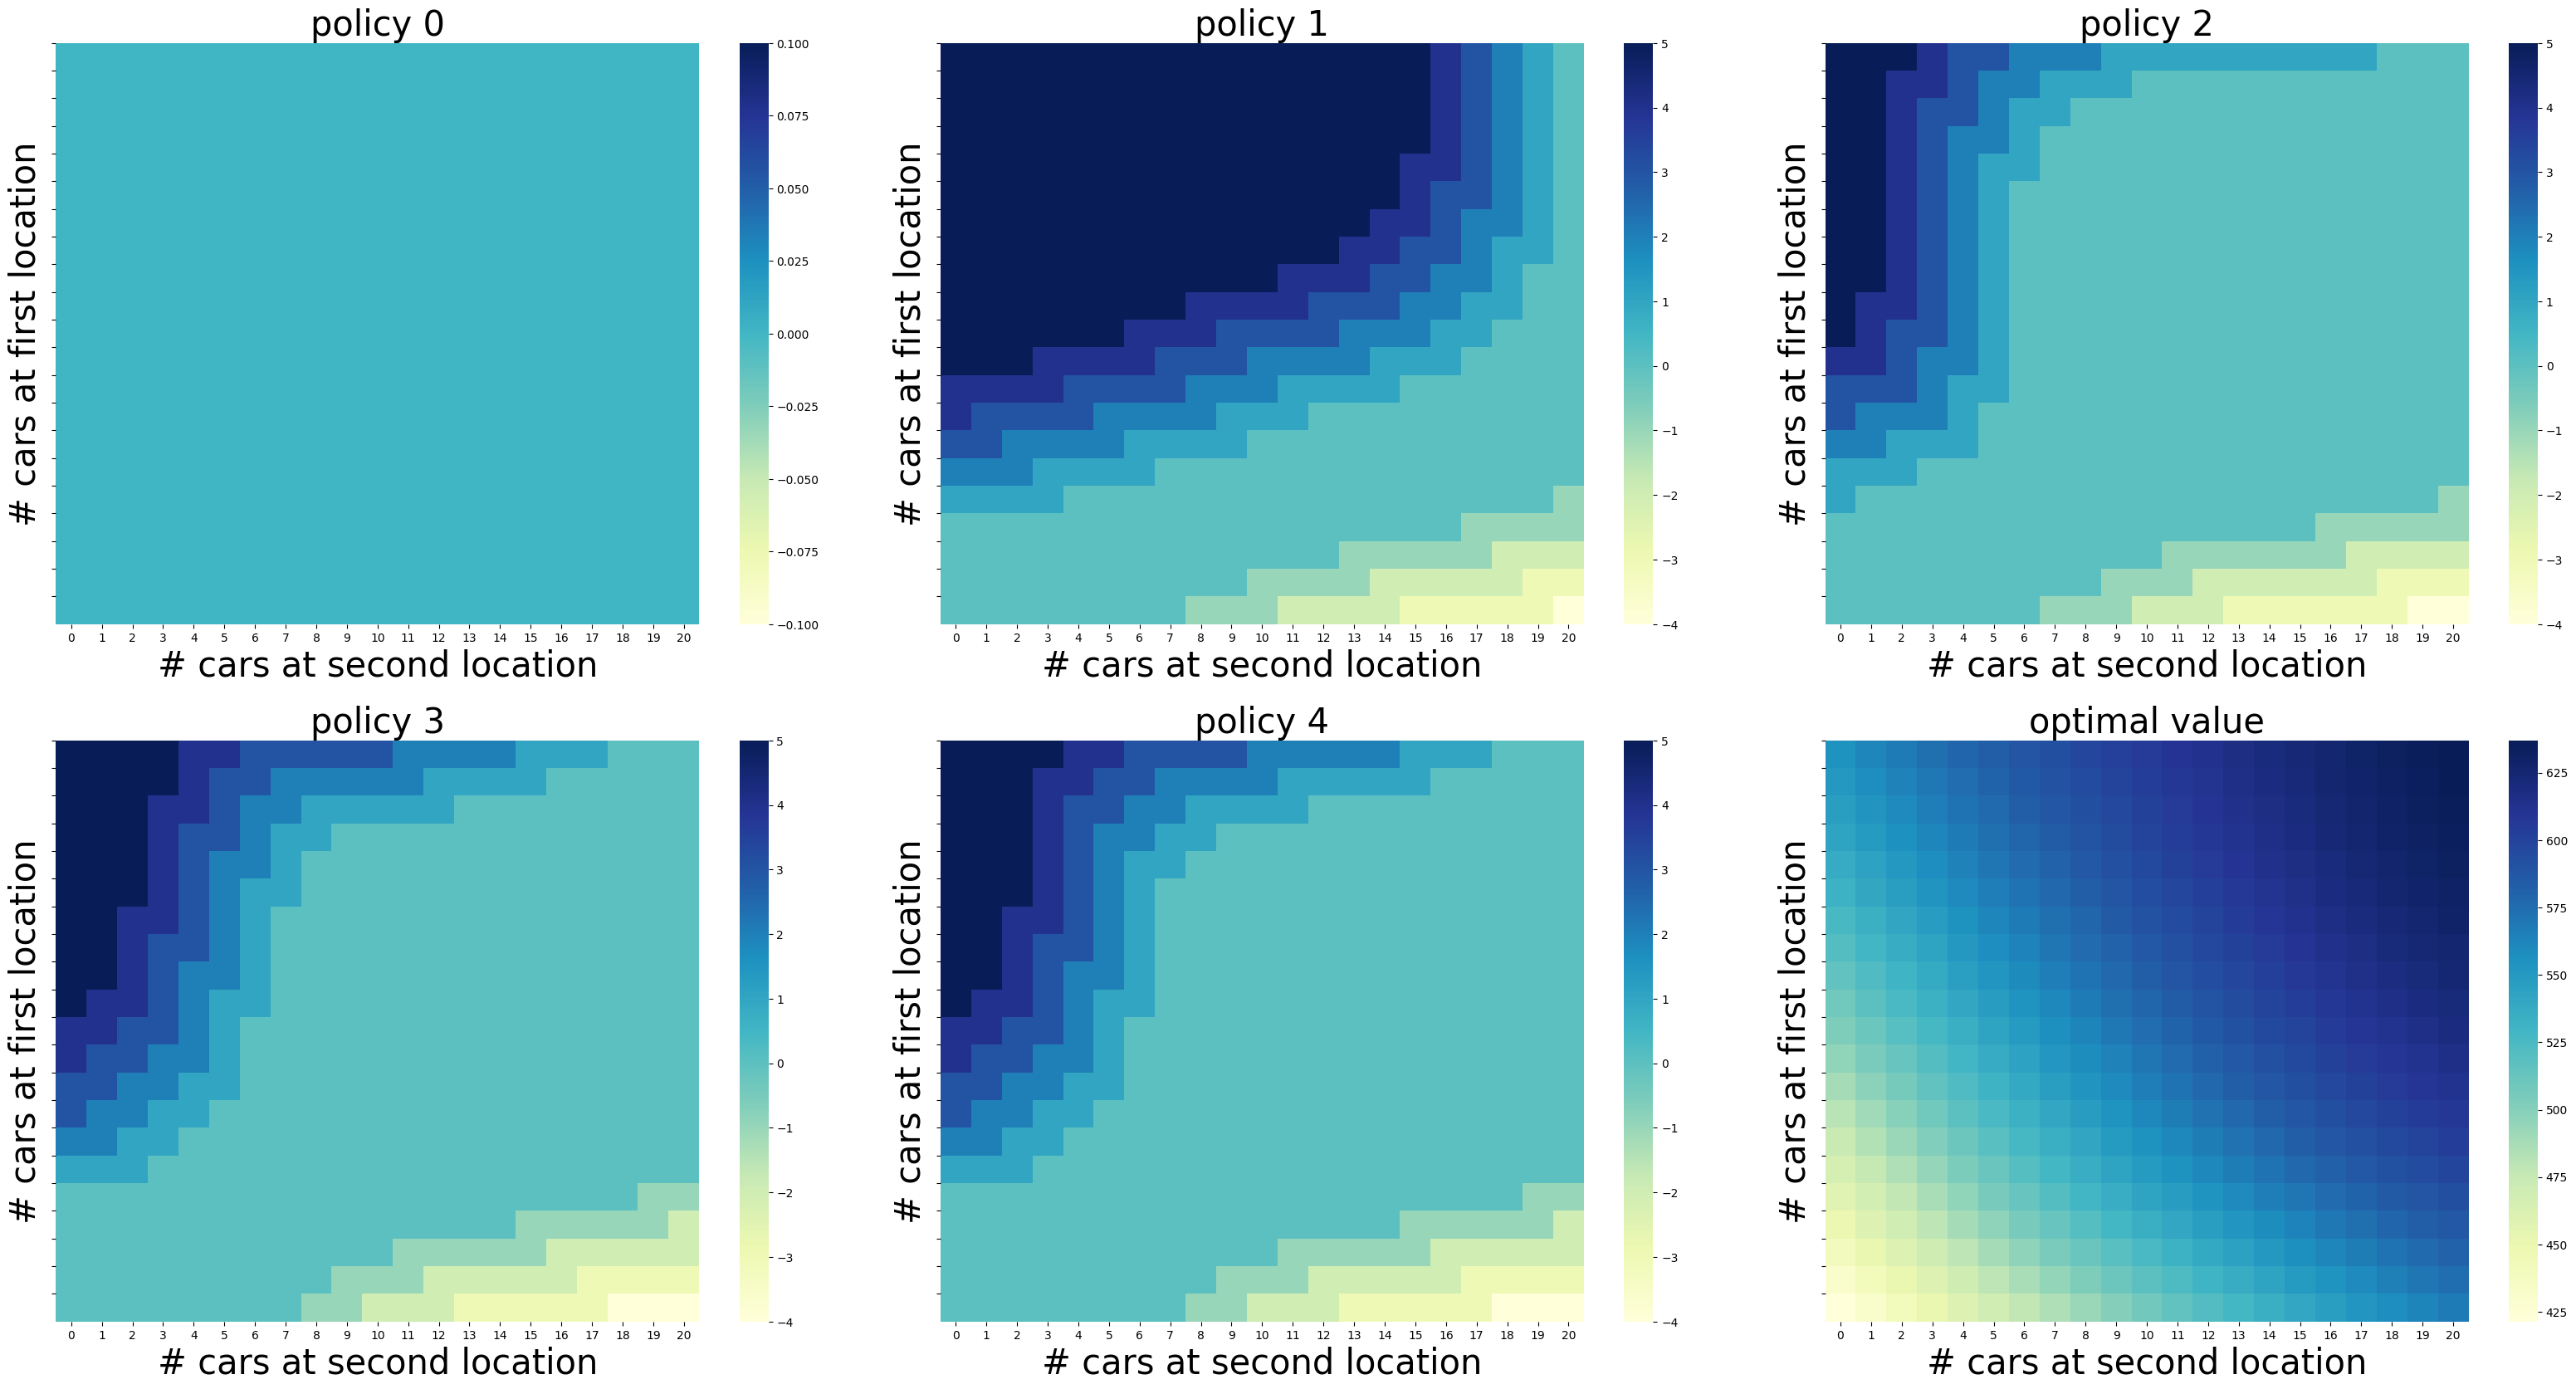

In [80]:
c4.car_rental.plot_policies(values_p, policies_p)

In [81]:
values, policies = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=False, show=True, n_jobs=1) 

2023-03-12 04:30:43,447: INFO: after 10 iteration: max value change 21.7877345644
2023-03-12 04:32:10,557: INFO: after 20 iteration: max value change 6.6657871395
2023-03-12 04:33:37,635: INFO: after 30 iteration: max value change 2.3001814354
2023-03-12 04:35:05,168: INFO: after 40 iteration: max value change 0.7991071964
2023-03-12 04:36:31,890: INFO: after 50 iteration: max value change 0.2781520172
2023-03-12 04:37:59,356: INFO: after 60 iteration: max value change 0.0969058971
2023-03-12 04:39:26,734: INFO: after 70 iteration: max value change 0.0337757402
2023-03-12 04:40:53,535: INFO: after 80 iteration: max value change 0.0117746678
2023-03-12 04:42:19,931: INFO: after 90 iteration: max value change 0.0041052062
2023-03-12 04:43:46,211: INFO: after 100 iteration: max value change 0.0014313359
2023-03-12 04:45:12,857: INFO: after 110 iteration: max value change 0.0004990658
2023-03-12 04:46:39,490: INFO: after 120 iteration: max value change 0.0001740118
2023-03-12 04:49:00,982:

##### multiprocessing

采用了multiprocessing并行处理。

2023-03-12 06:24:21,506: INFO: after 10 iteration: max value change: 21.7877345644
2023-03-12 06:24:46,460: INFO: after 20 iteration: max value change: 6.6657871395
2023-03-12 06:25:11,494: INFO: after 30 iteration: max value change: 2.3001814354
2023-03-12 06:25:37,140: INFO: after 40 iteration: max value change: 0.7991071964
2023-03-12 06:26:02,152: INFO: after 50 iteration: max value change: 0.2781520172
2023-03-12 06:26:28,084: INFO: after 60 iteration: max value change: 0.0969058971
2023-03-12 06:26:52,735: INFO: after 70 iteration: max value change: 0.0337757402
2023-03-12 06:27:18,829: INFO: after 80 iteration: max value change: 0.0117746678
2023-03-12 06:27:45,161: INFO: after 90 iteration: max value change: 0.0041052062
2023-03-12 06:28:11,068: INFO: after 100 iteration: max value change: 0.0014313359
2023-03-12 06:28:36,698: INFO: after 110 iteration: max value change: 0.0004990658
2023-03-12 06:29:02,490: INFO: after 120 iteration: max value change: 0.0001740118
2023-03-12 0

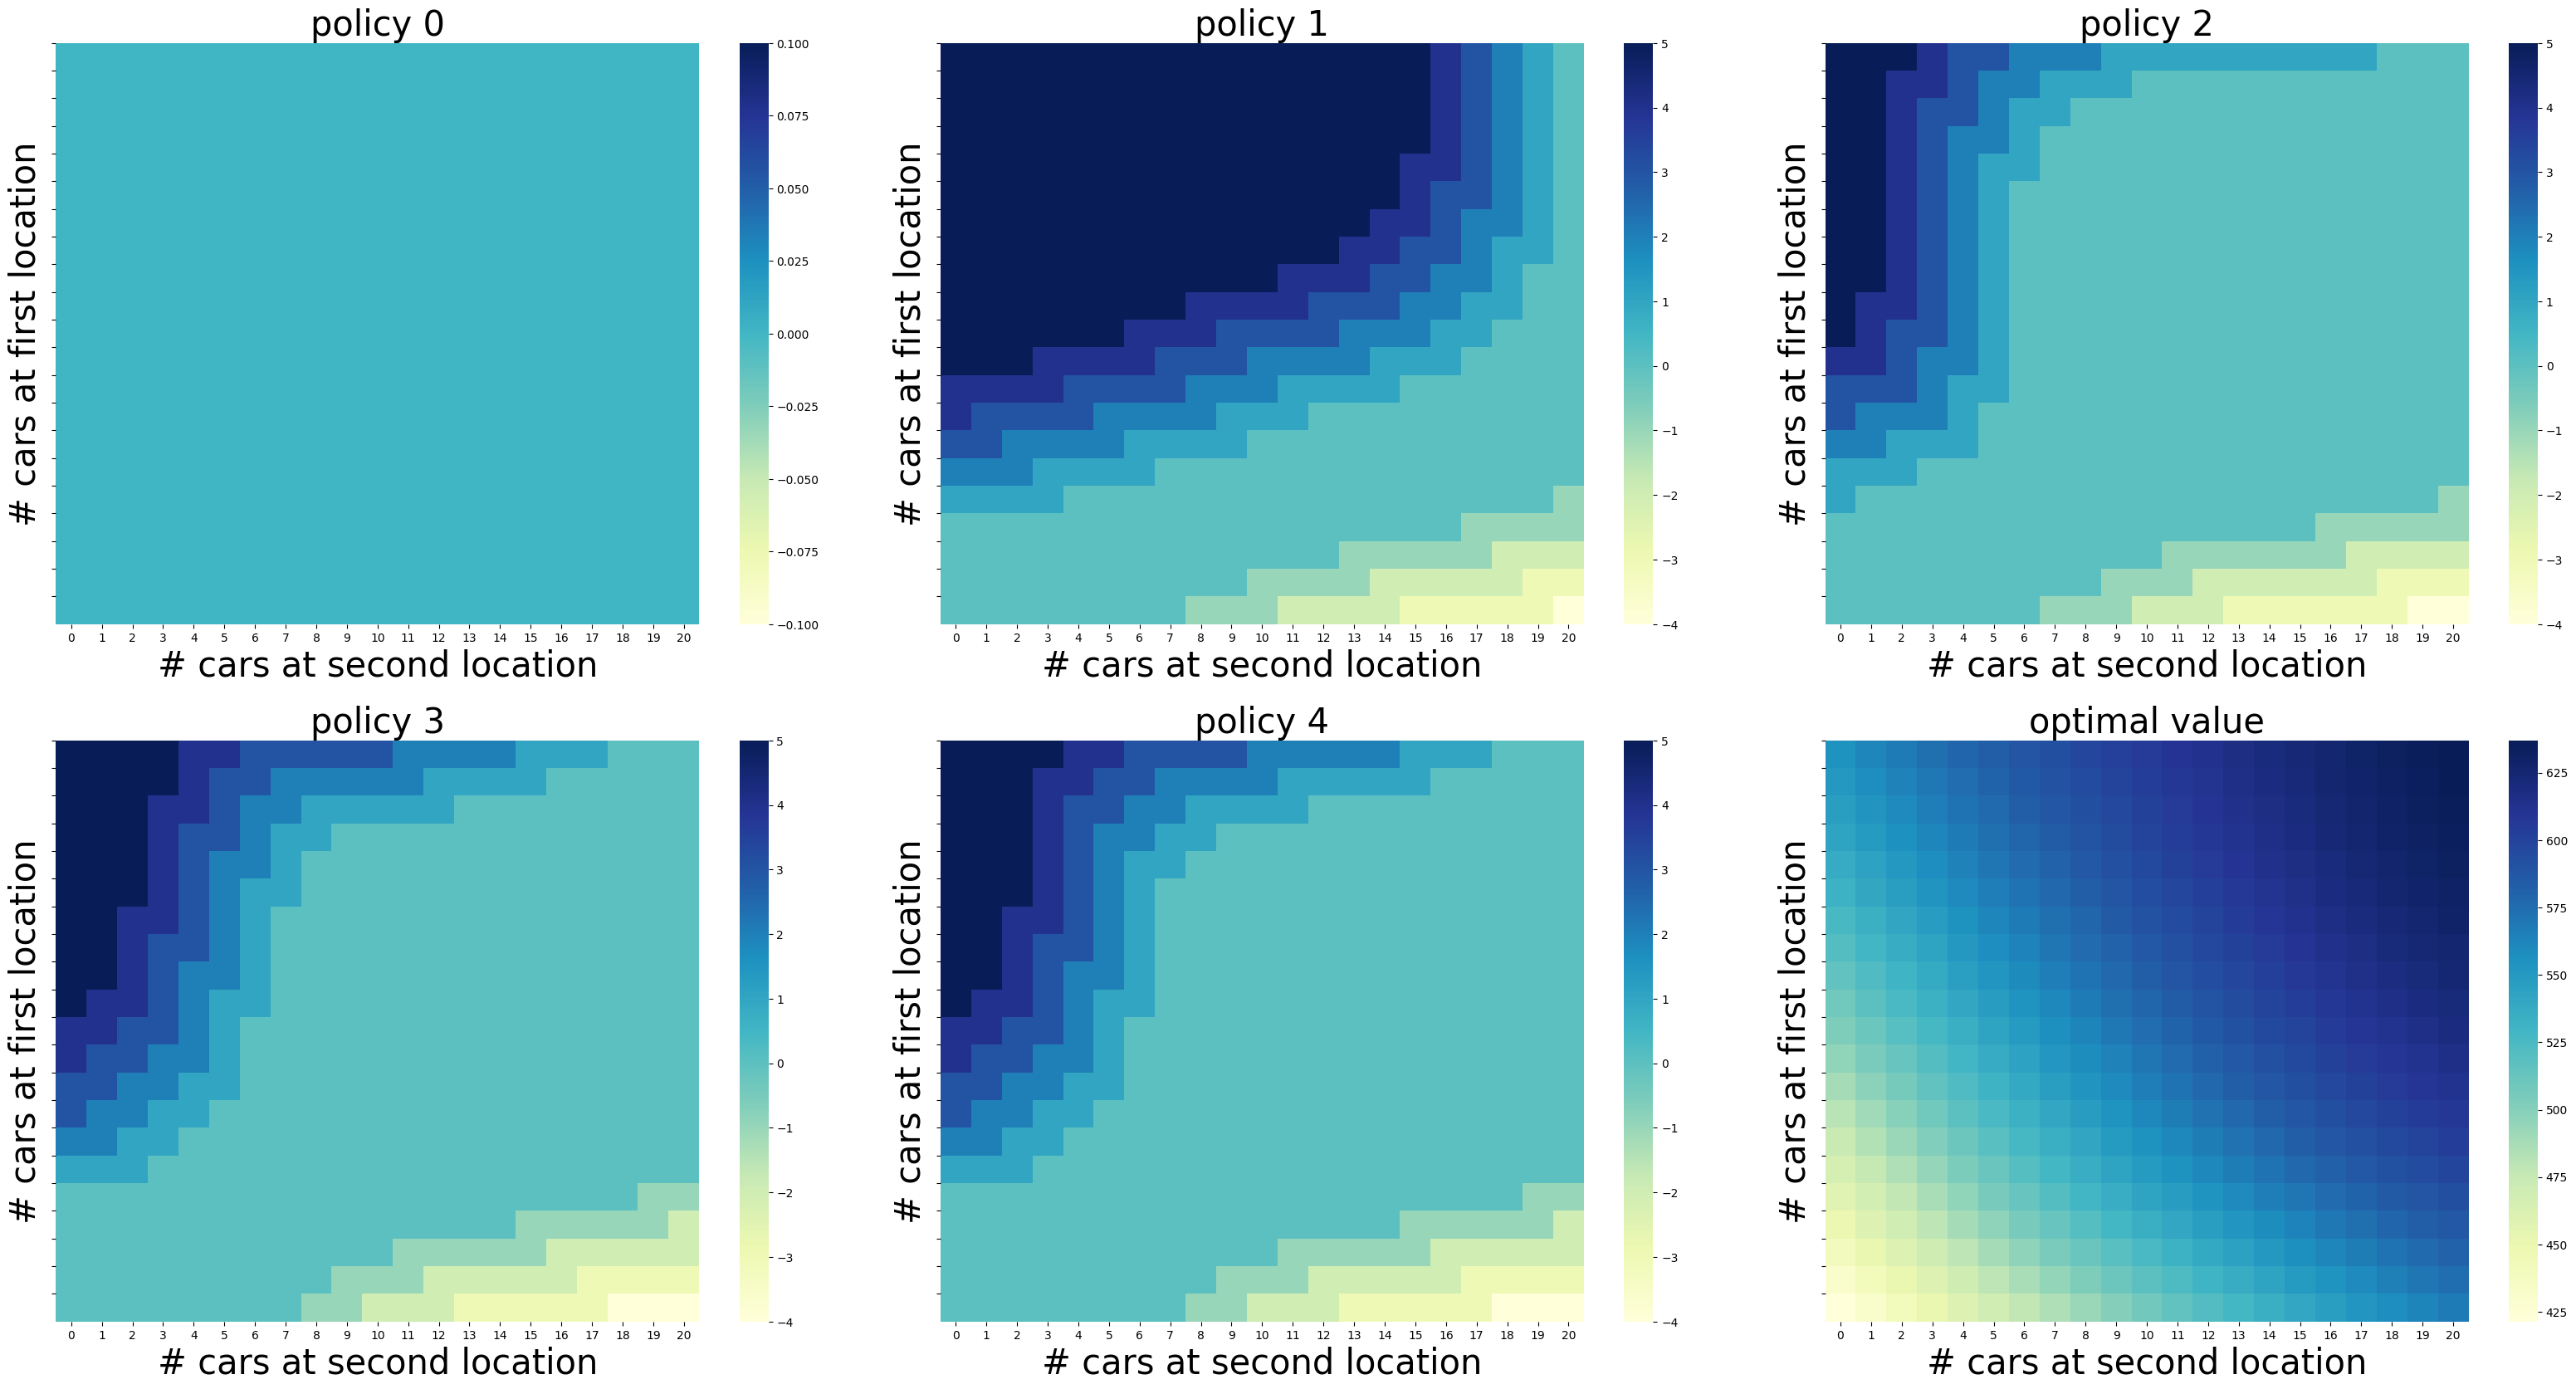

In [87]:
solver = c4.car_rental_synchronous.PolicyIteration(parallel_processes=10, delta=1e-4, gamma=0.9, solve_4_7=False)
solver.solve()
solver.plot()

In [89]:
print(np.round(values[-1][0:10, 0:10]))

[[421. 431. 441. 451. 460. 469. 477. 485. 493. 500.]
 [431. 441. 451. 461. 470. 479. 487. 495. 502. 510.]
 [441. 451. 461. 470. 479. 488. 497. 504. 512. 519.]
 [450. 460. 469. 479. 488. 497. 505. 513. 521. 528.]
 [458. 468. 477. 487. 496. 505. 513. 521. 528. 535.]
 [466. 475. 485. 494. 504. 512. 520. 528. 535. 542.]
 [473. 483. 492. 502. 510. 519. 527. 535. 542. 549.]
 [481. 490. 500. 508. 517. 525. 533. 541. 548. 554.]
 [488. 498. 506. 515. 523. 531. 539. 546. 553. 560.]
 [496. 504. 513. 521. 529. 537. 544. 551. 558. 564.]]


In [90]:
print(np.round(solver.values[-1][0:10, 0:10]))

[[421. 431. 441. 451. 460. 469. 477. 485. 493. 500.]
 [431. 441. 451. 461. 470. 479. 487. 495. 502. 510.]
 [441. 451. 461. 470. 479. 488. 497. 504. 512. 519.]
 [450. 460. 469. 479. 488. 497. 505. 513. 521. 528.]
 [458. 468. 477. 487. 496. 505. 513. 521. 528. 535.]
 [466. 475. 485. 494. 504. 512. 520. 528. 535. 542.]
 [473. 483. 492. 502. 510. 519. 527. 535. 542. 549.]
 [481. 490. 500. 508. 517. 525. 533. 541. 548. 554.]
 [488. 498. 506. 515. 523. 531. 539. 546. 553. 560.]
 [496. 504. 513. 521. 529. 537. 544. 551. 558. 564.]]


2023-03-12 06:42:32,657: INFO: after 10 iteration: max value change: 21.7877345644
2023-03-12 06:42:55,542: INFO: after 20 iteration: max value change: 6.6657871395
2023-03-12 06:43:19,478: INFO: after 30 iteration: max value change: 2.3001814354
2023-03-12 06:43:43,038: INFO: after 40 iteration: max value change: 0.7991071964
2023-03-12 06:44:05,892: INFO: after 50 iteration: max value change: 0.2781520172
2023-03-12 06:44:28,748: INFO: after 60 iteration: max value change: 0.0969058971
2023-03-12 06:44:51,458: INFO: after 70 iteration: max value change: 0.0337757402
2023-03-12 06:45:13,871: INFO: after 80 iteration: max value change: 0.0117746678
2023-03-12 06:45:37,339: INFO: after 90 iteration: max value change: 0.0041052062
2023-03-12 06:45:59,187: INFO: after 100 iteration: max value change: 0.0014313359
2023-03-12 06:46:21,897: INFO: after 110 iteration: max value change: 0.0004990658
2023-03-12 06:46:45,167: INFO: after 120 iteration: max value change: 0.0001740118
2023-03-12 0

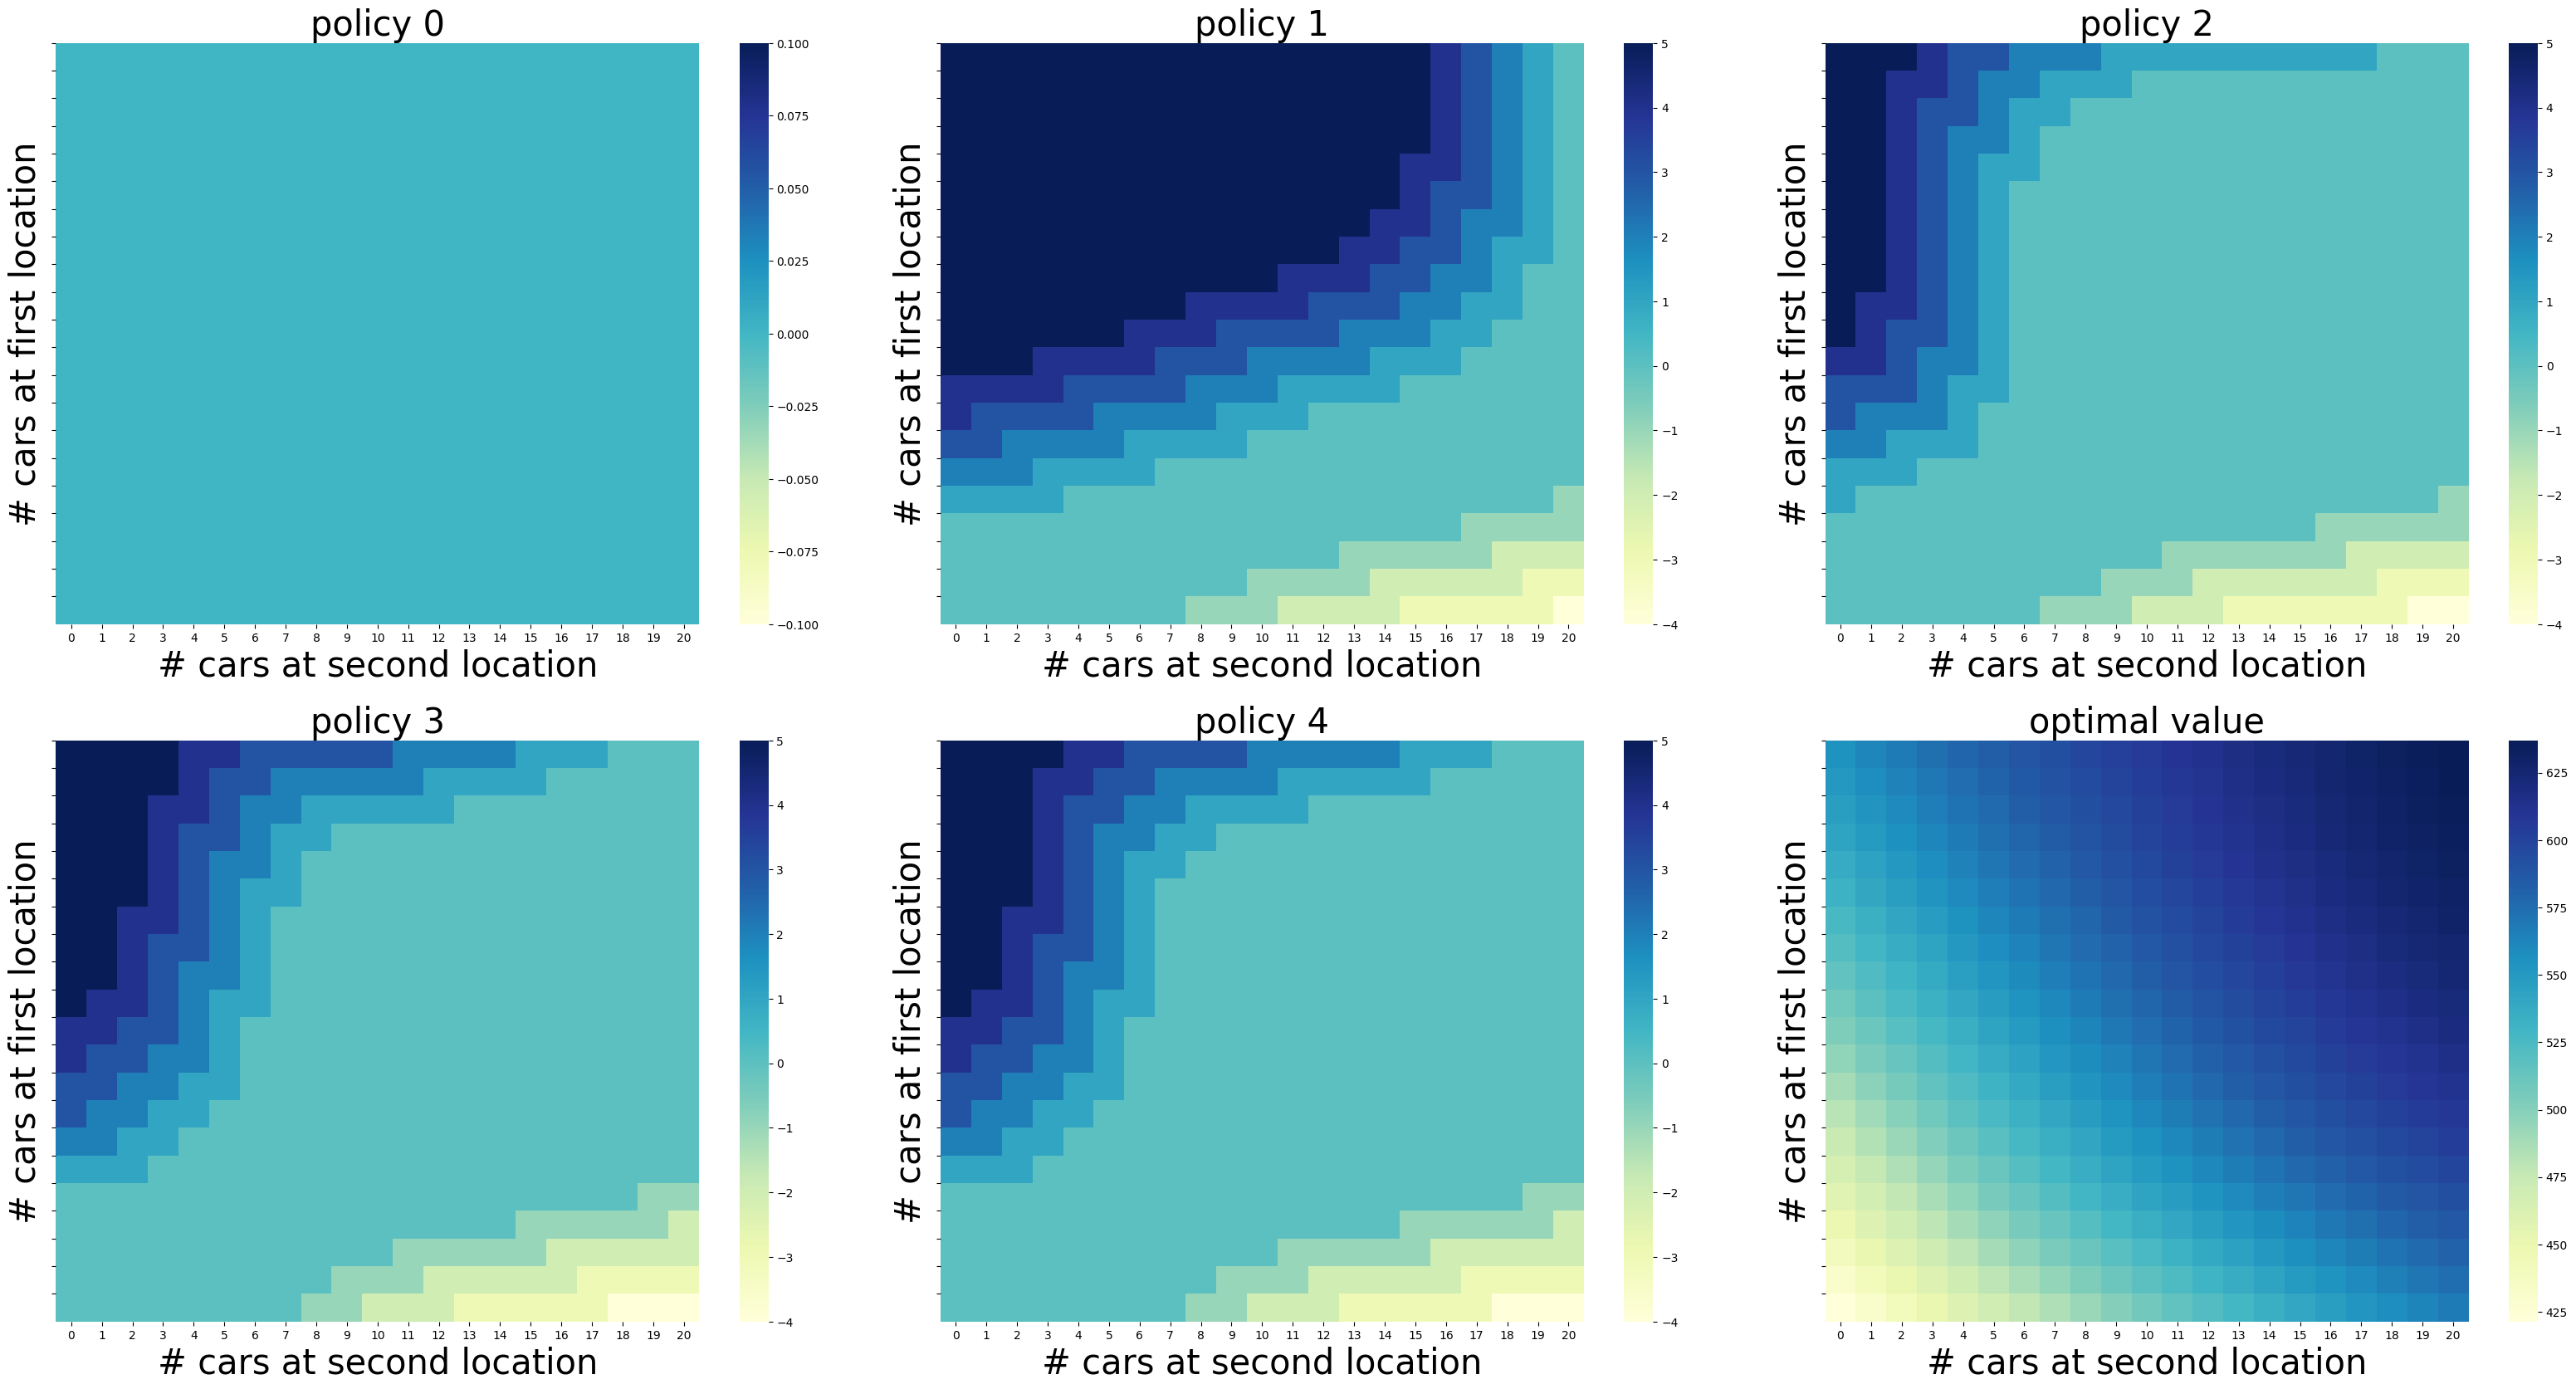

In [91]:
# 也可以是哟joblib, 目前看性能比 multiprocessing 要好一些， 从30秒减少到25秒。
solver = c4.car_rental_synchronous.PolicyIteration(parallel_processes=10, delta=1e-4, gamma=0.9, 
                                                   solve_4_7=False, use_multiprocessing=False)
solver.solve()
solver.plot()

#### constant_rented_cars

如果租车的数量也是固定呢? 和不固定比，策略和价值函数总体的轮廓几乎相同



In [68]:
values, policies = c4.car_rental.figure_4_2(in_place=True, constant_rented_cars=True, constant_returned_cars=True, show=True) 

2024-01-07 08:53:26,716: INFO: after 10 iteration: max value change 19.37102445
2024-01-07 08:53:27,288: INFO: after 20 iteration: max value change 6.7542585884
2024-01-07 08:53:27,826: INFO: after 30 iteration: max value change 2.3550643486
2024-01-07 08:53:28,313: INFO: after 40 iteration: max value change 0.8211601634
2024-01-07 08:53:28,779: INFO: after 50 iteration: max value change 0.2863208449
2024-01-07 08:53:29,289: INFO: after 60 iteration: max value change 0.0998339056
2024-01-07 08:53:29,775: INFO: after 70 iteration: max value change 0.0348099305
2024-01-07 08:53:30,238: INFO: after 80 iteration: max value change 0.0121374723
2024-01-07 08:53:30,695: INFO: after 90 iteration: max value change 0.0042320749
2024-01-07 08:53:31,191: INFO: after 100 iteration: max value change 0.0014756333
2024-01-07 08:53:31,659: INFO: after 110 iteration: max value change 0.0005145215
2024-01-07 08:53:32,119: INFO: after 120 iteration: max value change 0.0001794026
2024-01-07 08:53:32,819: I

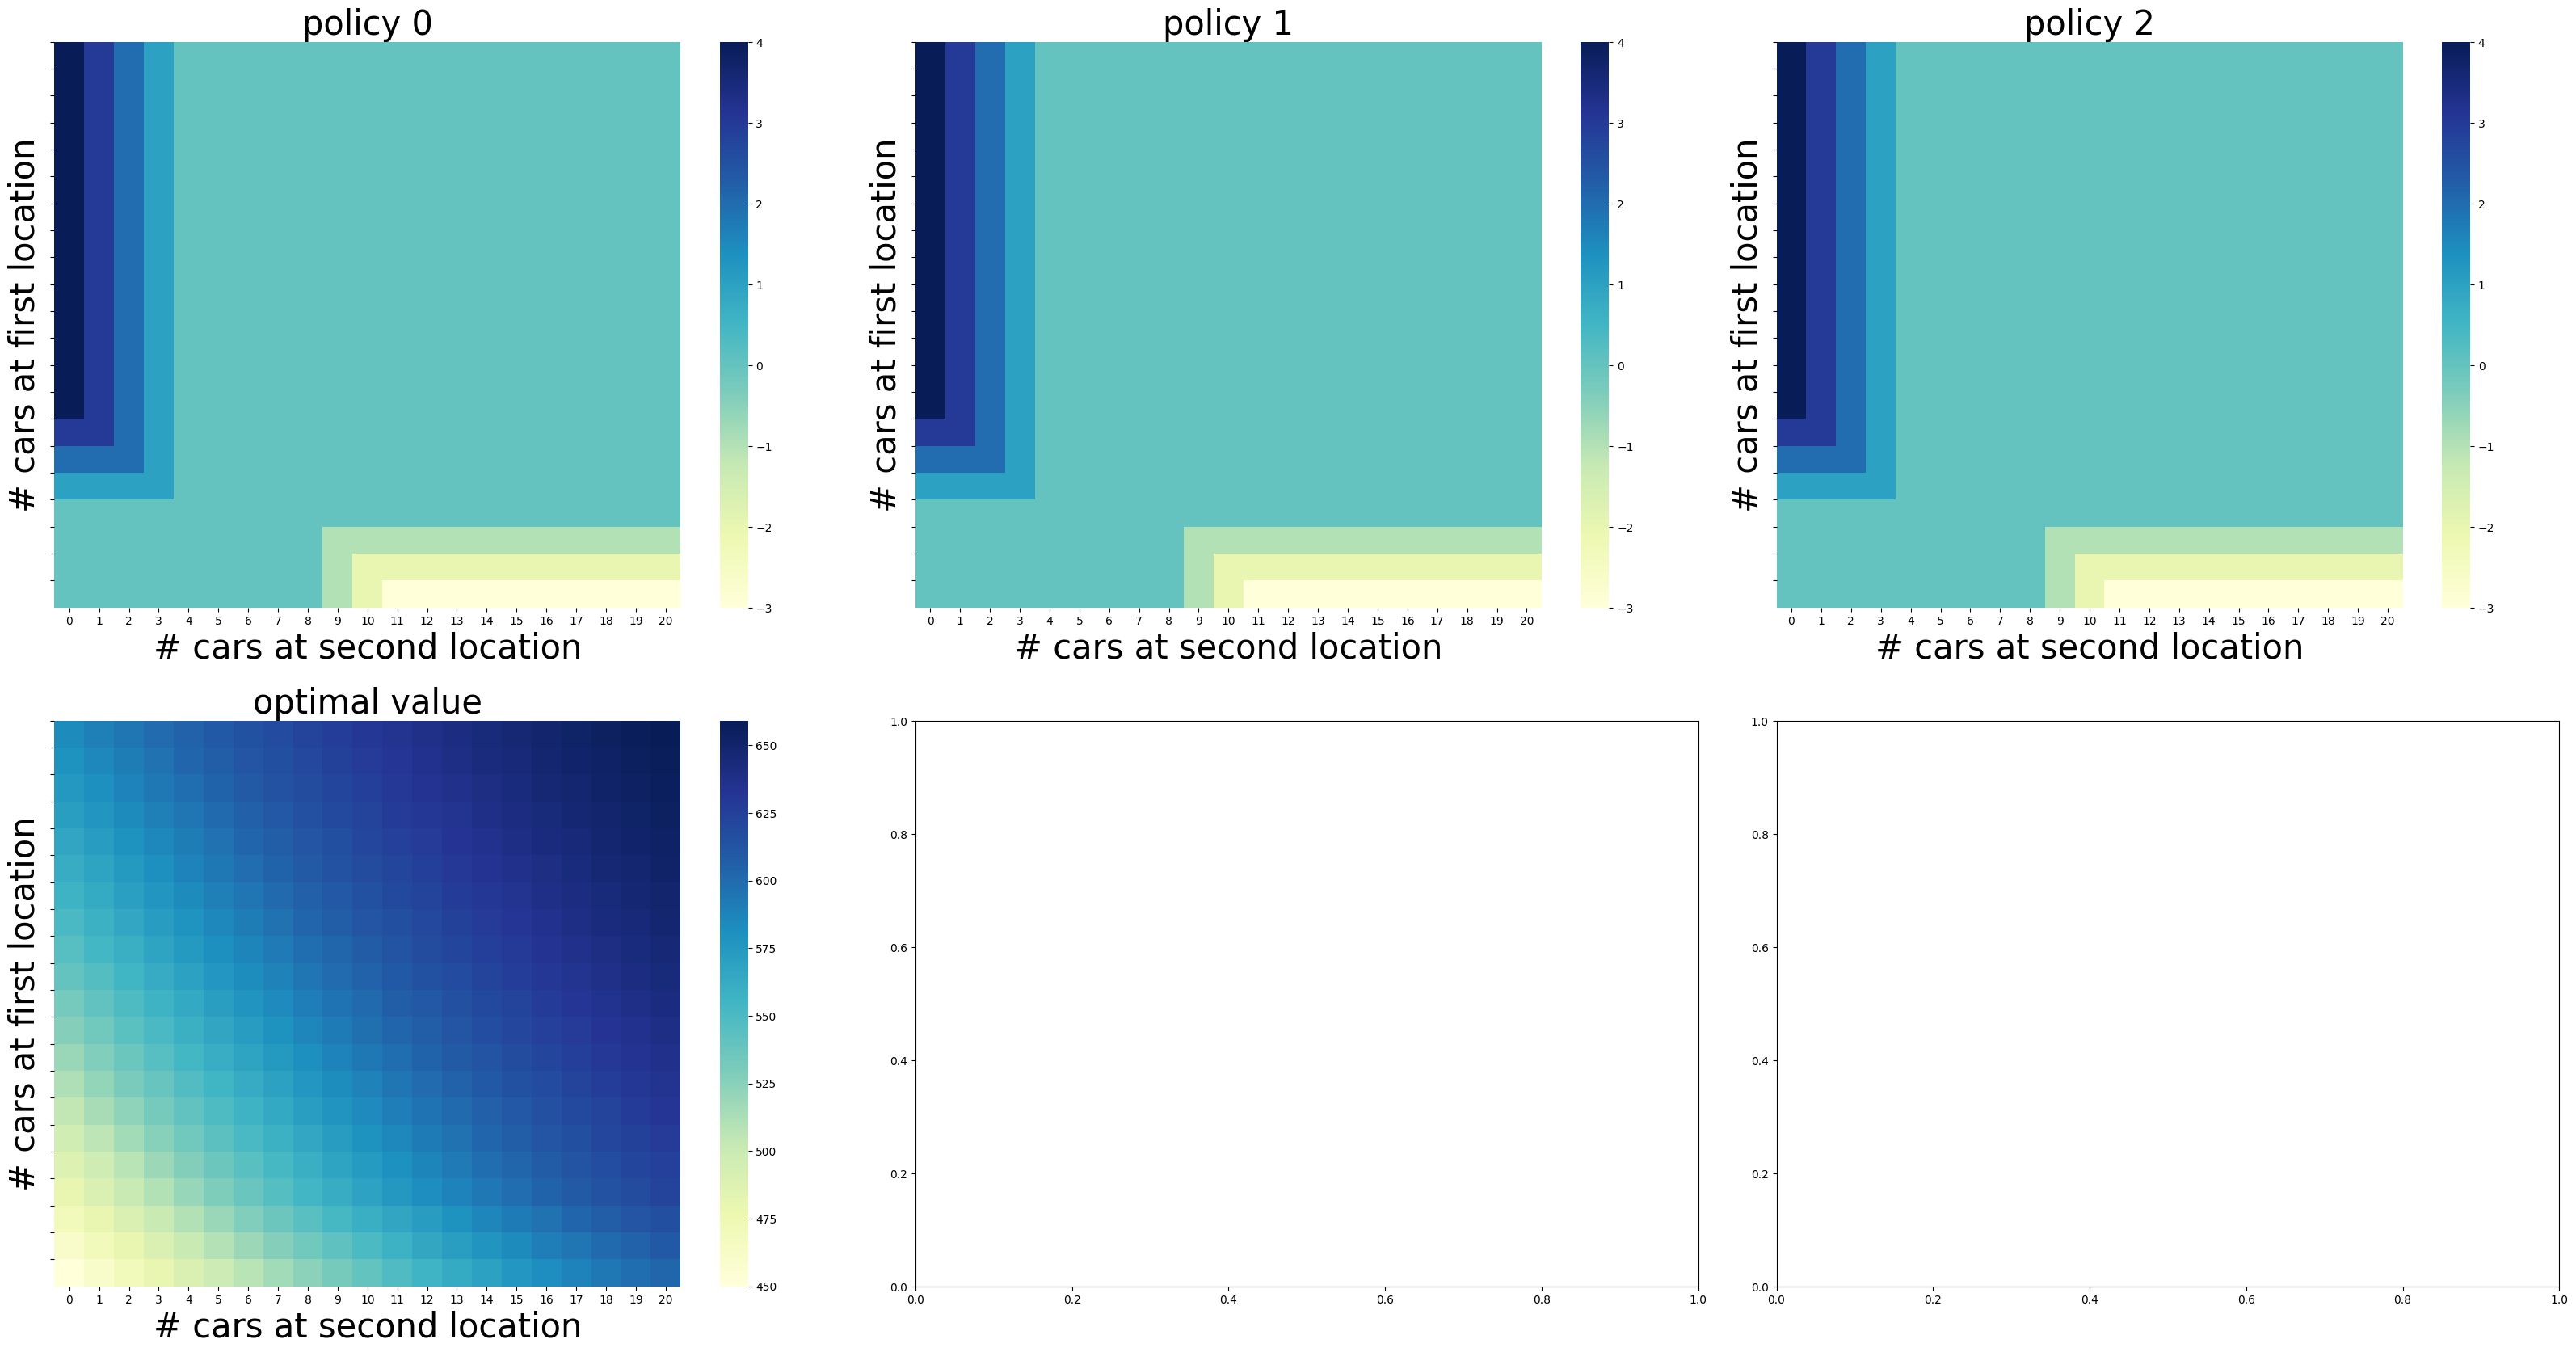

In [69]:
c4.car_rental.plot_policies(values, policies)

In [70]:
print(np.round(values[-1][0:10, 0:10]))
print(policies[-1]) 

[[450. 460. 470. 480. 490. 499. 508. 516. 524. 532.]
 [460. 470. 480. 490. 500. 509. 518. 526. 534. 542.]
 [470. 480. 490. 500. 510. 519. 528. 536. 544. 552.]
 [480. 490. 500. 510. 520. 529. 538. 546. 554. 561.]
 [488. 498. 508. 518. 527. 536. 544. 553. 560. 567.]
 [496. 506. 516. 525. 534. 543. 551. 558. 566. 573.]
 [504. 514. 523. 532. 541. 549. 557. 564. 571. 578.]
 [512. 521. 530. 539. 547. 555. 563. 569. 576. 583.]
 [519. 528. 537. 545. 553. 561. 568. 575. 581. 587.]
 [526. 535. 543. 551. 559. 566. 573. 579. 586. 592.]]
[[ 0  0  0  0  0  0  0  0  0 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3

如果租车固定，但是还车不固定

In [71]:
values, policies = c4.car_rental.figure_4_2(in_place=True, constant_rented_cars=True, constant_returned_cars=False, show=True) 

2024-01-07 08:53:48,487: INFO: after 10 iteration: max value change 17.7524627083
2024-01-07 08:53:49,864: INFO: after 20 iteration: max value change 2.5086262235
2024-01-07 08:53:51,030: INFO: after 30 iteration: max value change 0.3277435226
2024-01-07 08:53:52,249: INFO: after 40 iteration: max value change 0.0412396424
2024-01-07 08:53:53,427: INFO: after 50 iteration: max value change 0.0051013239
2024-01-07 08:53:54,647: INFO: after 60 iteration: max value change 0.0006260688
2024-01-07 08:53:56,829: INFO: policy stable False
2024-01-07 08:53:58,040: INFO: after 10 iteration: max value change 0.5055692284
2024-01-07 08:53:59,294: INFO: after 20 iteration: max value change 0.0651149239
2024-01-07 08:54:00,548: INFO: after 30 iteration: max value change 0.0083862965
2024-01-07 08:54:01,764: INFO: after 40 iteration: max value change 0.0010800898
2024-01-07 08:54:03,029: INFO: after 50 iteration: max value change 0.0001391072
2024-01-07 08:54:04,371: INFO: policy stable False
2024-0

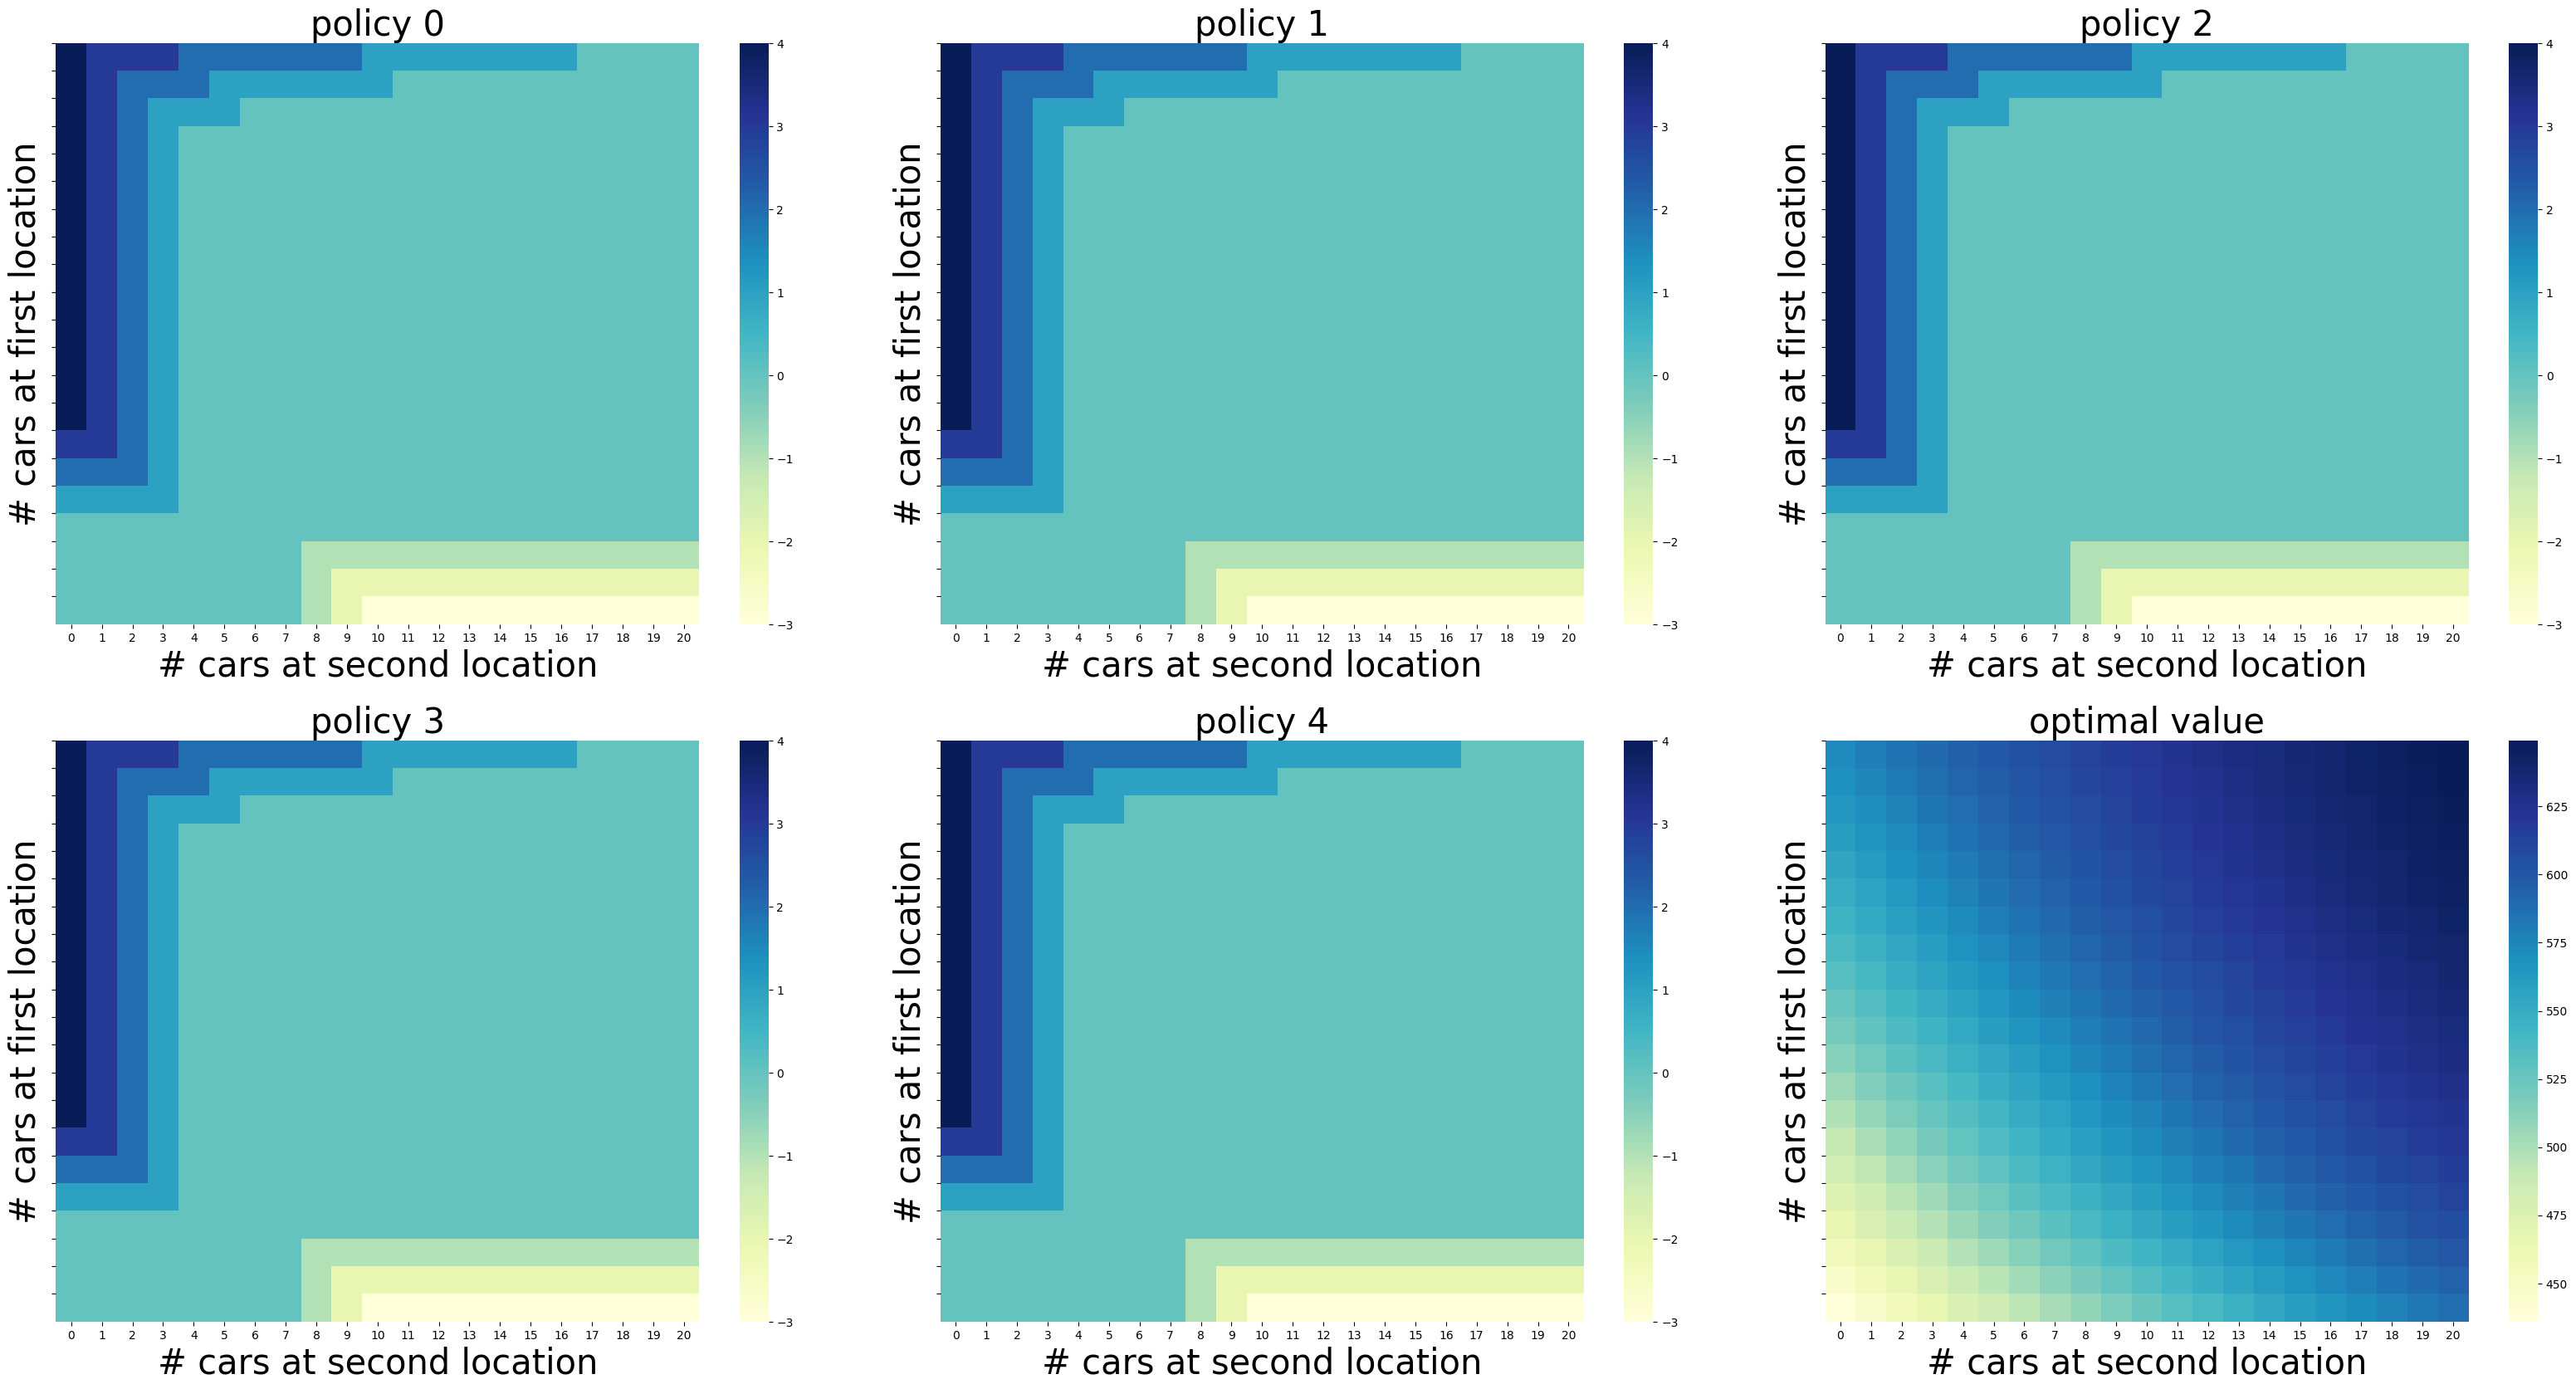

In [96]:
c4.car_rental.plot_policies(values, policies)

In [97]:
print(np.round(values[-1][0:10, 0:10]))
print(policies[-1]) 

[[436. 446. 456. 466. 476. 485. 493. 501. 509. 517.]
 [446. 456. 466. 476. 486. 495. 503. 511. 519. 527.]
 [456. 466. 476. 486. 496. 505. 513. 521. 529. 537.]
 [466. 476. 486. 496. 506. 515. 523. 531. 539. 546.]
 [474. 484. 494. 504. 514. 522. 531. 539. 546. 553.]
 [482. 492. 502. 512. 521. 530. 538. 546. 553. 560.]
 [490. 500. 510. 519. 528. 536. 544. 552. 559. 566.]
 [498. 508. 517. 526. 535. 543. 550. 558. 564. 571.]
 [506. 515. 524. 533. 541. 549. 556. 563. 570. 576.]
 [513. 522. 531. 539. 547. 554. 561. 568. 575. 581.]]
[[ 0  0  0  0  0  0  0  0 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3

#### my implementation

自己写的方法，基本参考了c4.car_rental老的版本。只是不知道为啥性能会差不少。

after 10 iteration: delta=19.40385808254939
after 20 iteration: delta=4.252112693842776
after 30 iteration: delta=0.8720029351049448
after 40 iteration: delta=0.1737691018435612
after 50 iteration: delta=0.03409927655258116
after 60 iteration: delta=0.006633800647819044
after 70 iteration: delta=0.0012841759864272717
after 80 iteration: delta=0.0002478769196159192
policy stable = False
after 10 iteration: delta=0.3670218562992318
after 20 iteration: delta=0.065197614125168
after 30 iteration: delta=0.011569172929284832
after 40 iteration: delta=0.002052919695017863
after 50 iteration: delta=0.00036428526584586507
policy stable = False
after 10 iteration: delta=0.1097569388878128
after 20 iteration: delta=0.020714866829109724
after 30 iteration: delta=0.00389063733302919
after 40 iteration: delta=0.0007307265586291578
after 50 iteration: delta=0.00013724262737468962
policy stable = False
after 10 iteration: delta=0.0025834353657501197
policy stable = False
after 10 iteration: delta=0.00

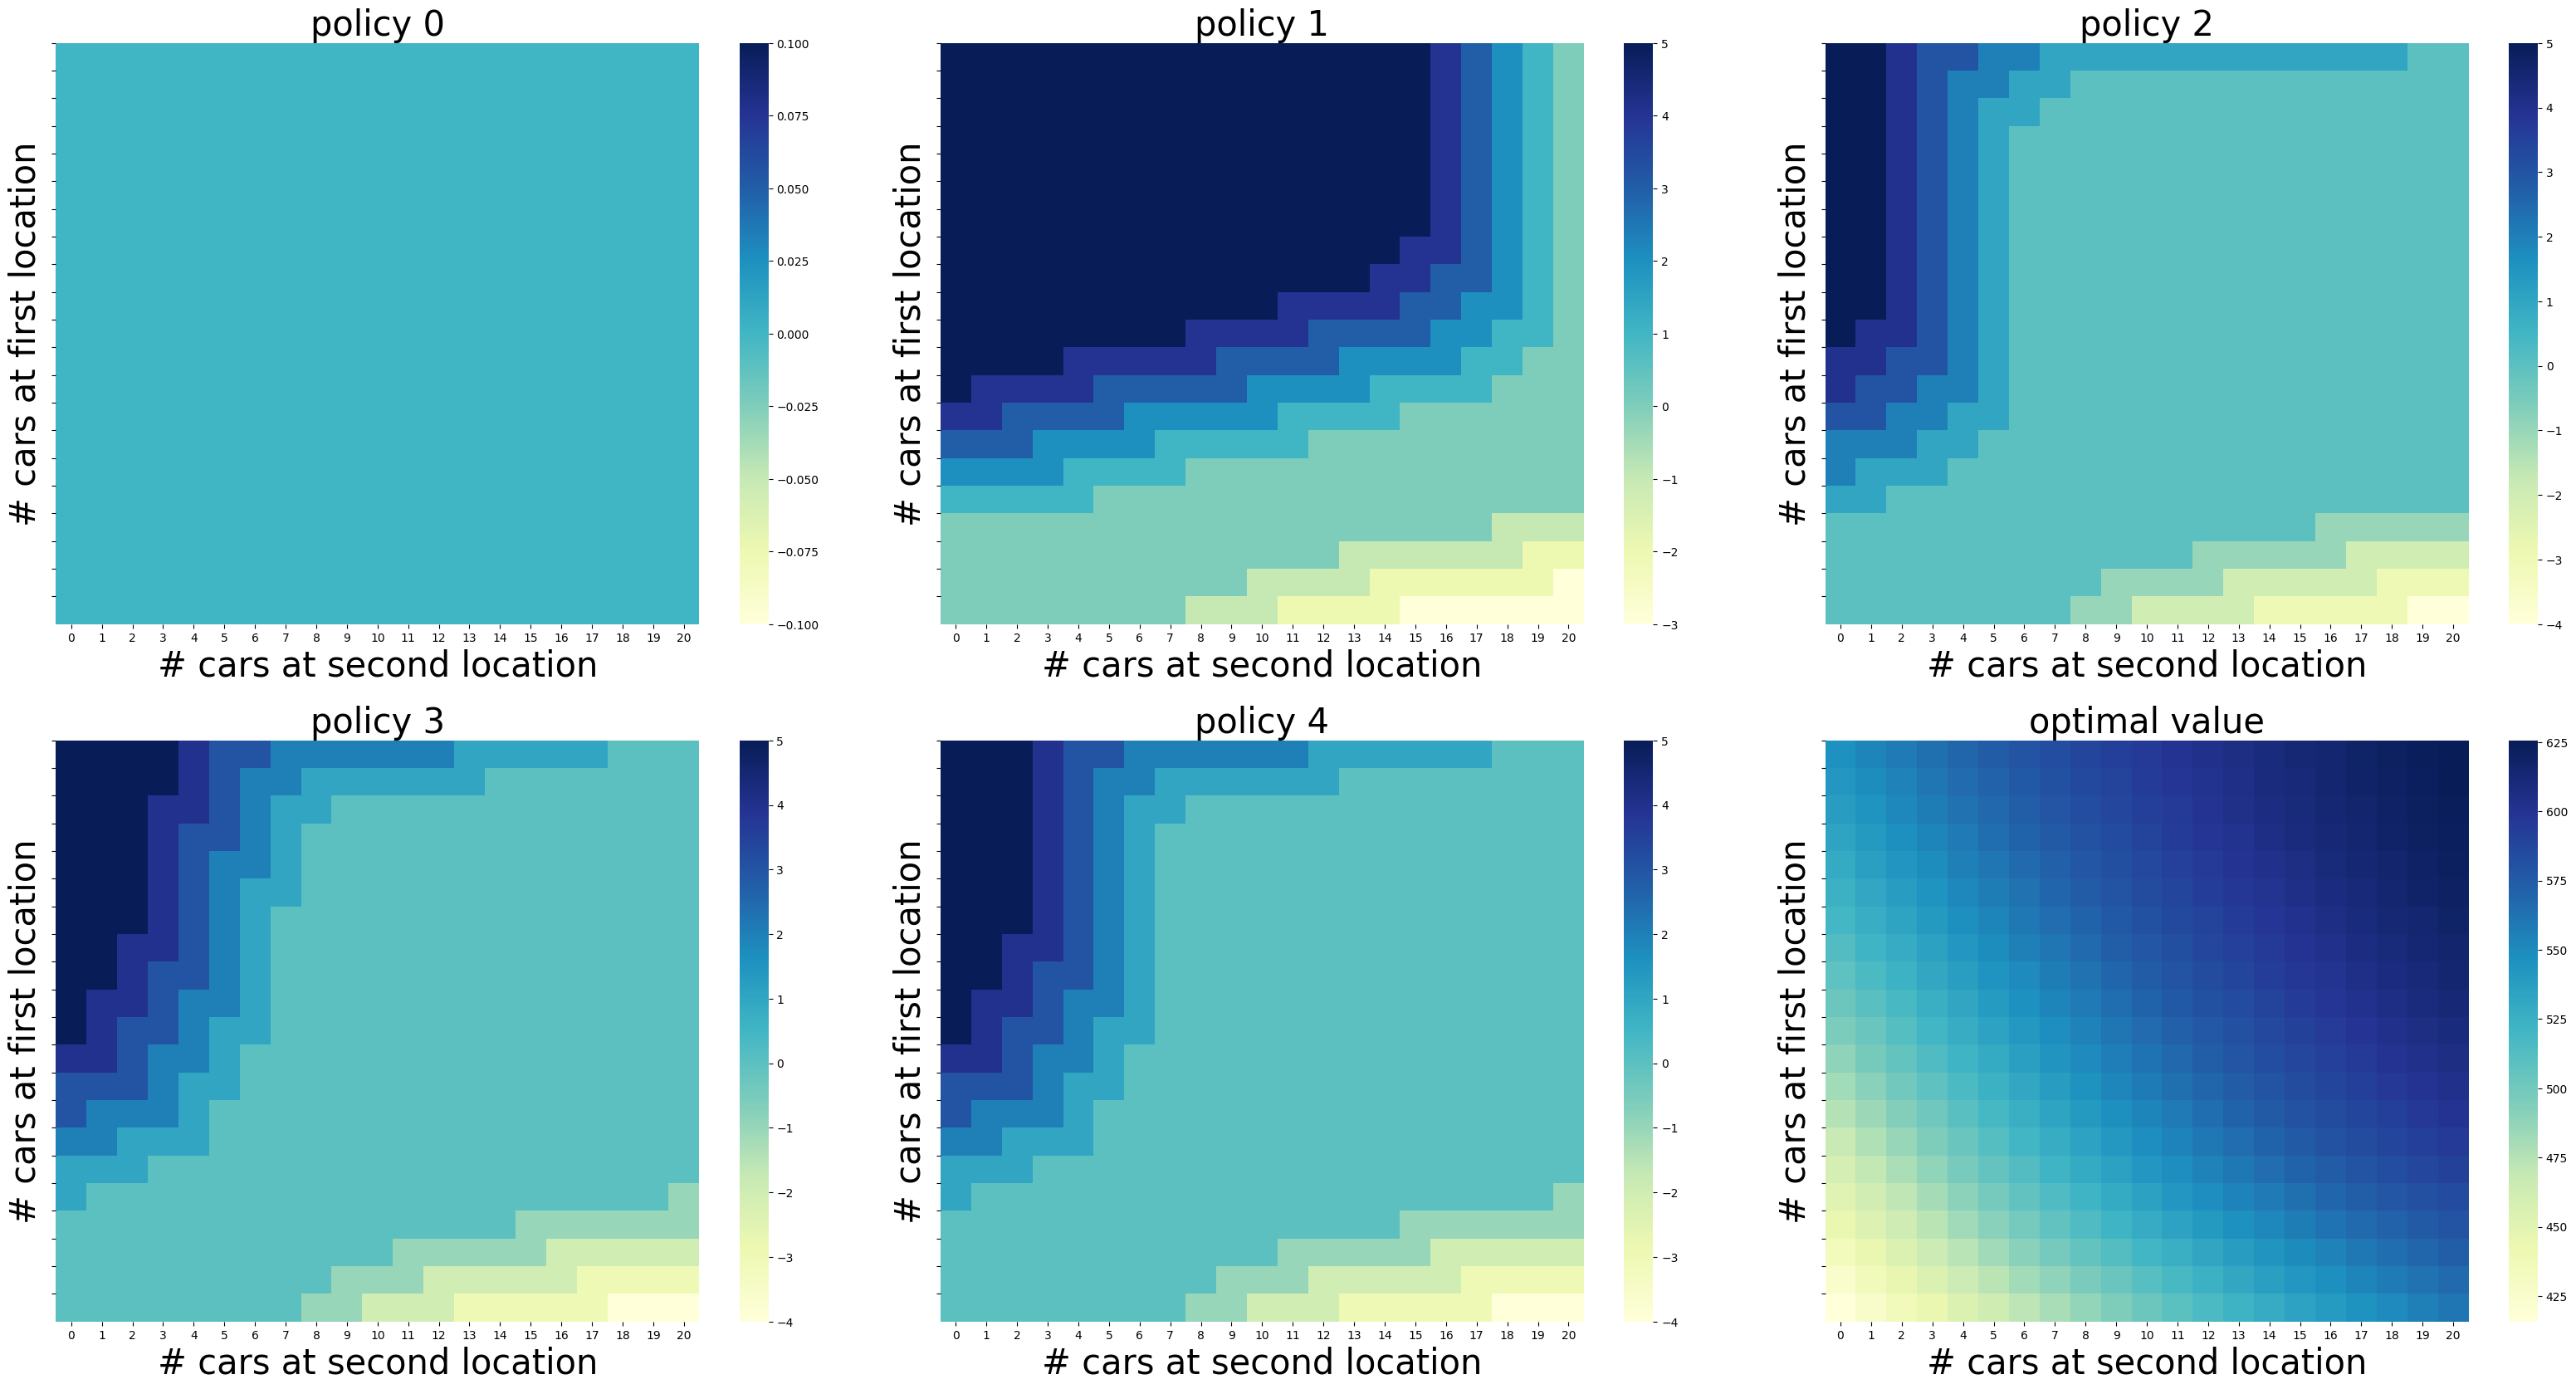

In [98]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=True, max_car_num=max_car_num, theta=1e-4, 
                                    constant_return=True, verbose=True)
v, pi = rental.run() 

In [99]:
print(np.round(v[0:10, 0:10]))
print(pi)

[[416. 426. 436. 445. 454. 463. 472. 480. 487. 495.]
 [426. 436. 445. 455. 464. 473. 481. 489. 497. 504.]
 [435. 445. 455. 464. 474. 482. 491. 499. 506. 513.]
 [444. 454. 463. 473. 482. 491. 499. 507. 515. 522.]
 [452. 461. 471. 481. 490. 499. 507. 515. 522. 529.]
 [459. 469. 479. 488. 497. 506. 514. 522. 529. 536.]
 [467. 477. 486. 495. 504. 512. 520. 528. 535. 542.]
 [475. 484. 493. 502. 510. 518. 526. 534. 540. 547.]
 [482. 491. 500. 508. 516. 524. 532. 539. 546. 552.]
 [489. 498. 506. 514. 522. 530. 537. 544. 550. 557.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

after 10 iteration: delta=21.528226914981815
after 20 iteration: delta=6.326542908155261
after 30 iteration: delta=2.1274485428422167
after 40 iteration: delta=0.7169460132894301
after 50 iteration: delta=0.24181067758411245
after 60 iteration: delta=0.08160730527072246
after 70 iteration: delta=0.027552708054145114
after 80 iteration: delta=0.009305119859845945
after 90 iteration: delta=0.0031431251038611663
after 100 iteration: delta=0.001061832949858399
after 110 iteration: delta=0.00035874624597909133
after 120 iteration: delta=0.00012121127031150536
policy stable = False
after 10 iteration: delta=0.34252010980492287
after 20 iteration: delta=0.1156515397266844
after 30 iteration: delta=0.03908009612331398
after 40 iteration: delta=0.013205668631883327
after 50 iteration: delta=0.004462366196605672
after 60 iteration: delta=0.0015078912481385487
after 70 iteration: delta=0.0005095359546203326
after 80 iteration: delta=0.00017217878951214516
policy stable = False
after 10 iteration:

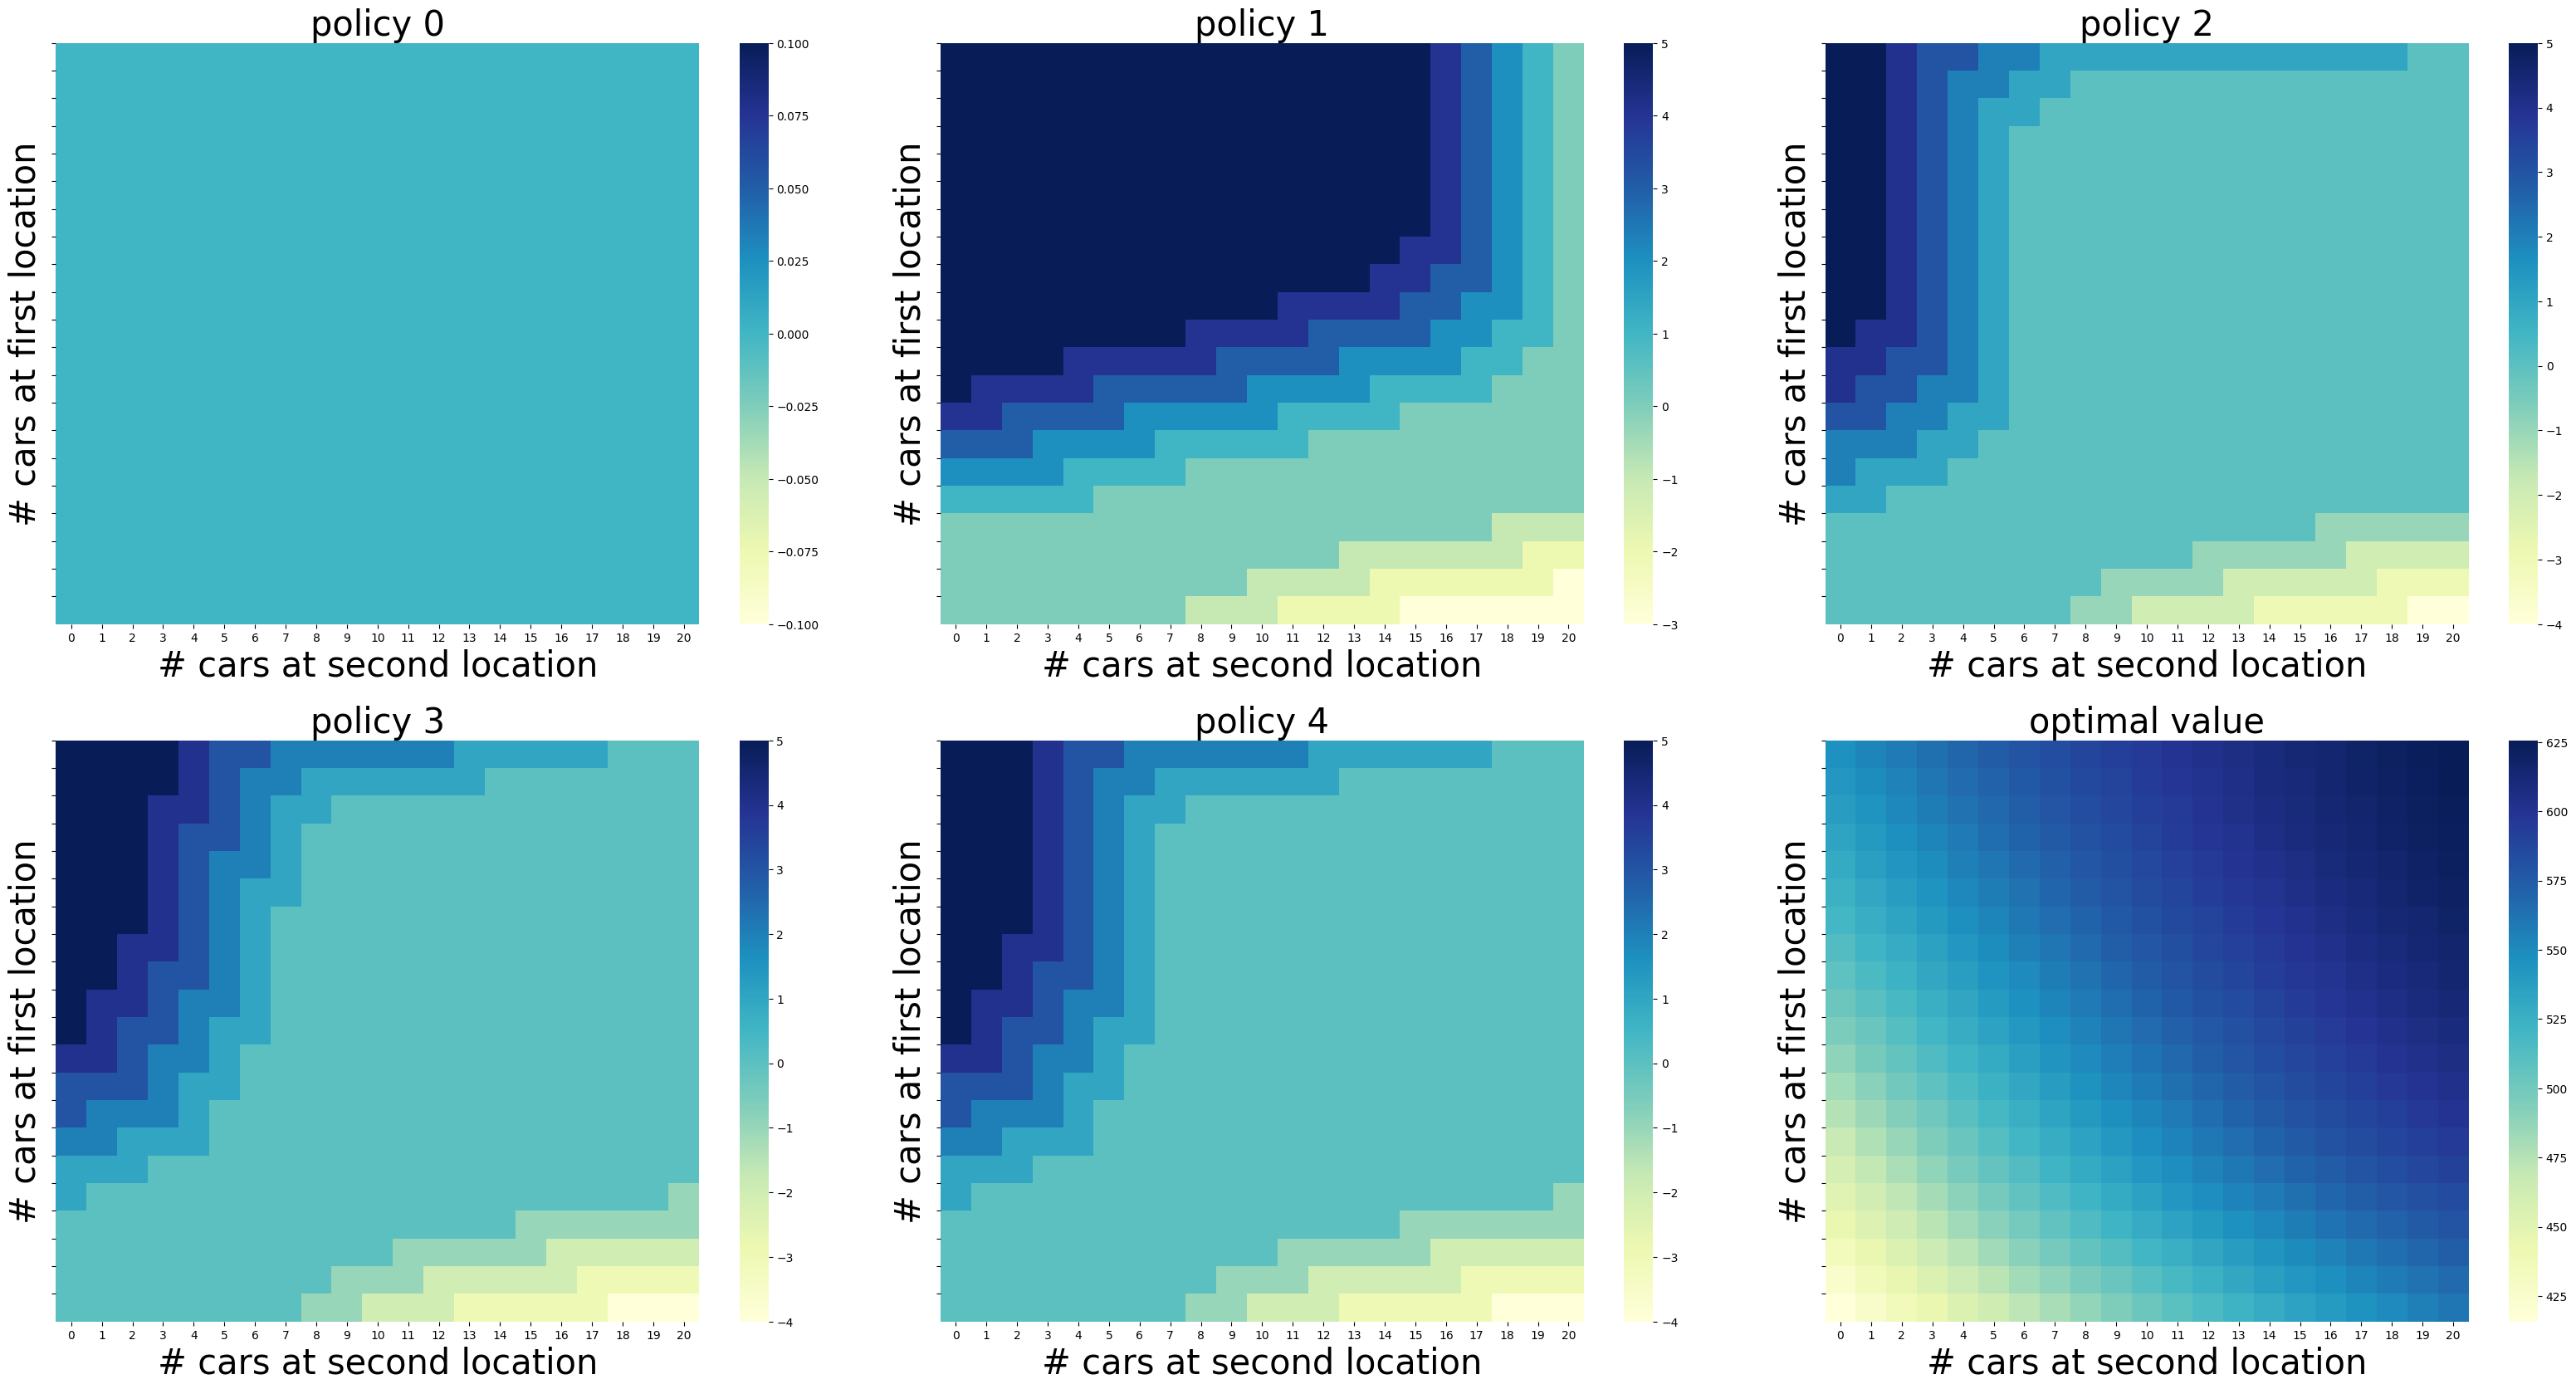

In [100]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, 
                                    constant_return=True, verbose=True)
v, pi = rental.run()

In [101]:
print(np.round(v[0:10, 0:10]))
print(pi)

[[416. 426. 436. 445. 454. 463. 472. 480. 487. 495.]
 [426. 436. 445. 455. 464. 473. 481. 489. 497. 504.]
 [435. 445. 455. 464. 474. 482. 491. 499. 506. 513.]
 [444. 454. 463. 473. 482. 491. 499. 507. 515. 522.]
 [452. 461. 471. 481. 490. 499. 507. 515. 522. 529.]
 [459. 469. 479. 488. 497. 506. 514. 522. 529. 536.]
 [467. 477. 486. 495. 504. 512. 520. 528. 535. 542.]
 [475. 484. 493. 502. 510. 518. 526. 534. 540. 547.]
 [482. 491. 500. 508. 516. 524. 532. 539. 546. 552.]
 [489. 498. 506. 514. 522. 530. 537. 544. 550. 557.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

实现的第一版本中（当时没有参考 c4.car_rental），发现无法收敛。原因在于下面代码中，易车后，没有考虑租车和还车发生的概率。
~~~python
        returns = 0
        next_state, r = self.move(state, action)
        returns += r         
        next_state, r = self.rent(next_state)
        returns += r                 
        next_state, r = self.return_(next_state)
        returns += r
        
        returns += self.discount * v[next_state[0], next_state[1]]
        return returns      
~~~

In [102]:
# max_car_num = 20
# rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, 
#                                     constant_return=True, verbose=True)
# v, pi = rental.run(fun=rental.expected_return_wrong)

after 10 iteration: delta=185.46471893999995
after 20 iteration: delta=180.93601202730497
after 30 iteration: delta=161.80807014680033
after 40 iteration: delta=227.69528870367748
after 50 iteration: delta=153.19107515326158
after 60 iteration: delta=184.15208048726709
after 70 iteration: delta=167.5555949053362
after 80 iteration: delta=192.5967237426383
after 90 iteration: delta=144.0124901405497
after 100 iteration: delta=218.7920394739843
after 110 iteration: delta=202.737440762726
after 120 iteration: delta=171.06790065972302
after 130 iteration: delta=230.5157826284675
after 140 iteration: delta=188.6874610919503
after 150 iteration: delta=153.24989440451247
after 160 iteration: delta=202.57080158960662
after 170 iteration: delta=192.91392361748882
after 180 iteration: delta=184.7840377996868
after 190 iteration: delta=166.79995729211265
after 200 iteration: delta=150.9383725344734
after 210 iteration: delta=217.83862264557388
after 220 iteration: delta=218.17577163882538
after 2

KeyboardInterrupt: 

### exercise 4.7 


练习4.7（编程）杰克汽车出租问题出现了如下变化，编写一个策略迭代程序解决它。

- 杰克第一个网点的一个员工每晚乘公共汽车回家，而且家就在第二个网点的附近。她希望能免费搭一辆车到第二个网点。每一次转移车辆还是需要花费 2 美元。
- 杰克每个网点停车位有限。如果超过10个的话，多出的车辆必须停在第二个停车场，而这需要额外话费 4 美元（无论多少辆车）。

在现实问题中，经常会有像这样的非线性和有些随意的需求。除了动态规划（dynamic programming），其他优化方法往往不容易解决。为了验证你的程序，首先复现一下原始问题的结果。

In [106]:
values, policies = c4.car_rental.exercise_4_7(in_place=False, constant_returned_cars=False, show=True, n_jobs=10) 

2023-03-12 15:32:02,605: INFO: after 10 iteration: max value change 20.4164009399
2023-03-12 15:32:23,550: INFO: after 20 iteration: max value change 6.2914609398
2023-03-12 15:32:43,769: INFO: after 30 iteration: max value change 2.1836124011
2023-03-12 15:33:05,160: INFO: after 40 iteration: max value change 0.7607553399
2023-03-12 15:33:26,705: INFO: after 50 iteration: max value change 0.265160858
2023-03-12 15:33:47,148: INFO: after 60 iteration: max value change 0.0924395733
2023-03-12 15:34:09,372: INFO: after 70 iteration: max value change 0.0322289752
2023-03-12 15:34:30,950: INFO: after 80 iteration: max value change 0.0112370979
2023-03-12 15:34:51,410: INFO: after 90 iteration: max value change 0.0039180588
2023-03-12 15:35:12,584: INFO: after 100 iteration: max value change 0.0013661302
2023-03-12 15:35:33,424: INFO: after 110 iteration: max value change 0.0004763381
2023-03-12 15:35:53,662: INFO: after 120 iteration: max value change 0.0001660885
2023-03-12 15:36:25,397: 

<Figure size 640x480 with 0 Axes>

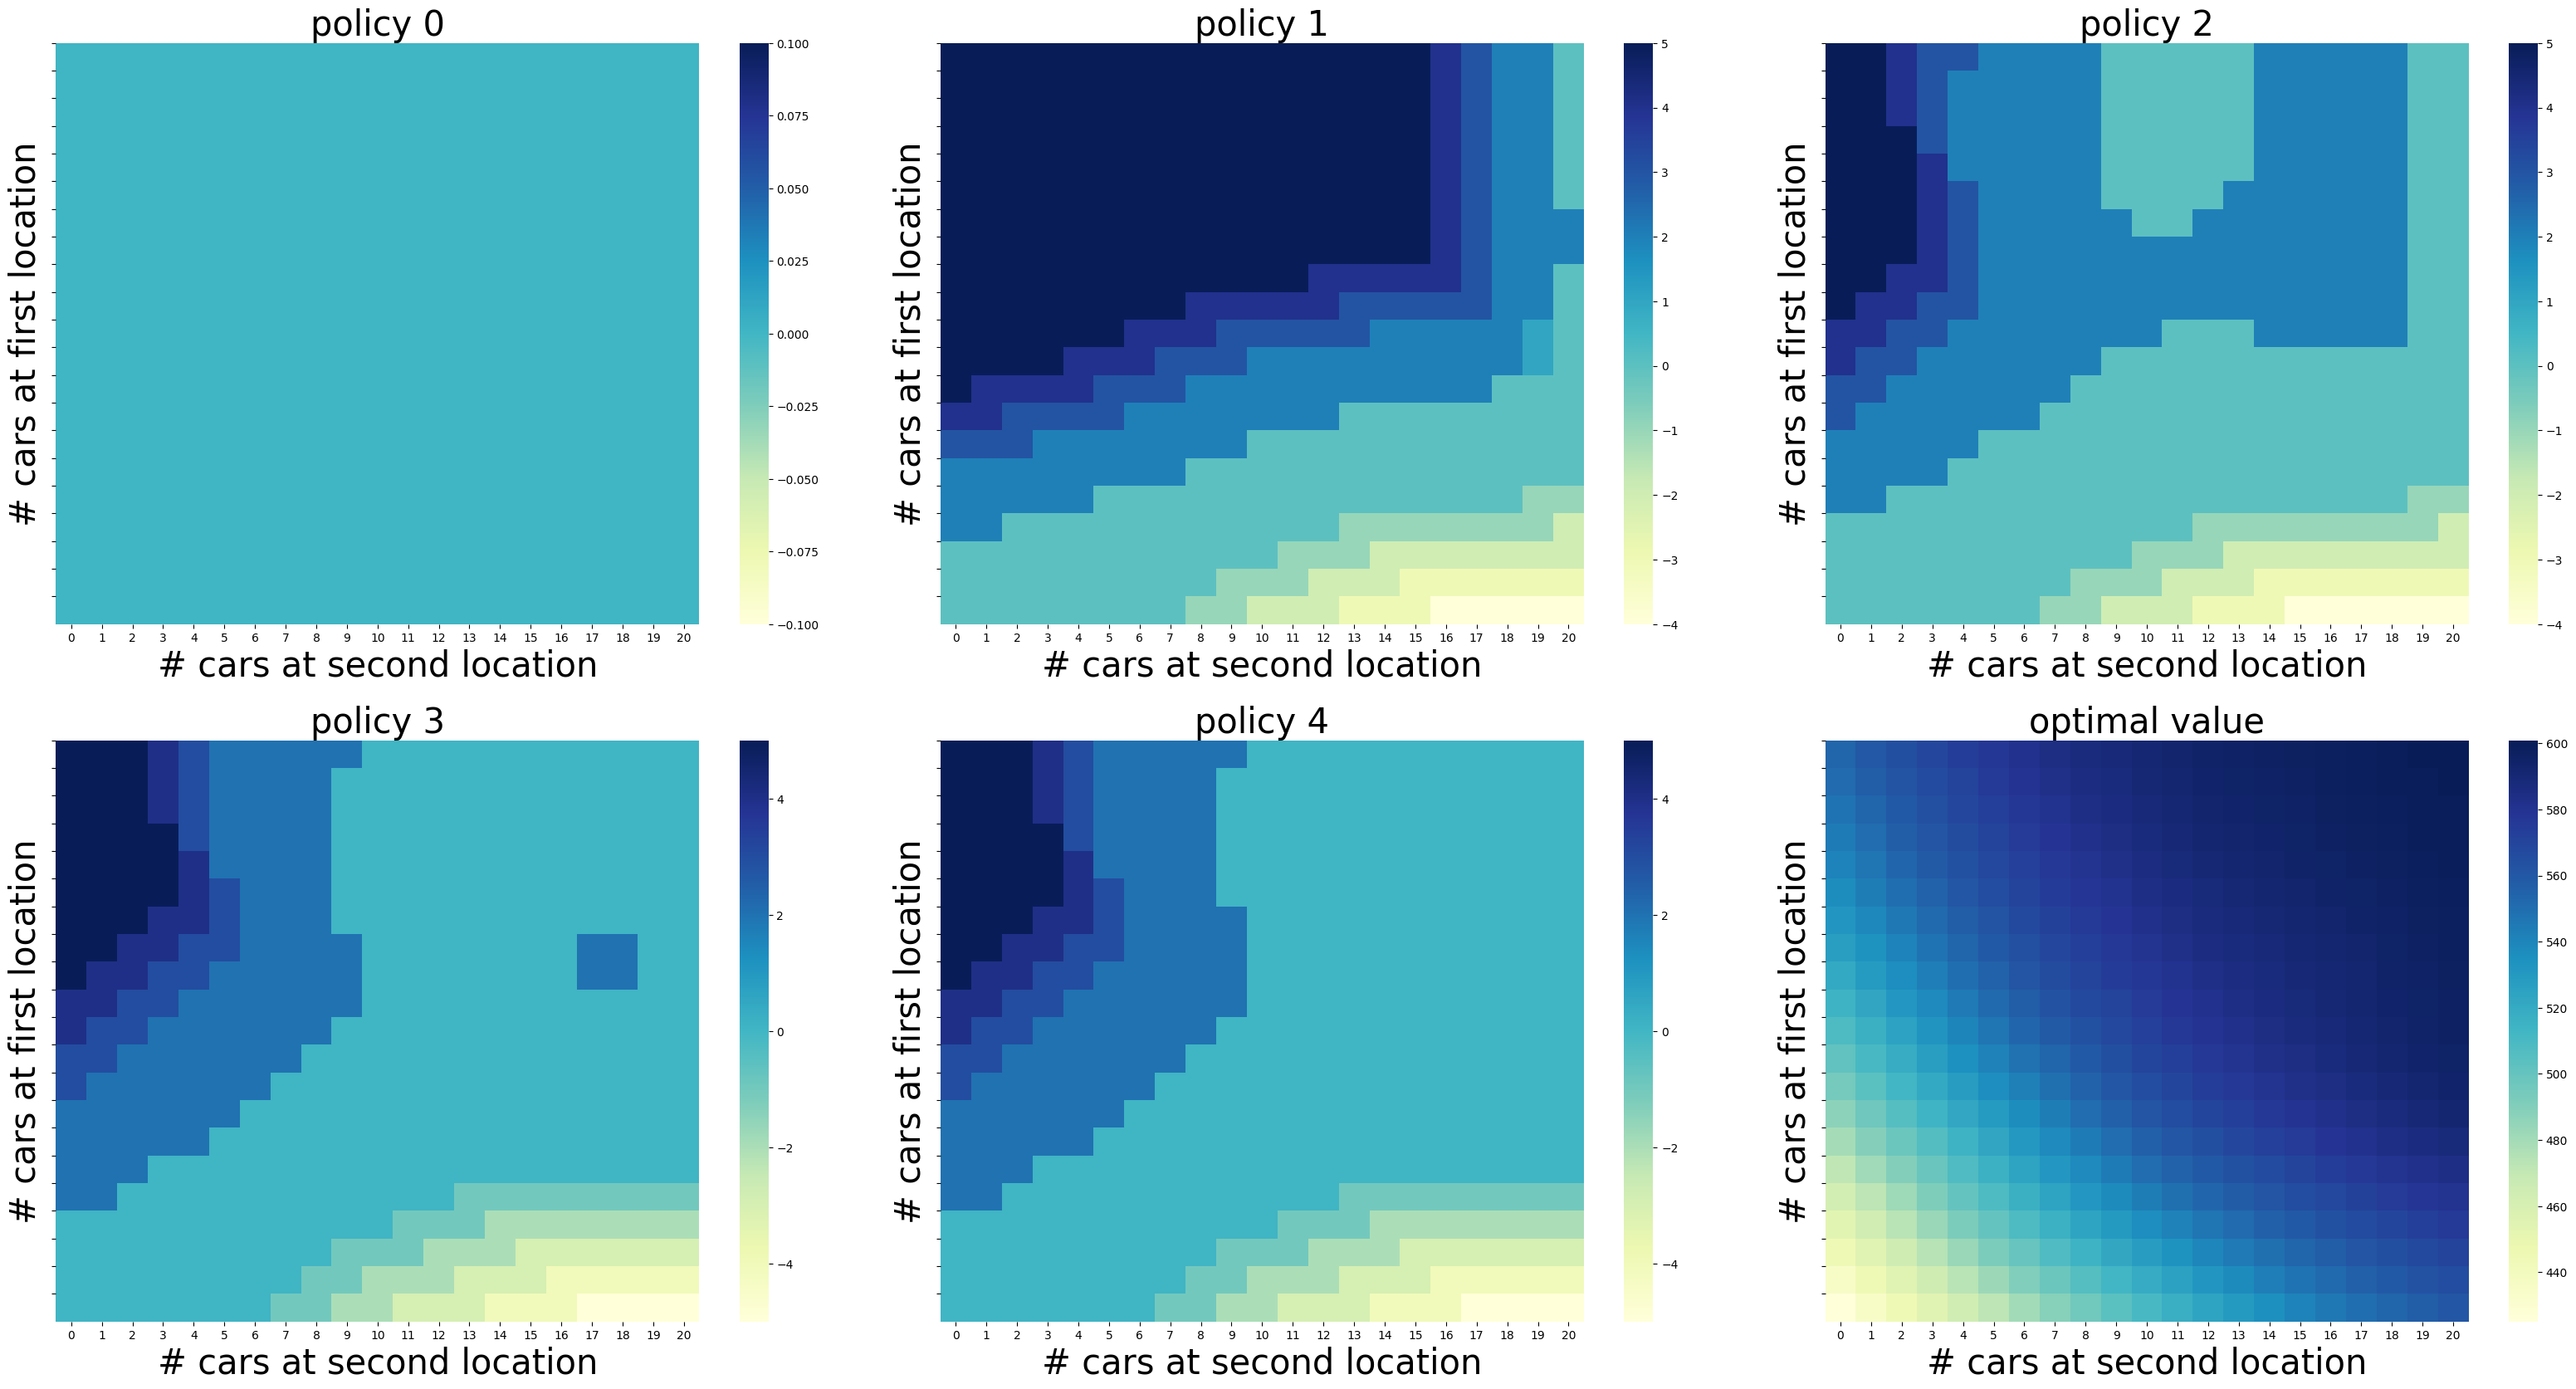

In [107]:
c4.car_rental.plot_policies(values, policies)

2023-03-12 15:47:35,624: INFO: after 10 iteration: max value change: 99.2837115902
2023-03-12 15:48:06,495: INFO: after 20 iteration: max value change: 30.8725812796
2023-03-12 15:48:36,819: INFO: after 30 iteration: max value change: 10.0931131665
2023-03-12 15:49:06,818: INFO: after 40 iteration: max value change: 3.4067163684
2023-03-12 15:49:38,419: INFO: after 50 iteration: max value change: 1.1691176949
2023-03-12 15:50:09,291: INFO: after 60 iteration: max value change: 0.4045308527
2023-03-12 15:50:40,337: INFO: after 70 iteration: max value change: 0.1405331032
2023-03-12 15:51:10,589: INFO: after 80 iteration: max value change: 0.0489147047
2023-03-12 15:51:41,040: INFO: after 90 iteration: max value change: 0.0170411746
2023-03-12 15:52:11,347: INFO: after 100 iteration: max value change: 0.0059395074
2023-03-12 15:52:42,133: INFO: after 110 iteration: max value change: 0.0020705819
2023-03-12 15:53:12,024: INFO: after 120 iteration: max value change: 0.0007219014
2023-03-12

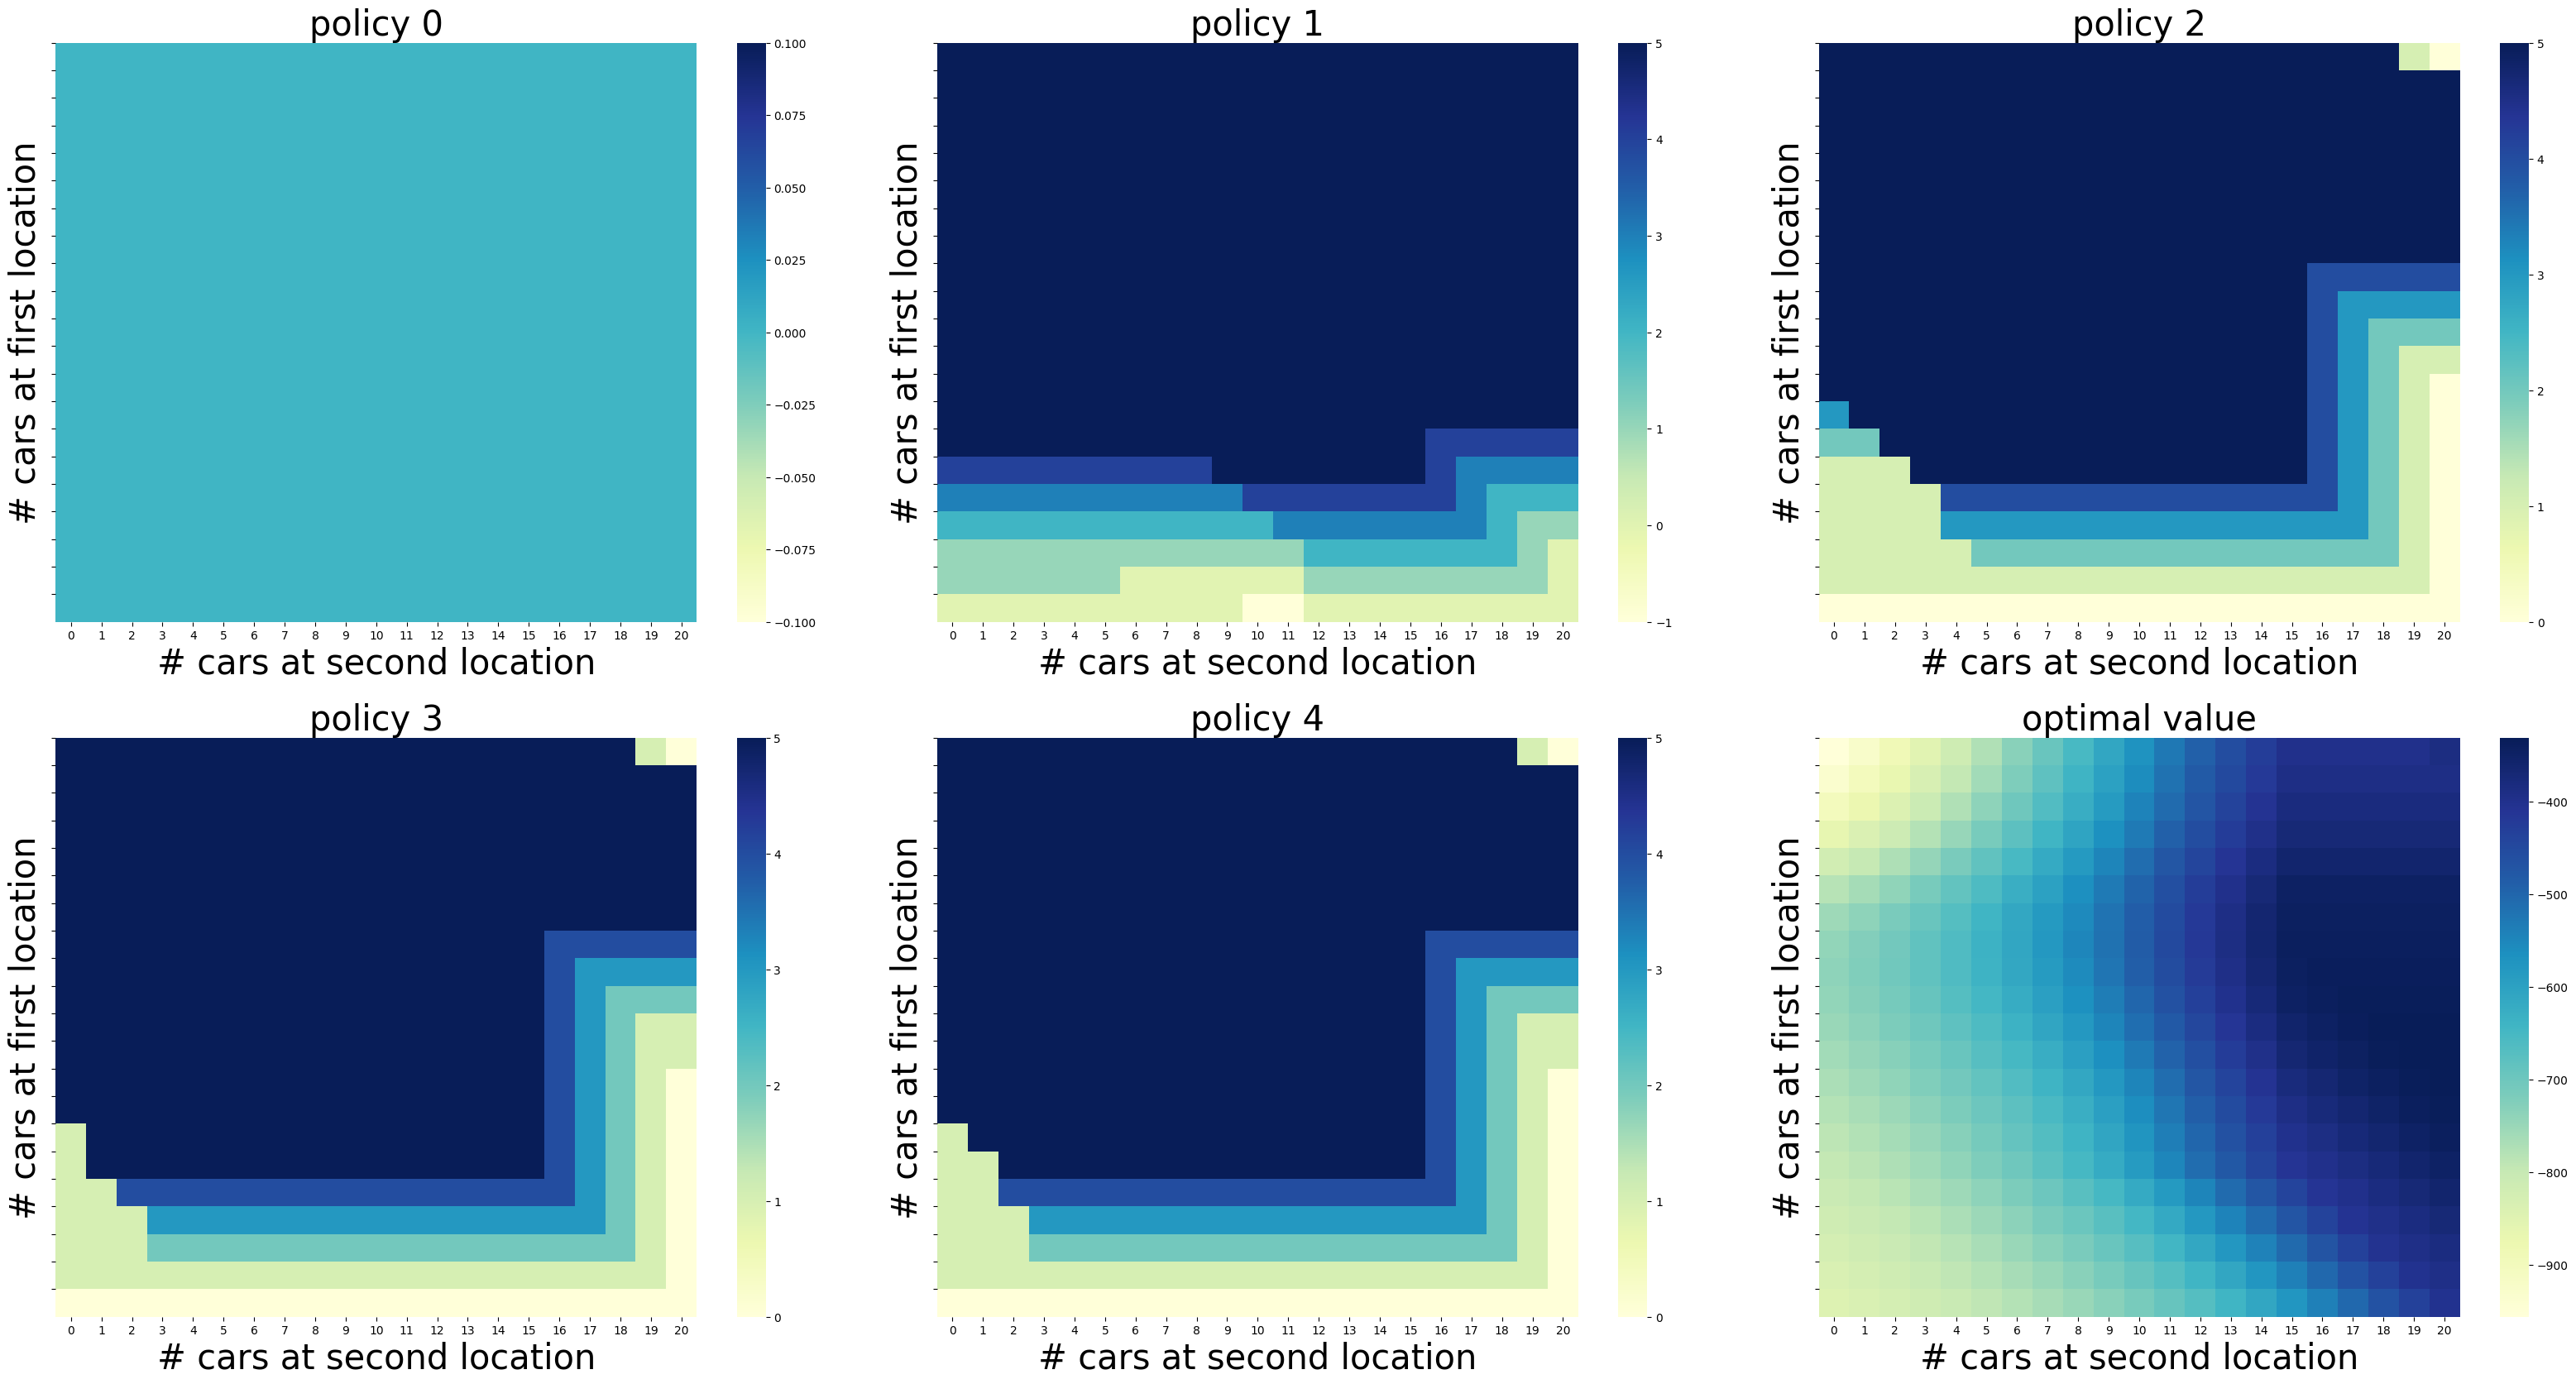

In [108]:
# 另外一种实现
solver = c4.car_rental_synchronous.PolicyIteration(parallel_processes=10, delta=1e-4, gamma=0.9, 
                                                   solve_4_7=True, use_multiprocessing=True) 
solver.solve()
solver.plot()

### figure_4.3

In [24]:
a = np.array([3, 6, 1, 5, 6, 2])
print(a) 
print(np.argwhere(a==np.max(a)))
s = {}
for i in range(100):
    index = np.random.choice(np.argwhere(a==np.max(a)).flatten())
    s[index] = s.get(index, 0) + 1
    
print(s) 

[3 6 1 5 6 2]
[[1]
 [4]]
{1: 52, 4: 48}


after 1 iteration: max value change 0.953344
after 2 iteration: max value change 0.368896
after 3 iteration: max value change 0.139264
after 4 iteration: max value change 0.0557056
after 5 iteration: max value change 0.02228224
after 6 iteration: max value change 0.008912896
after 7 iteration: max value change 0.0016384
after 8 iteration: max value change 0.000393216
after 9 iteration: max value change 7.6026e-05
after 10 iteration: max value change 3.04104e-05
after 11 iteration: max value change 2.6418e-06
after 12 iteration: max value change 9.046e-07
after 13 iteration: max value change 7.82e-08
after 14 iteration: max value change 1.88e-08
after 15 iteration: max value change 5.2e-09
after 16 iteration: max value change 1.9e-09
after 17 iteration: max value change 7e-10
after 18 iteration: max value change 2e-10
after 19 iteration: max value change 0.0
after 20 iteration: max value change 0.0
after 21 iteration: max value change 0.0


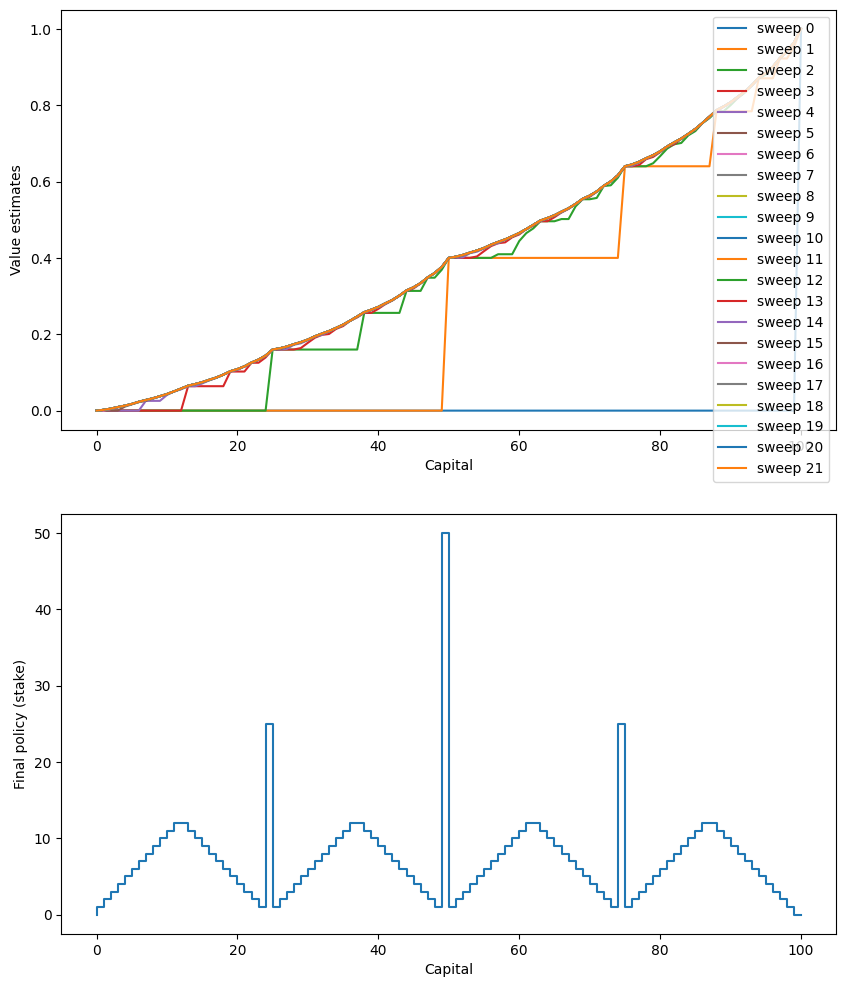

In [36]:
c4.gamblers_problem.figure_4_3() 

2024-01-10 04:15:53,027: INFO: after 1 iteration: max value change 0.953344
2024-01-10 04:15:53,036: INFO: after 2 iteration: max value change 0.368896
2024-01-10 04:15:53,046: INFO: after 3 iteration: max value change 0.139264
2024-01-10 04:15:53,056: INFO: after 4 iteration: max value change 0.0557056
2024-01-10 04:15:53,065: INFO: after 5 iteration: max value change 0.02228224
2024-01-10 04:15:53,074: INFO: after 6 iteration: max value change 0.008912896
2024-01-10 04:15:53,083: INFO: after 7 iteration: max value change 0.0016384
2024-01-10 04:15:53,092: INFO: after 8 iteration: max value change 0.000393216
2024-01-10 04:15:53,102: INFO: after 9 iteration: max value change 7.6026e-05
2024-01-10 04:15:53,111: INFO: after 10 iteration: max value change 3.04104e-05
2024-01-10 04:15:53,120: INFO: after 11 iteration: max value change 2.6418e-06
2024-01-10 04:15:53,129: INFO: after 12 iteration: max value change 9.046e-07
2024-01-10 04:15:53,139: INFO: after 13 iteration: max value change

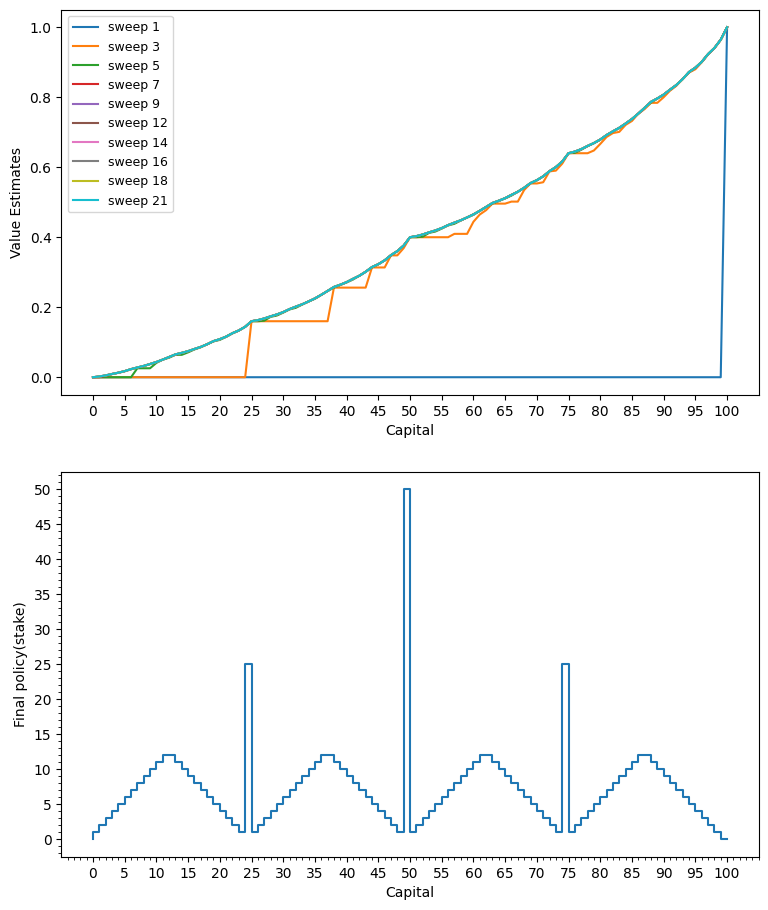

------------------------- state=48, best_action=2 -------------------------


state  action  action_return
1      48       2        0.36037
47     48      48        0.36037

------------------------- state=49, best_action=1 -------------------------


state  action  action_return
0      49       1       0.376222
48     49      49       0.376222

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50            0.4

------------------------- state=51, best_action=1 -------------------------


state  action  action_return
0      51       1       0.403098
48     51      49       0.403098

------------------------- state=52, best_action=2 -------------------------


state  action  action_return
1      52       2       0.407746
47     52      48       0.407746

------------------------- state=24, best_action=1 -------------------------


state  action  action_return
0      24       1       0.144148
23     24      24       0.144148

------------------------- state=25, best_action=25 -------------------------


state  action  action_return
24     25      25           0.16

------------------------- state=26, best_action=1 -------------------------


state  action  action_return
0      26       1       0.163098
23     26      24       0.163098

(1, 0.16309843716476702)

In [47]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(theta=1e-11, discount=1.0)  
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True)  
gambler.expected_return(24, gambler.values[-1], verbose=True) 
gambler.expected_return(25, gambler.values[-1], verbose=True)  
gambler.expected_return(26, gambler.values[-1], verbose=True)

after 1 iteration: max value change 0.953344
after 2 iteration: max value change 0.368896
after 3 iteration: max value change 0.139264
after 4 iteration: max value change 0.0557056
after 5 iteration: max value change 0.02228224
after 6 iteration: max value change 0.008912896
after 7 iteration: max value change 0.0016384
after 8 iteration: max value change 0.000393216
after 9 iteration: max value change 7.6026e-05
after 10 iteration: max value change 3.04104e-05
after 11 iteration: max value change 2.6418e-06
after 12 iteration: max value change 9.046e-07
after 13 iteration: max value change 7.82e-08
after 14 iteration: max value change 1.88e-08
after 15 iteration: max value change 5.2e-09
after 16 iteration: max value change 1.9e-09
after 17 iteration: max value change 7e-10
after 18 iteration: max value change 2e-10
after 19 iteration: max value change 0.0
after 20 iteration: max value change 0.0
after 21 iteration: max value change 0.0


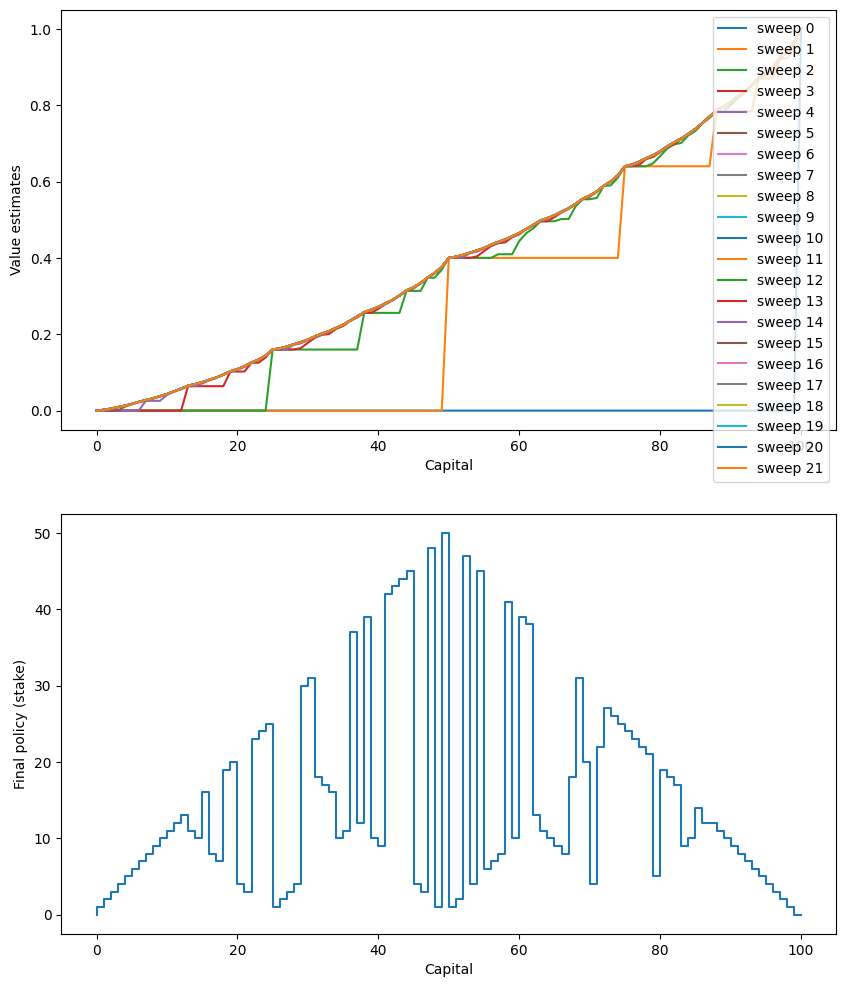

In [44]:
# 当最大价值函数有个多个Action时，随机采用其中一个
c4.gamblers_problem.figure_4_3(random_max=True) 

2024-01-10 04:16:26,153: INFO: after 1 iteration: max value change 0.7632039825
2024-01-10 04:16:26,170: INFO: after 2 iteration: max value change 0.268802655
2024-01-10 04:16:26,186: INFO: after 3 iteration: max value change 0.09280177
2024-01-10 04:16:26,202: INFO: after 4 iteration: max value change 0.0334086372
2024-01-10 04:16:26,218: INFO: after 5 iteration: max value change 0.0120271094
2024-01-10 04:16:26,233: INFO: after 6 iteration: max value change 0.0043297594
2024-01-10 04:16:26,249: INFO: after 7 iteration: max value change 0.0008417052
2024-01-10 04:16:26,265: INFO: after 8 iteration: max value change 0.0001636275
2024-01-10 04:16:26,281: INFO: after 9 iteration: max value change 5.89059e-05
2024-01-10 04:16:26,296: INFO: after 10 iteration: max value change 2.12061e-05
2024-01-10 04:16:26,312: INFO: after 11 iteration: max value change 7.6342e-06
2024-01-10 04:16:26,328: INFO: after 12 iteration: max value change 4.328e-07
2024-01-10 04:16:26,344: INFO: after 13 iterati

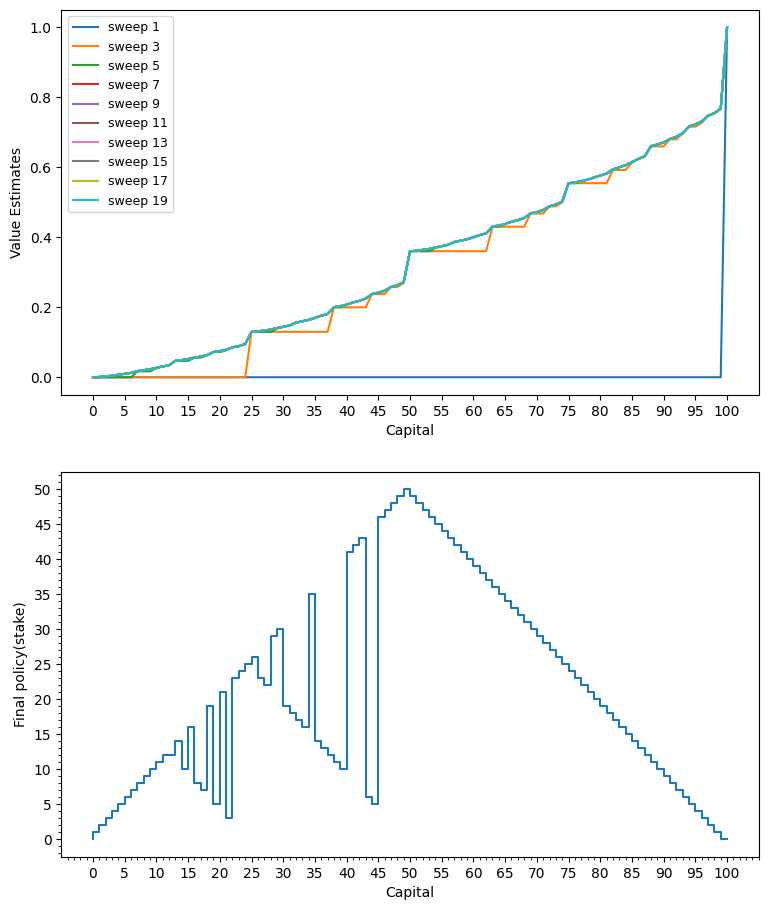

------------------------- state=49, best_action=1 -------------------------


state  action  action_return
0      49       1       0.271709
48     49      49       0.271709

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50           0.36

------------------------- state=51, best_action=49 -------------------------


state  action  action_return
48     51      49       0.361416

(49, 0.3614156627599924)

In [49]:
# 当最大价值函数有个多个Action时，随机采用其中一个
gambler = c4.gamblers_problem_m.Gambler(theta=1e-11, discount=0.9, random_max=True)  
gambler.value_iteration()
gambler.plot()

gambler.expected_return(49, gambler.values[-1], verbose=True)  
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  


### exercise_4.9

#### discount=1.0

2023-03-12 16:10:42,806: INFO: after 1 iteration: max value change 0.8220214844
2023-03-12 16:10:42,816: INFO: after 2 iteration: max value change 0.1906738281
2023-03-12 16:10:42,827: INFO: after 3 iteration: max value change 0.0427246094
2023-03-12 16:10:42,838: INFO: after 4 iteration: max value change 0.0106811523
2023-03-12 16:10:42,849: INFO: after 5 iteration: max value change 0.0026702881
2023-03-12 16:10:42,859: INFO: after 6 iteration: max value change 0.000667572
2023-03-12 16:10:42,870: INFO: after 7 iteration: max value change 0.0001158714
2023-03-12 16:10:42,880: INFO: after 8 iteration: max value change 2.17259e-05
2023-03-12 16:10:42,891: INFO: after 9 iteration: max value change 5.4315e-06
2023-03-12 16:10:42,902: INFO: after 10 iteration: max value change 1.3579e-06
2023-03-12 16:10:42,913: INFO: after 11 iteration: max value change 3.395e-07
2023-03-12 16:10:42,924: INFO: after 12 iteration: max value change 3.58e-08


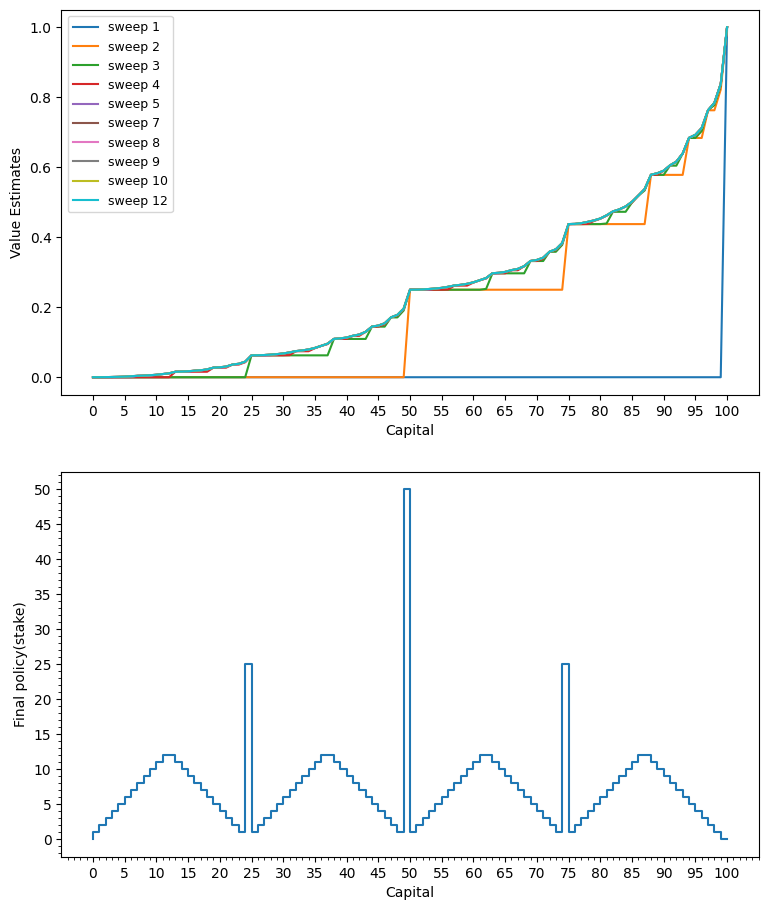

------------------------- state=48, best_action=48 -------------------------


state  action  action_return
47     48      48       0.177988

------------------------- state=49, best_action=49 -------------------------


state  action  action_return
48     49      49       0.195991

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50           0.25

------------------------- state=51, best_action=1 -------------------------


state  action  action_return
0     51       1       0.250219

------------------------- state=52, best_action=2 -------------------------


state  action  action_return
1      52       2       0.250874
47     52      48       0.250874

(2, 0.2508743339724333)

In [111]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.25, theta=1e-7)
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True)

2023-03-12 16:10:44,029: INFO: after 1 iteration: max value change 0.984375
2023-03-12 16:10:44,040: INFO: after 2 iteration: max value change 0.484375
2023-03-12 16:10:44,051: INFO: after 3 iteration: max value change 0.234375
2023-03-12 16:10:44,062: INFO: after 4 iteration: max value change 0.1171875
2023-03-12 16:10:44,073: INFO: after 5 iteration: max value change 0.05859375
2023-03-12 16:10:44,083: INFO: after 6 iteration: max value change 0.029296875
2023-03-12 16:10:44,094: INFO: after 7 iteration: max value change 0.0078125
2023-03-12 16:10:44,105: INFO: after 8 iteration: max value change 0.001953125
2023-03-12 16:10:44,116: INFO: after 9 iteration: max value change 0.0002288818
2023-03-12 16:10:44,126: INFO: after 10 iteration: max value change 5.4836e-06
2023-03-12 16:10:44,139: INFO: after 11 iteration: max value change 7.5e-09


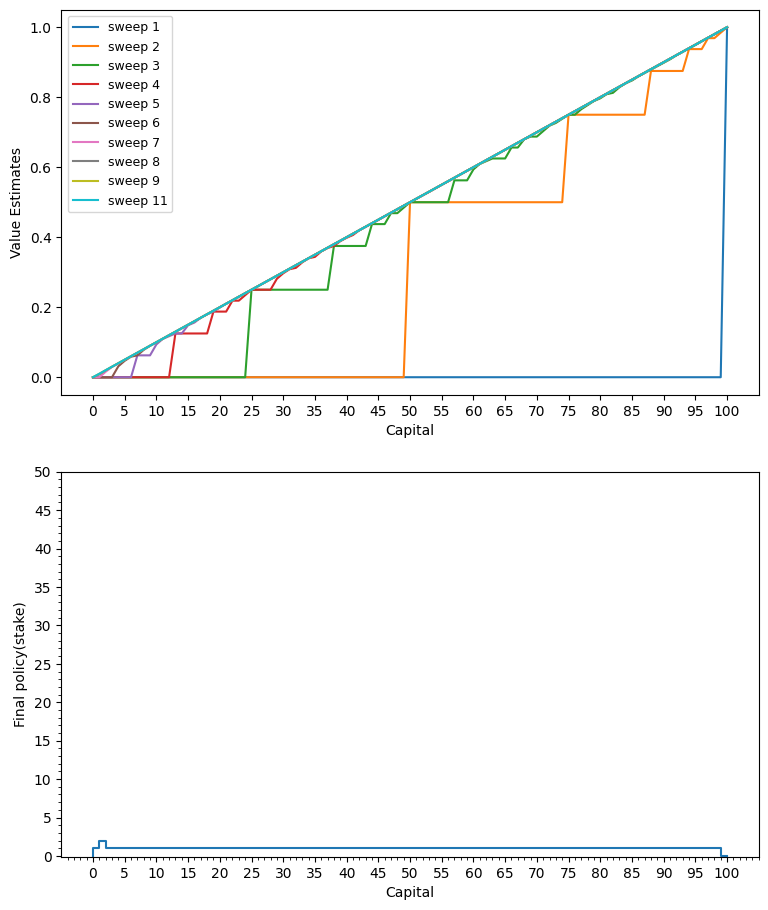

------------------------- state=48, best_action=1 -------------------------


state  action  action_return
0     48       1           0.48
1     48       2           0.48

------------------------- state=49, best_action=1 -------------------------


state  action  action_return
0     49       1           0.49
1     49       2           0.49

------------------------- state=50, best_action=1 -------------------------


state  action  action_return
0     50       1            0.5
1     50       2            0.5

------------------------- state=51, best_action=1 -------------------------


state  action  action_return
0     51       1           0.51
1     51       2           0.51

------------------------- state=52, best_action=1 -------------------------


state  action  action_return
0     52       1           0.52
1     52       2           0.52

(1, 0.5199999999999947)

In [112]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.5, theta=1e-7)
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True)

2023-03-12 16:10:46,153: INFO: after 100 iteration: max value change 0.0026405816
2023-03-12 16:10:47,121: INFO: after 200 iteration: max value change 0.0013201264
2023-03-12 16:10:48,097: INFO: after 300 iteration: max value change 0.0006078524
2023-03-12 16:10:49,051: INFO: after 400 iteration: max value change 0.0002633359
2023-03-12 16:10:49,988: INFO: after 500 iteration: max value change 0.0001101603
2023-03-12 16:10:50,979: INFO: after 600 iteration: max value change 4.49403e-05
2023-03-12 16:10:51,902: INFO: after 700 iteration: max value change 1.76706e-05
2023-03-12 16:10:52,887: INFO: after 800 iteration: max value change 6.6726e-06
2023-03-12 16:10:53,832: INFO: after 900 iteration: max value change 2.4362e-06
2023-03-12 16:10:54,790: INFO: after 1000 iteration: max value change 8.668e-07
2023-03-12 16:10:55,696: INFO: after 1100 iteration: max value change 3.025e-07
2023-03-12 16:10:56,658: INFO: after 1200 iteration: max value change 1.041e-07


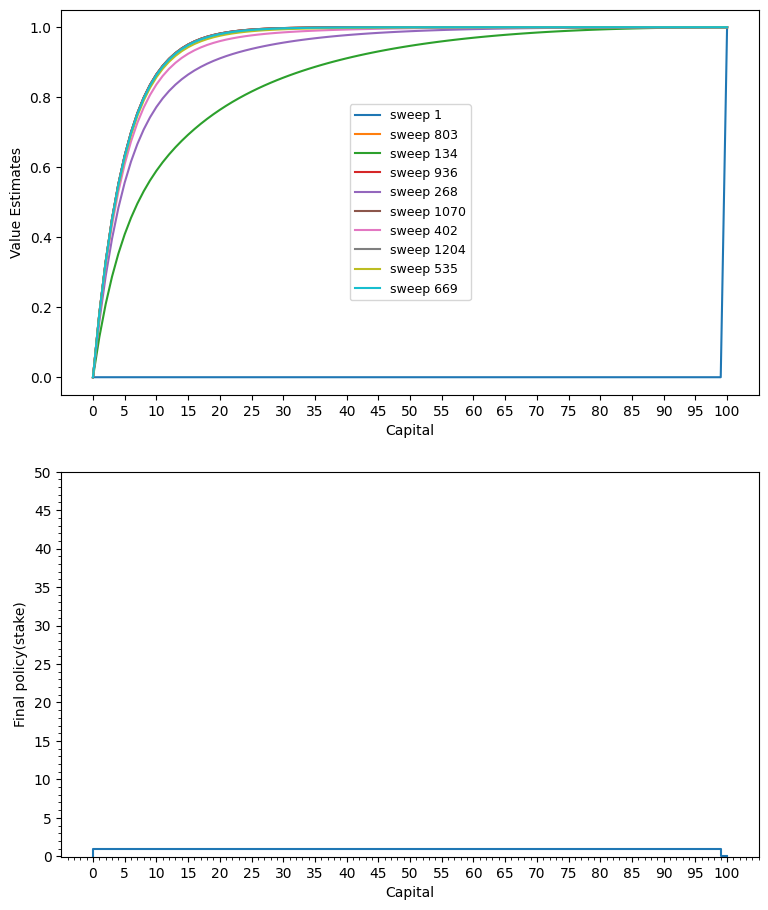

------------------------- state=48, best_action=1 -------------------------


state  action  action_return
0     48       1       0.999934

------------------------- state=49, best_action=1 -------------------------


state  action  action_return
0     49       1       0.999946

------------------------- state=50, best_action=1 -------------------------


state  action  action_return
0     50       1       0.999956

------------------------- state=51, best_action=1 -------------------------


state  action  action_return
0     51       1       0.999964

------------------------- state=52, best_action=1 -------------------------


state  action  action_return
0     52       1        0.99997

------------------------- state=10, best_action=1 -------------------------


state  action  action_return
0     10       1        0.86556

------------------------- state=15, best_action=1 -------------------------


state  action  action_return
0     15       1       0.950703

(1, 0.9507032846280352)

In [113]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.55, theta=1e-7, show_iteration_count=100)
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True)
gambler.expected_return(10, gambler.values[-1], verbose=True)
gambler.expected_return(15, gambler.values[-1], verbose=True)

#### discount=0.9

2023-03-18 01:51:45,398: INFO: after 1 iteration: max value change 0.7632039825
2023-03-18 01:51:45,409: INFO: after 2 iteration: max value change 0.268802655
2023-03-18 01:51:45,420: INFO: after 3 iteration: max value change 0.09280177
2023-03-18 01:51:45,431: INFO: after 4 iteration: max value change 0.0334086372
2023-03-18 01:51:45,441: INFO: after 5 iteration: max value change 0.0120271094
2023-03-18 01:51:45,451: INFO: after 6 iteration: max value change 0.0043297594
2023-03-18 01:51:45,462: INFO: after 7 iteration: max value change 0.0008417052
2023-03-18 01:51:45,472: INFO: after 8 iteration: max value change 0.0001636275
2023-03-18 01:51:45,482: INFO: after 9 iteration: max value change 5.89059e-05
2023-03-18 01:51:45,493: INFO: after 10 iteration: max value change 2.12061e-05
2023-03-18 01:51:45,503: INFO: after 11 iteration: max value change 7.6342e-06
2023-03-18 01:51:45,514: INFO: after 12 iteration: max value change 4.328e-07
2023-03-18 01:51:45,524: INFO: after 13 iterati

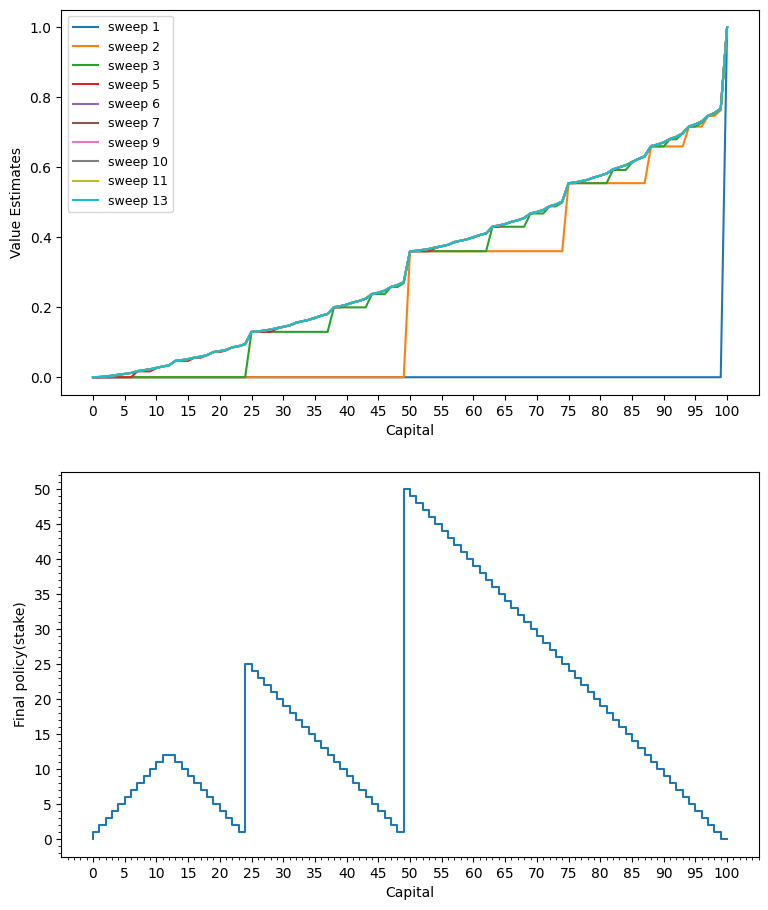

------------------------- state=48, best_action=2 -------------------------


state  action  action_return
1      48       2       0.263165
47     48      48       0.263165

------------------------- state=49, best_action=49 -------------------------


state  action  action_return
48     49      49       0.271709

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50           0.36

------------------------- state=51, best_action=49 -------------------------


state  action  action_return
48     51      49       0.361416

------------------------- state=52, best_action=48 -------------------------


state  action  action_return
47     52      48       0.363932

(48, 0.3639323962549137)

In [5]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.4,theta=1e-7, discount=0.90)  
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True) 

2023-03-12 16:10:59,057: INFO: after 1 iteration: max value change 0.6268257136
2023-03-12 16:10:59,068: INFO: after 2 iteration: max value change 0.1339419045
2023-03-12 16:10:59,080: INFO: after 3 iteration: max value change 0.0277723015
2023-03-12 16:10:59,091: INFO: after 4 iteration: max value change 0.0062487678
2023-03-12 16:10:59,103: INFO: after 5 iteration: max value change 0.0014059728
2023-03-12 16:10:59,114: INFO: after 6 iteration: max value change 0.0003163439
2023-03-12 16:10:59,126: INFO: after 7 iteration: max value change 4.80447e-05
2023-03-12 16:10:59,137: INFO: after 8 iteration: max value change 7.2968e-06
2023-03-12 16:10:59,148: INFO: after 9 iteration: max value change 1.6418e-06
2023-03-12 16:10:59,160: INFO: after 10 iteration: max value change 3.694e-07
2023-03-12 16:10:59,171: INFO: after 11 iteration: max value change 8.31e-08


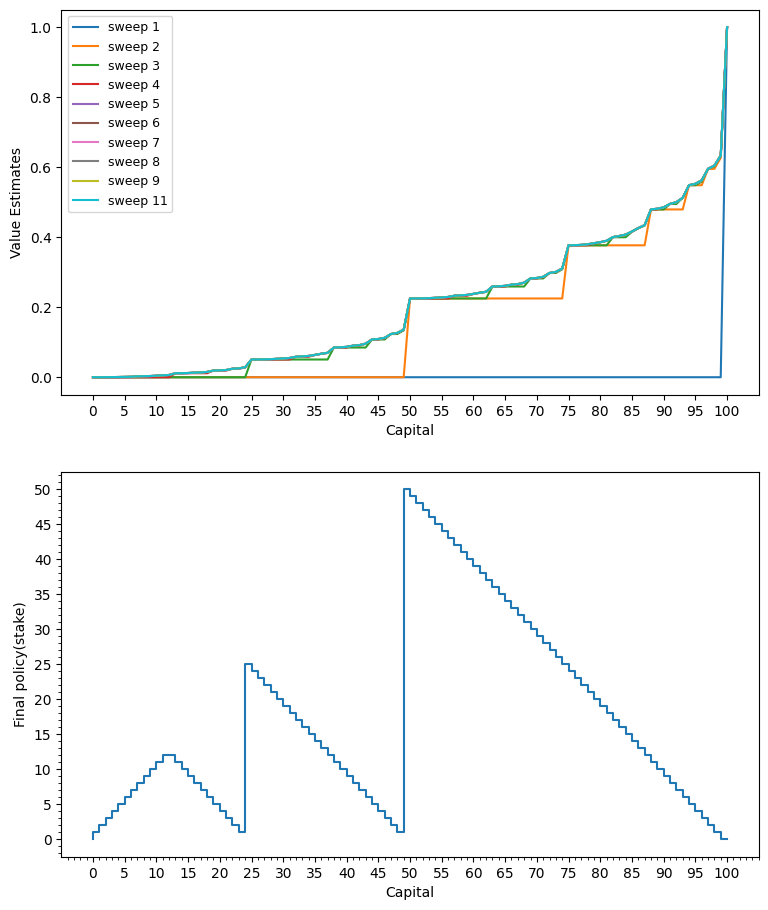

------------------------- state=48, best_action=2 -------------------------


state  action  action_return
1      48       2       0.126563
47     48      48       0.126563

------------------------- state=49, best_action=1 -------------------------


state  action  action_return
0      49       1       0.136055
48     49      49       0.136055

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50          0.225

------------------------- state=51, best_action=49 -------------------------


state  action  action_return
48     51      49       0.225101

------------------------- state=52, best_action=48 -------------------------


state  action  action_return
47     52      48       0.225449

(48, 0.22544948411934157)

In [115]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.25,theta=1e-7, discount=0.9)  
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True) 

2023-03-12 16:11:00,254: INFO: after 1 iteration: max value change 0.8113878281
2023-03-12 16:11:00,265: INFO: after 2 iteration: max value change 0.3613878281
2023-03-12 16:11:00,276: INFO: after 3 iteration: max value change 0.1588878281
2023-03-12 16:11:00,287: INFO: after 4 iteration: max value change 0.0714995227
2023-03-12 16:11:00,297: INFO: after 5 iteration: max value change 0.0321747852
2023-03-12 16:11:00,308: INFO: after 6 iteration: max value change 0.0144786533
2023-03-12 16:11:00,318: INFO: after 7 iteration: max value change 0.0037366945
2023-03-12 16:11:00,329: INFO: after 8 iteration: max value change 0.0007566806
2023-03-12 16:11:00,340: INFO: after 9 iteration: max value change 0.0002671719
2023-03-12 16:11:00,350: INFO: after 10 iteration: max value change 0.0001202273
2023-03-12 16:11:00,361: INFO: after 11 iteration: max value change 5.41023e-05
2023-03-12 16:11:00,372: INFO: after 12 iteration: max value change 2.2185e-06
2023-03-12 16:11:00,383: INFO: after 13 

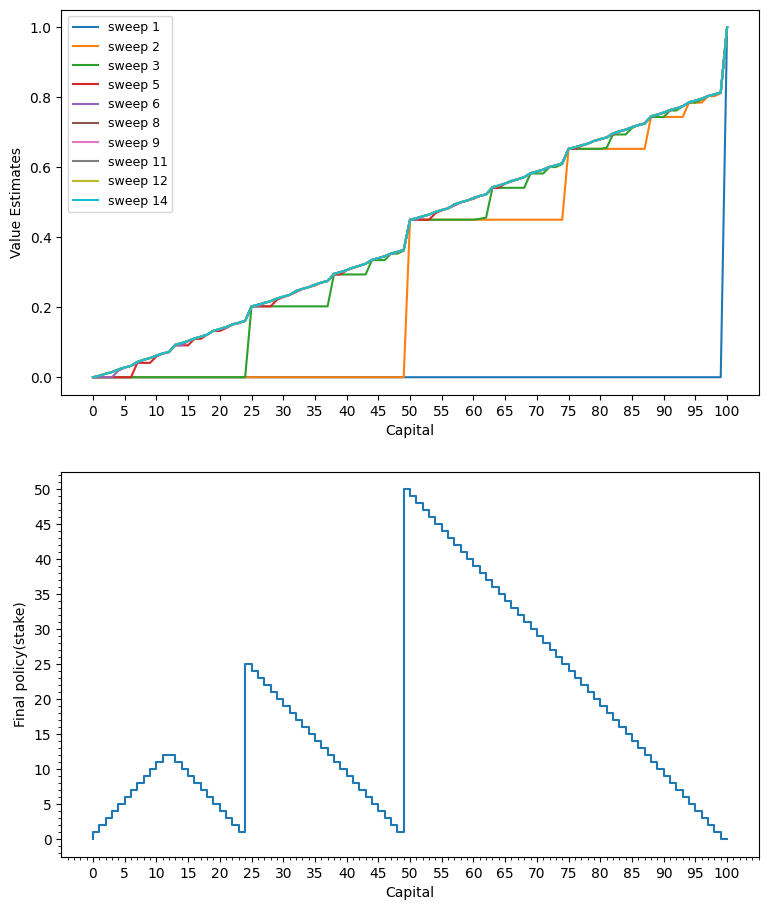

------------------------- state=48, best_action=2 -------------------------


state  action  action_return
1      48       2       0.358075
22     48      23       0.358075

------------------------- state=49, best_action=1 -------------------------


state  action  action_return
0      49       1       0.363634
23     49      24       0.363634

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50           0.45

------------------------- state=51, best_action=49 -------------------------


state  action  action_return
48     51      49       0.454548

------------------------- state=52, best_action=48 -------------------------


state  action  action_return
47     52      48       0.460107

(48, 0.460107203650025)

In [116]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.5,theta=1e-7, discount=0.9)  
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True) 

2023-03-13 00:37:52,580: INFO: after 1 iteration: max value change 0.8282614858
2023-03-13 00:37:52,593: INFO: after 2 iteration: max value change 0.4073195938
2023-03-13 00:37:52,605: INFO: after 3 iteration: max value change 0.198360059
2023-03-13 00:37:52,617: INFO: after 4 iteration: max value change 0.0981882292
2023-03-13 00:37:52,629: INFO: after 5 iteration: max value change 0.0486031735
2023-03-13 00:37:52,641: INFO: after 6 iteration: max value change 0.0240585709
2023-03-13 00:37:52,653: INFO: after 7 iteration: max value change 0.0072817605
2023-03-13 00:37:52,665: INFO: after 8 iteration: max value change 0.0014598109
2023-03-13 00:37:52,677: INFO: after 9 iteration: max value change 0.0004786251
2023-03-13 00:37:52,689: INFO: after 10 iteration: max value change 0.0002369194
2023-03-13 00:37:52,701: INFO: after 11 iteration: max value change 0.0001172751
2023-03-13 00:37:52,713: INFO: after 12 iteration: max value change 5.32304e-05
2023-03-13 00:37:52,725: INFO: after 13

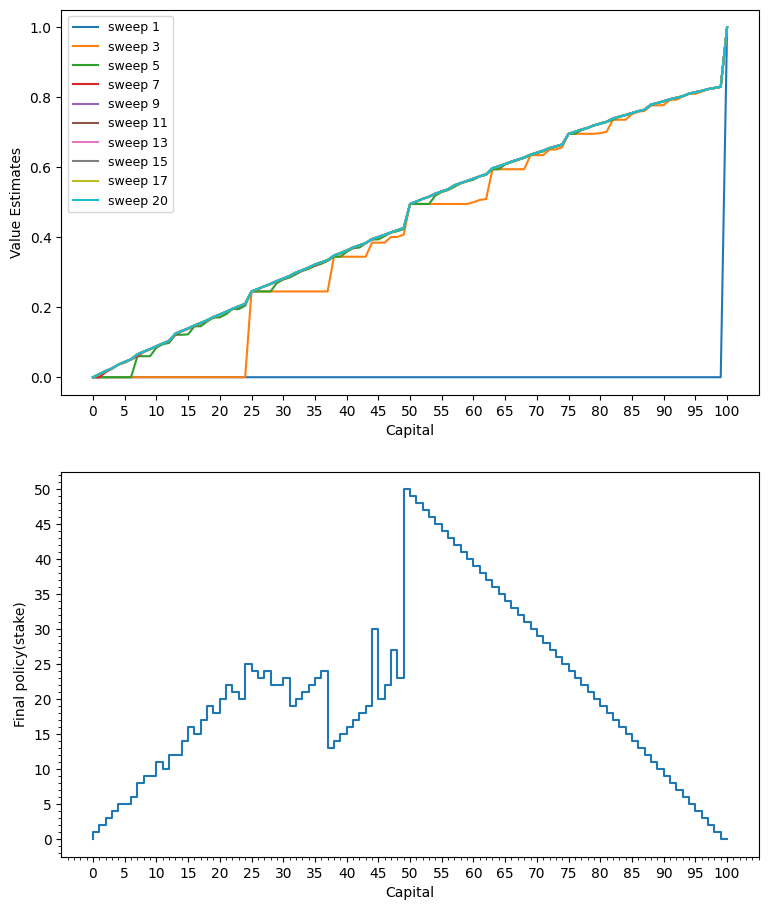

------------------------- state=48, best_action=27 -------------------------


state  action  action_return
26     48      27       0.420046

------------------------- state=49, best_action=27 -------------------------


state  action  action_return
26     49      27       0.426362

------------------------- state=50, best_action=50 -------------------------


state  action  action_return
49     50      50          0.495

------------------------- state=51, best_action=49 -------------------------


state  action  action_return
48     51      49       0.502275

------------------------- state=52, best_action=48 -------------------------


state  action  action_return
47     52      48       0.509697

(48, 0.5096974040527802)

In [121]:
# my version.
gambler = c4.gamblers_problem_m.Gambler(head_prob=0.55,theta=1e-7, discount=0.9)  
gambler.value_iteration()
gambler.plot()

gambler.expected_return(48, gambler.values[-1], verbose=True) 
gambler.expected_return(49, gambler.values[-1], verbose=True) 
gambler.expected_return(50, gambler.values[-1], verbose=True) 
gambler.expected_return(51, gambler.values[-1], verbose=True)  
gambler.expected_return(52, gambler.values[-1], verbose=True) 

In [122]:
gambler.expected_return(44, gambler.values[-1], verbose=True) 
gambler.expected_return(45, gambler.values[-1], verbose=True) 
gambler.expected_return(46, gambler.values[-1], verbose=True) 
gambler.expected_return(35, gambler.values[-1], verbose=True)  
gambler.expected_return(36, gambler.values[-1], verbose=True) 
gambler.expected_return(37, gambler.values[-1], verbose=True) 

------------------------- state=44, best_action=19 -------------------------


state  action  action_return
18     44      19        0.39484
30     44      31        0.39484

------------------------- state=45, best_action=30 -------------------------


state  action  action_return
29     45      30       0.400874

------------------------- state=46, best_action=30 -------------------------


state  action  action_return
29     46      30        0.40719

------------------------- state=35, best_action=22 -------------------------


state  action  action_return
21     35      22         0.3221
27     35      28         0.3221

------------------------- state=36, best_action=23 -------------------------


state  action  action_return
22     36      23       0.328291

------------------------- state=37, best_action=24 -------------------------


state  action  action_return
23     37      24       0.334787

(24, 0.3347868773638397)

## Chapter 5

### figure_5_1

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:22<00:00, 22143.35it/s]


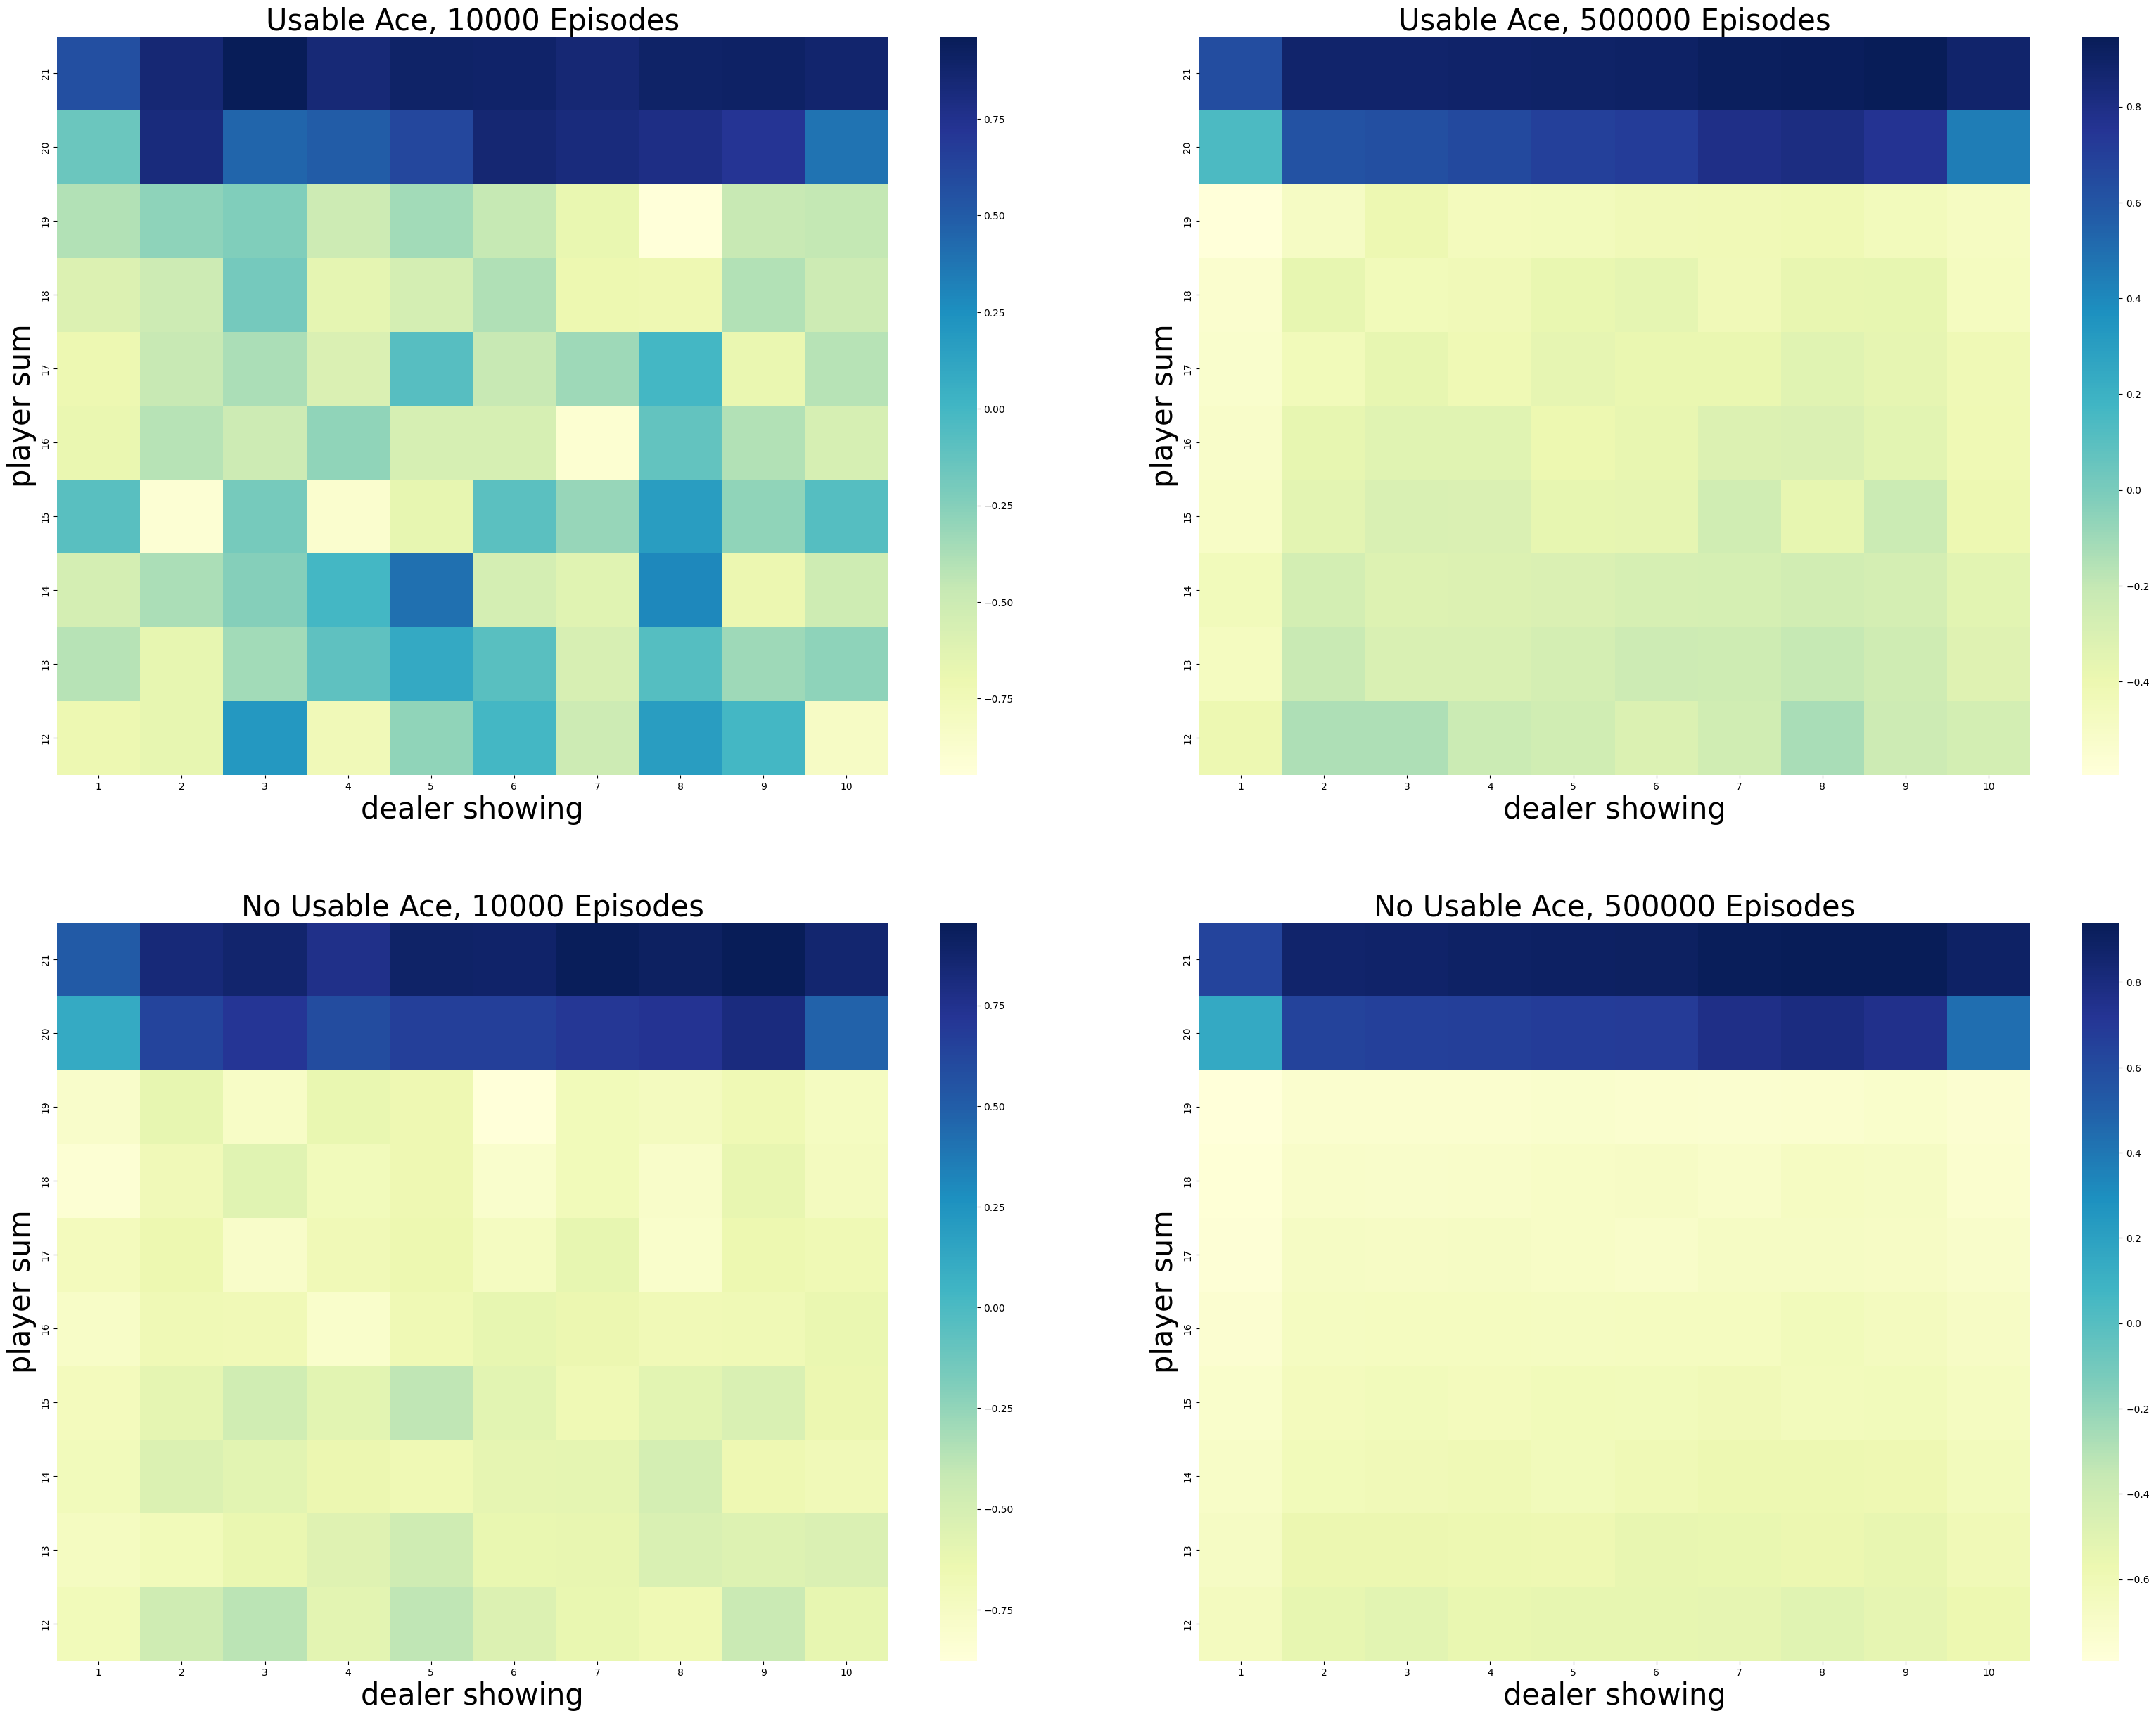

In [7]:
c5.blackjack.figure_5_1(500000)

### figure_5_2

In [14]:
episodes = 500000
state_action_values = c5.blackjack.monte_carlo_es(episodes) 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:48<00:00, 4598.40it/s]


In [19]:
actual_reward, plan_reward, win_rate = c5.blackjack.compute_win_rate(episodes, state_action_values)
print(f'actual_reward: {actual_reward:.3f}\nplan_reward: {plan_reward:.3f}\nwin_rate: {win_rate:.3f}') 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:13<00:00, 6832.33it/s]

actual_reward: -0.047
plan_reward: -0.046
win_rate: 0.477


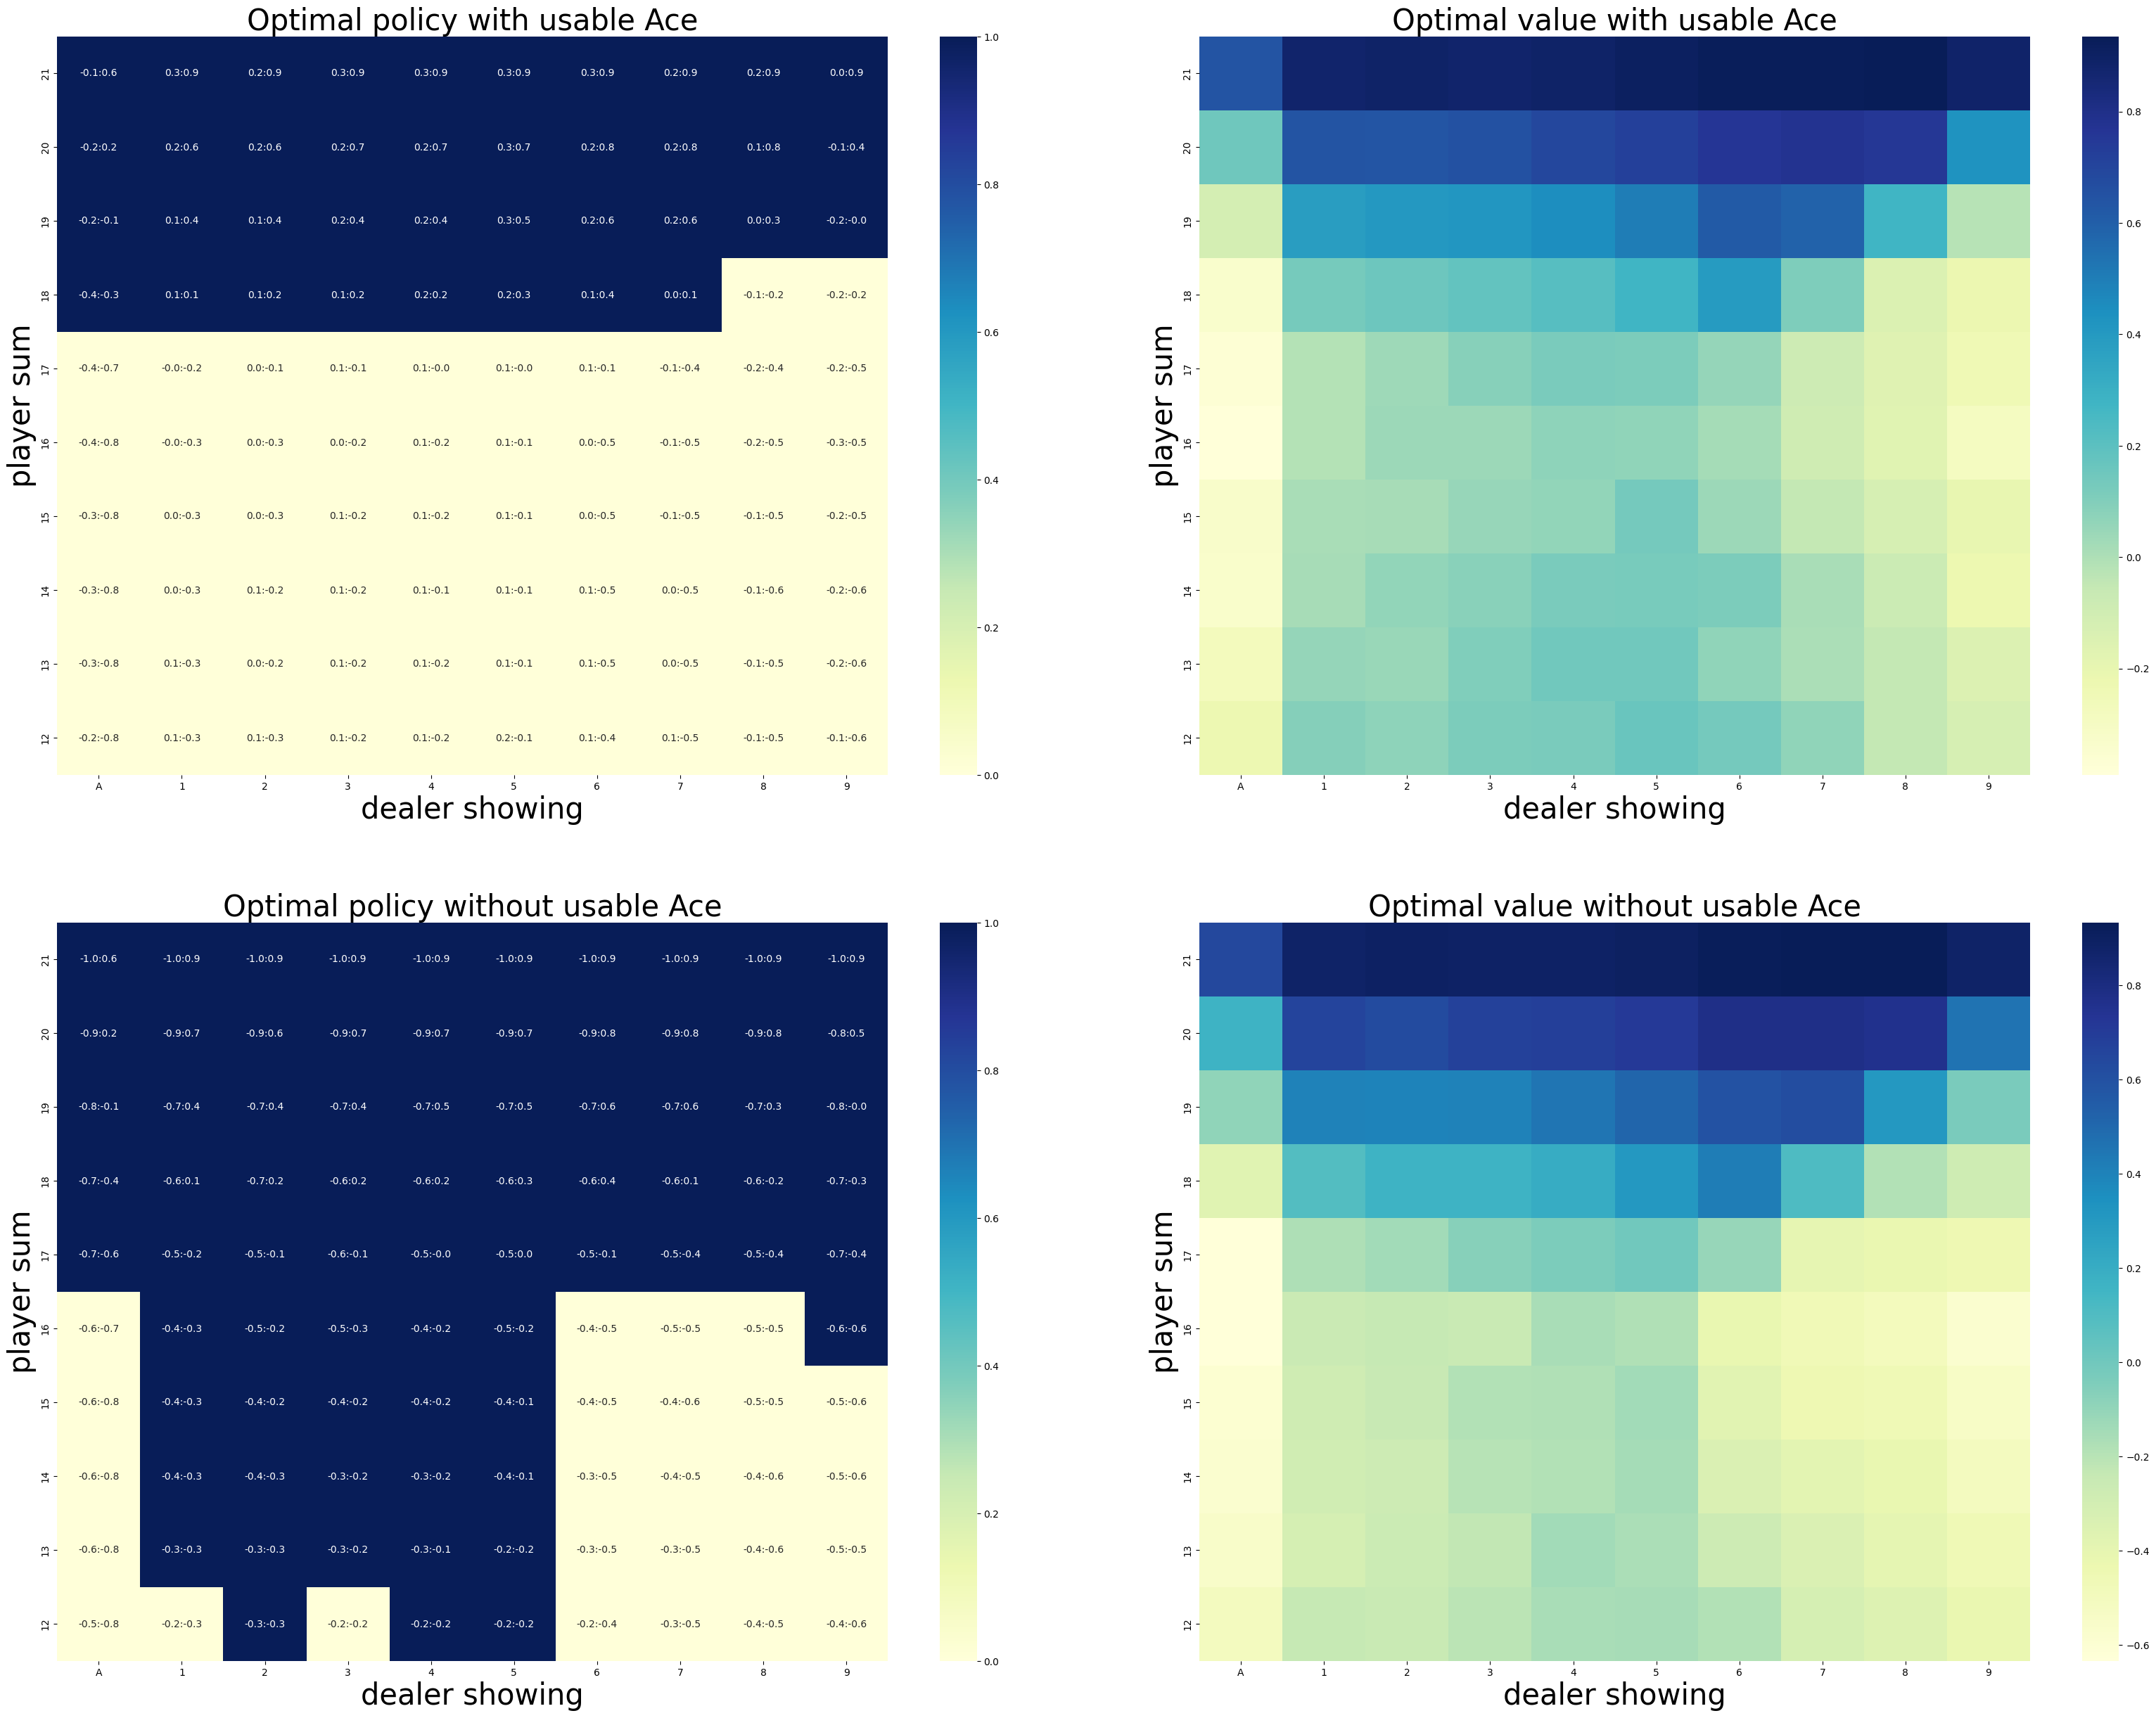

In [18]:
c5.blackjack.figure_5_2(state_action_values)

In [28]:
episodes = 500000
state_action_values = c5.blackjack.monte_carlo_es(episodes) 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:51<00:00, 4504.23it/s]


In [29]:
actual_reward, plan_reward, win_rate = c5.blackjack.compute_win_rate(episodes, state_action_values)
print(f'actual_reward: {actual_reward:.3f}\nplan_reward: {plan_reward:.3f}\nwin_rate: {win_rate:.3f}') 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:13<00:00, 6769.04it/s]

actual_reward: -0.046
plan_reward: -0.041
win_rate: 0.477


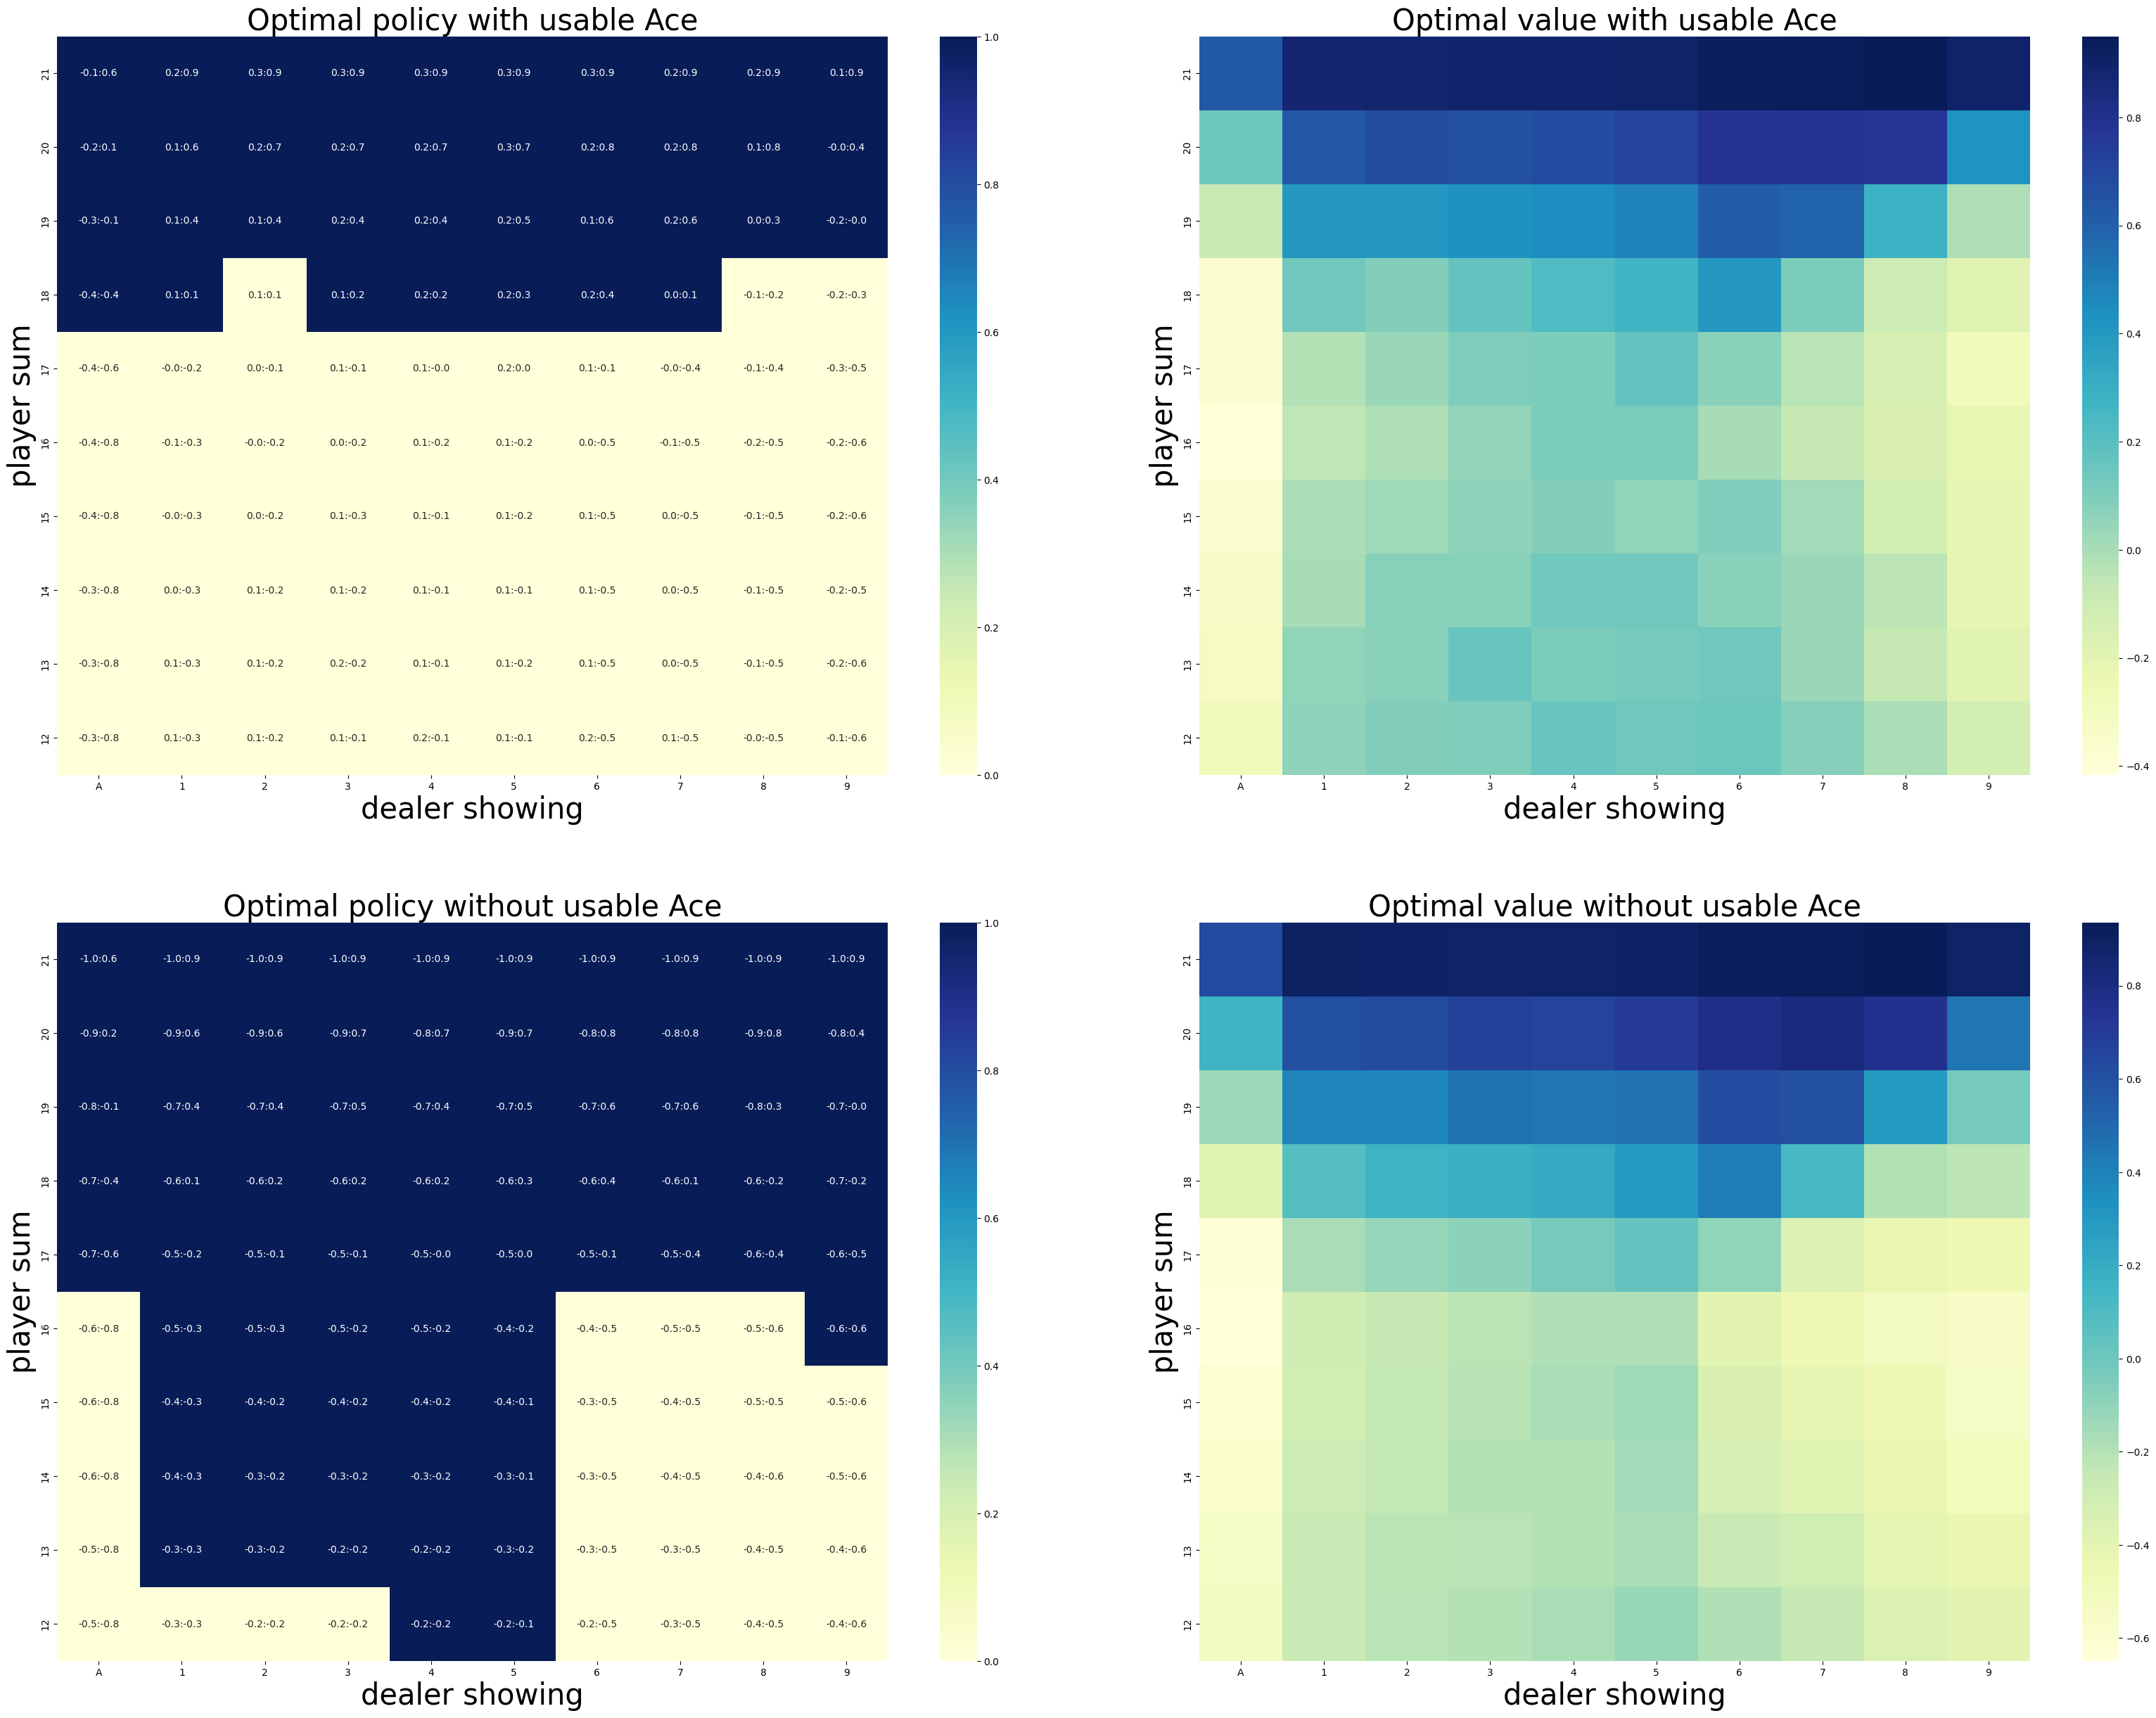

In [30]:
c5.blackjack.figure_5_2(state_action_values)

### figure_5_3

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.92it/s]


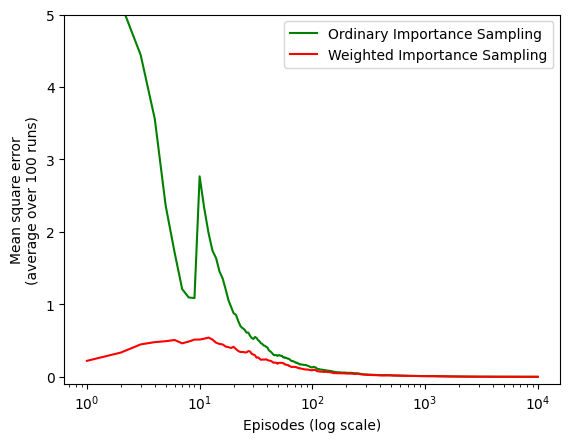

In [23]:
c5.blackjack.figure_5_3()

### figure_5_4

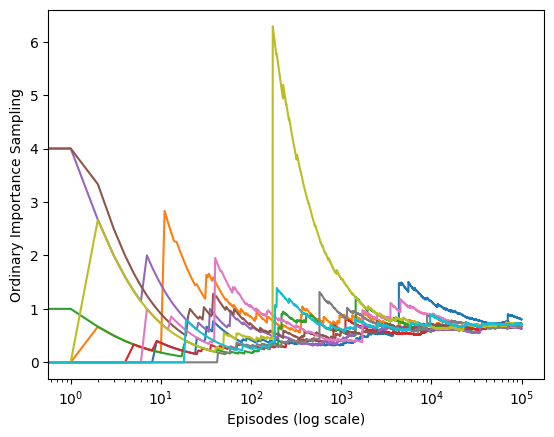

In [25]:
c5.infinite_variance.figure_5_4()

### exercise 5.12

In [3]:
def show_races(races, start_point, ncols = 3):
    nrows = int(len(races) / ncols)
    if len(races) % ncols != 0:
        nrows += 1 
        
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 + 4*nrows))
    for k, (episode, race) in enumerate(races.items()):
        i = k // ncols
        j = k % ncols        
        state, player_trajectory = race.play(race.greedy_target_policy_player, 
                                             start_position=start_point)  
        race.show_trajectory(state, player_trajectory, ax=axs[i, j], 
                             title=f'episode:{episode} return: {-len(player_trajectory)}' )

    plt.tight_layout()
    plt.show()

def get_races(race_name, sub_race='latest'):
    racetrack_csv = os.path.join("..", "code", "chapter05", "data", race_name + '.csv')
    races = {}
    eipsodes = [1000, 10000, 50000, 250000, 1000000, 2000000][::-1]
    for episode in eipsodes:
        q_path = os.path.join('model', race_name, sub_race, f"{episode}.pickle")
        races[episode] = c5.racetrack.RaceTrack(racetrack_csv, noise=0, gamma=1.0, q_path=q_path)
    return races

def show_best_trajectory(race, ncols = 3):
    nrows = int(len(race.starting_points) / ncols)
    if len(race.starting_points) % ncols != 0:
        nrows += 1 

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 + 4*nrows))

    for k, start_point in enumerate(race.starting_points):
        i = k // ncols
        j = k % ncols
        state, player_trajectory = race.play(race.greedy_target_policy_player, 
                                             start_position=start_point)  
        race.show_trajectory(state, player_trajectory, ax=axs[i, j], 
                             title=f'start: {start_point} return: {-len(player_trajectory)}' )         
    plt.tight_layout()
    plt.show()

#### default

In [4]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-left.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, reset_random=False)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-left', 'latest')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            
                            save_path=save_path)

 10%|████████████████▍                                                                                                                                                   | 199982/2000000 [10:23<1:26:58, 344.91it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [1:20:34<00:00, 413.66it/s]


In [ ]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-right.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, reset_random=False)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-right', 'latest')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

  3%|████▋                                                                                                                                                                | 57054/2000000 [02:31<1:04:26, 502.54it/s]

In [ ]:
races = get_races('figure05-05-left', sub_race='latest')
show_races(races, (0, 0))

In [ ]:
races = get_races('figure05-05-left', sub_race='latest')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

In [ ]:
races = get_races('figure05-05-right', sub_race='latest')
show_races(races, (15, 0))

In [ ]:
races = get_races('figure05-05-right', sub_race='latest')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

#### acceleration_reward

In [38]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-left.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, 
                              reset_random=False, acceleration_reward=-0.25)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-left', 'acceleration_reward')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [1:24:13<00:00, 395.75it/s]


In [40]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-right.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, 
                              reset_random=False, acceleration_reward=-0.25)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-right', 'acceleration_reward')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [46:57<00:00, 709.89it/s]


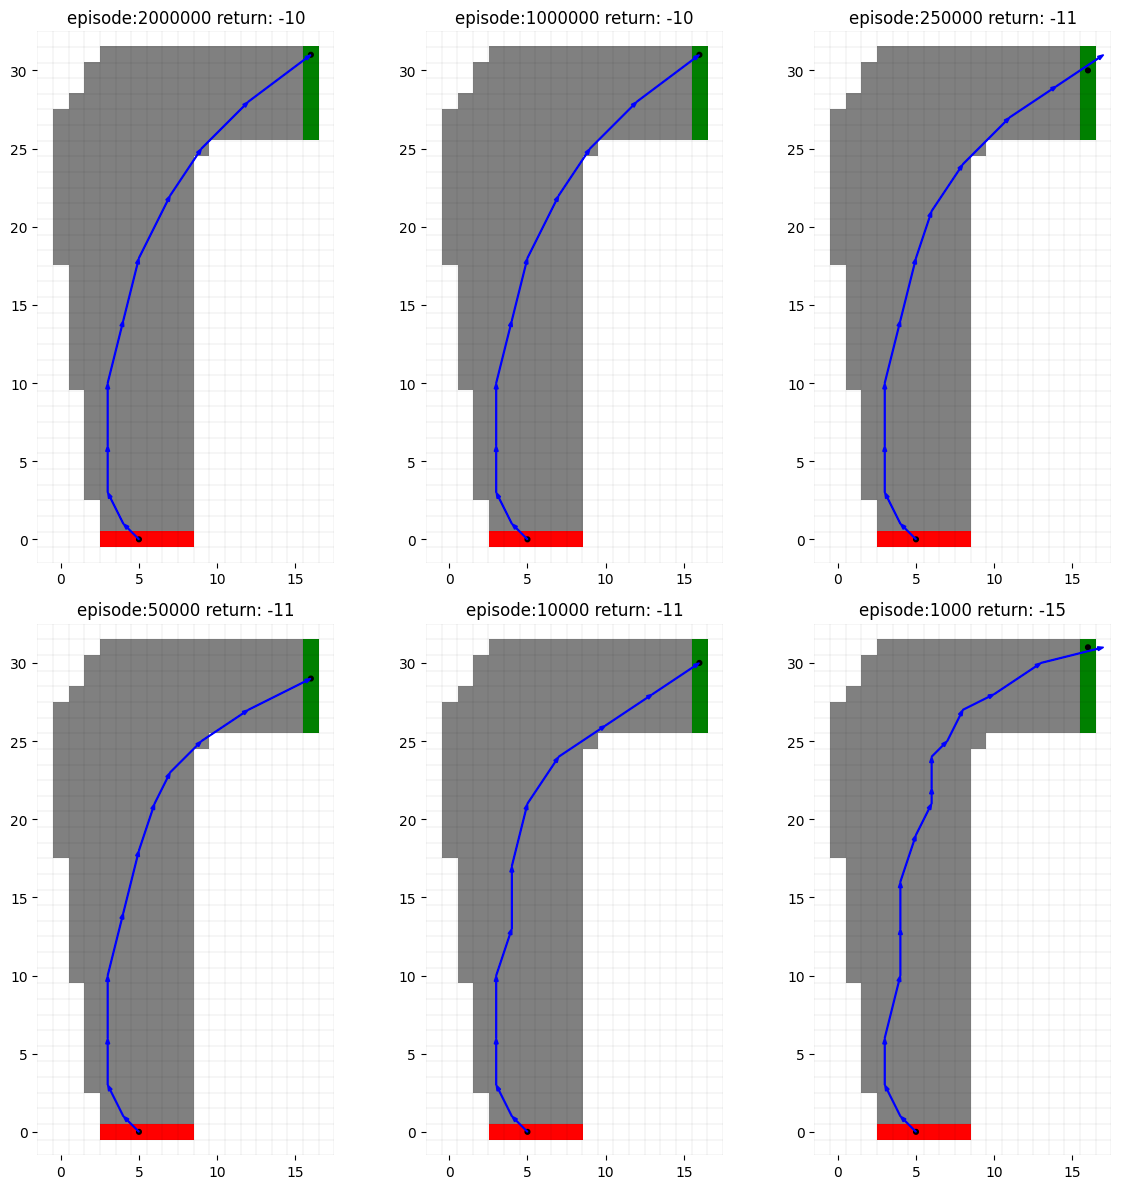

In [45]:
races = get_races('figure05-05-left', sub_race='acceleration_reward') 
show_races(races, (5, 0)) 

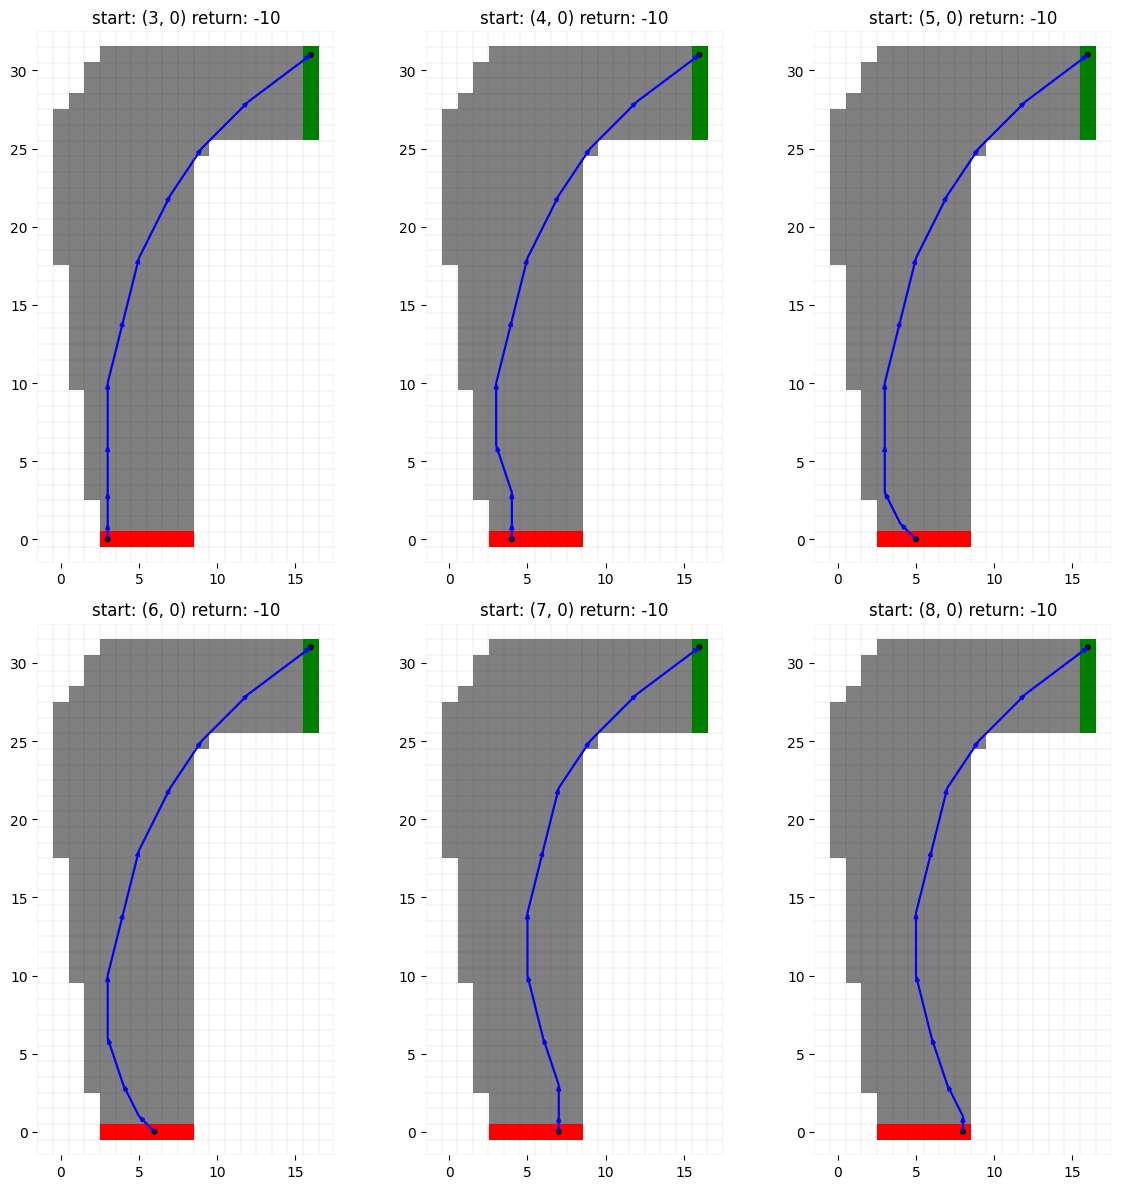

In [42]:
races = get_races('figure05-05-left', sub_race='acceleration_reward')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

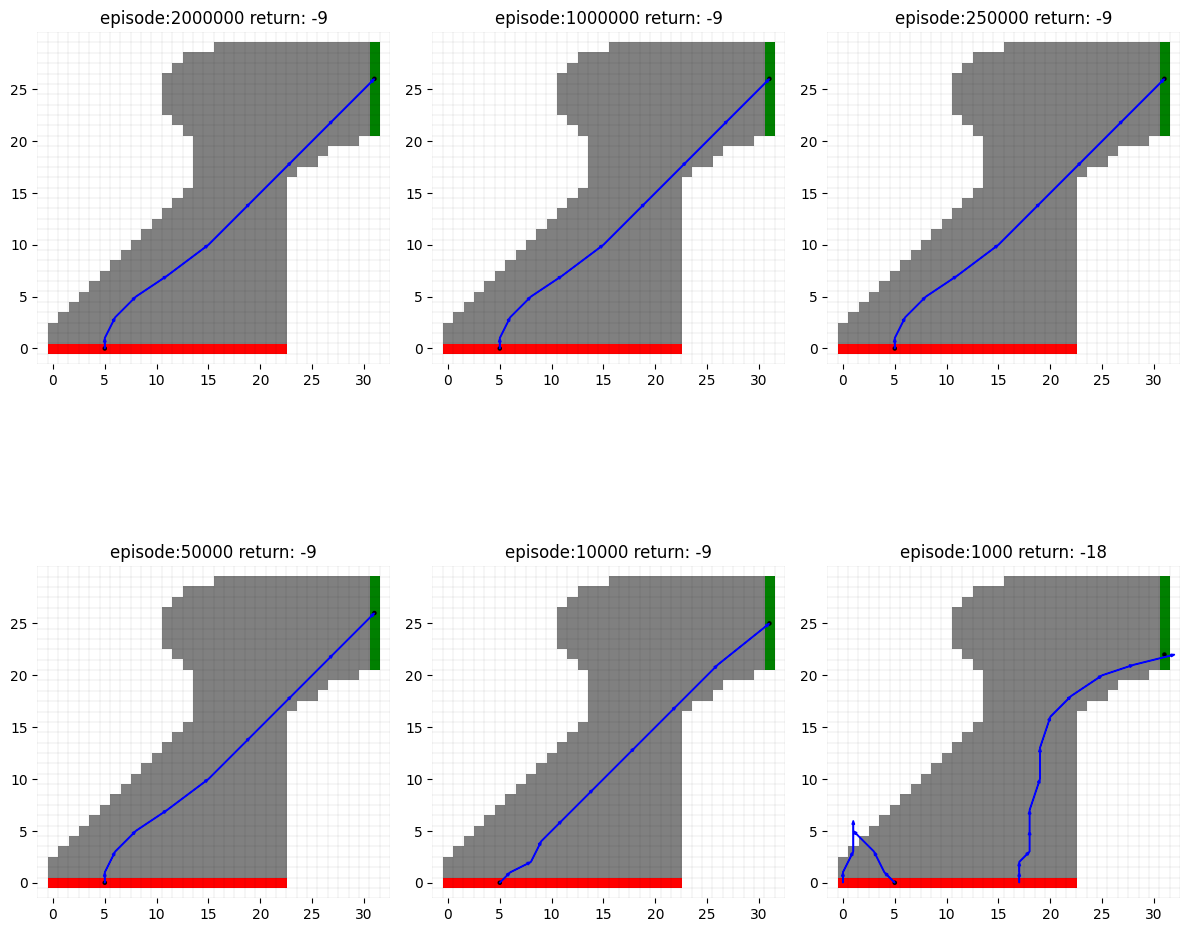

In [43]:
races = get_races('figure05-05-right', sub_race='acceleration_reward') 
show_races(races, (5, 0)) 

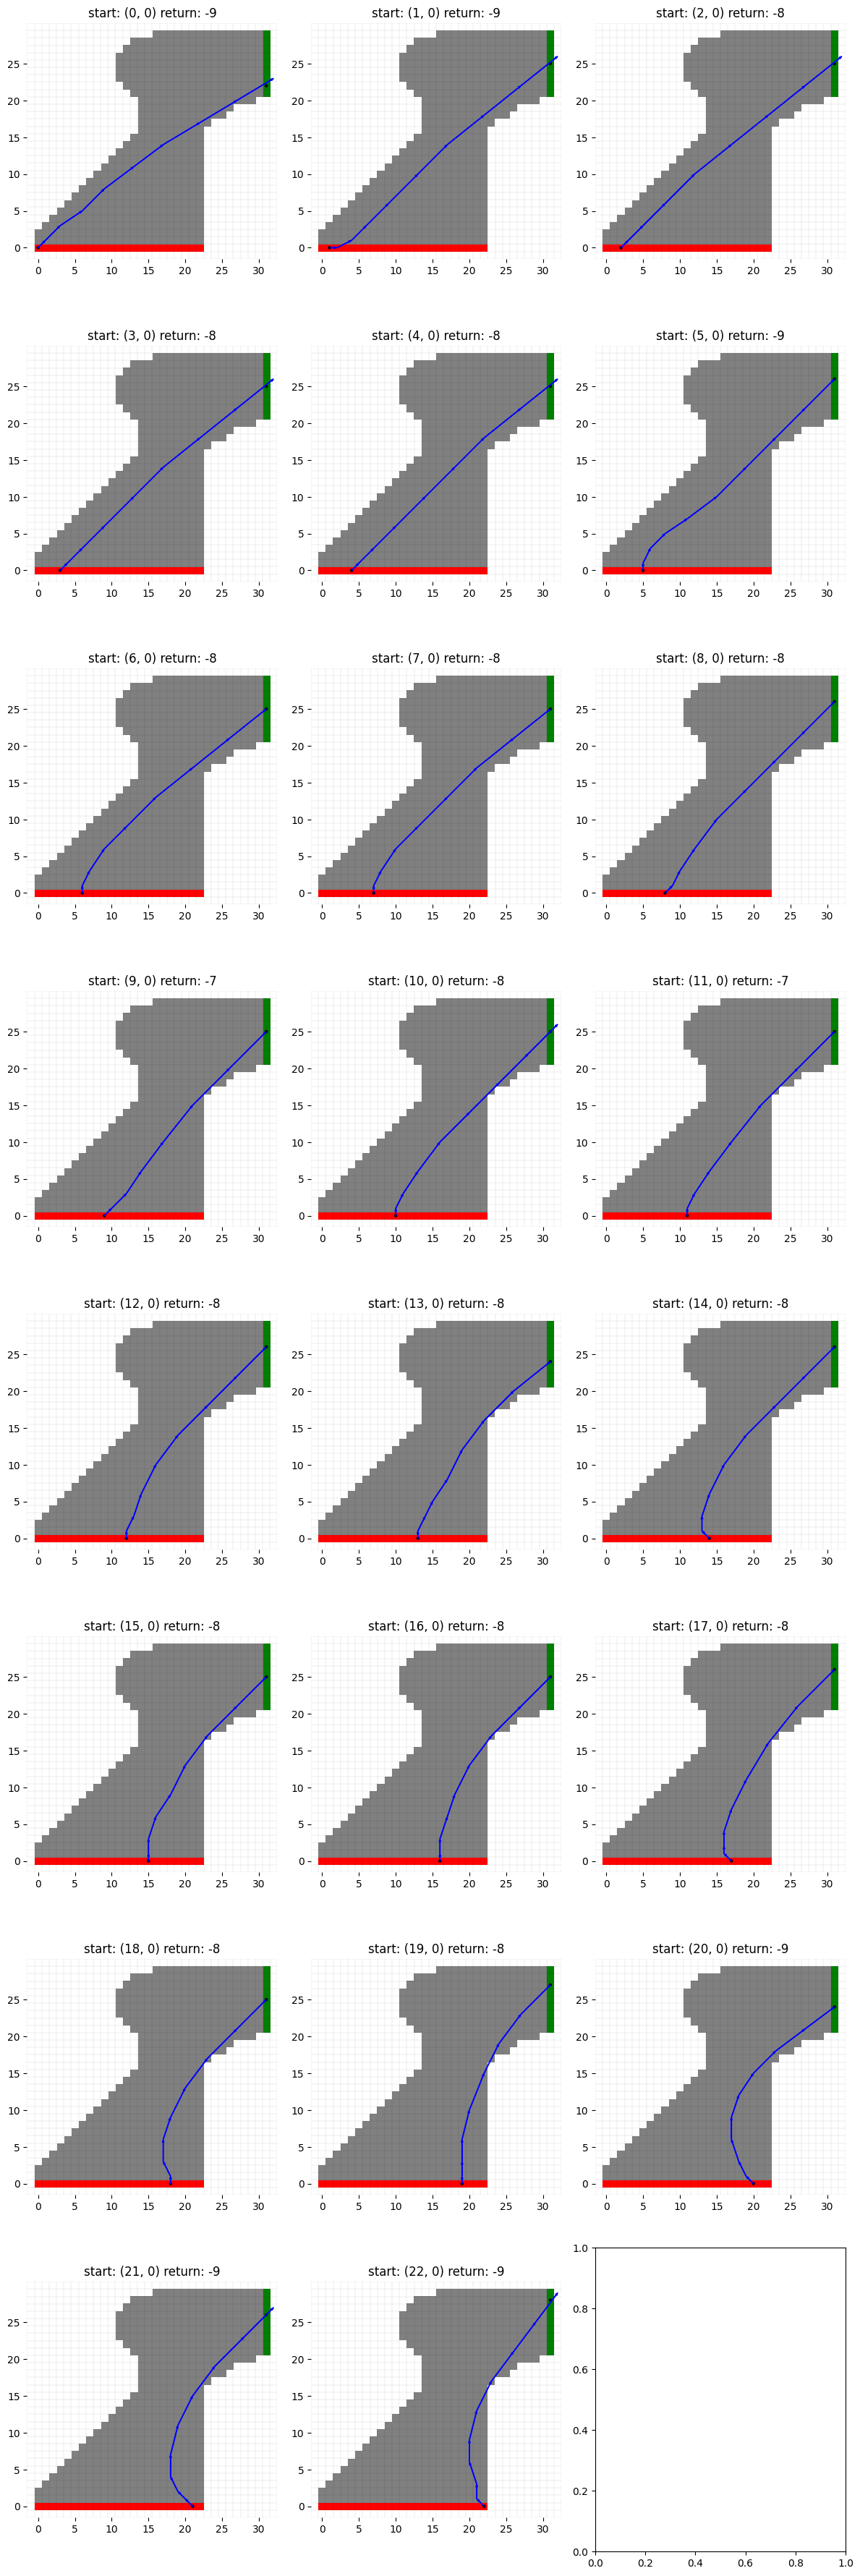

In [44]:
races = get_races('figure05-05-right', sub_race='acceleration_reward')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

#### unit test

In [63]:
import unittest 

suite1 = unittest.TestLoader().loadTestsFromTestCase(c5.test_racetrack.TestRaceTrack)
suite = unittest.TestSuite([suite1])
unittest.TextTestRunner(verbosity=2).run(suite)

test_get_actions (chapter05.test_racetrack.TestRaceTrack) ... ok
test_is_over_boundary (chapter05.test_racetrack.TestRaceTrack) ... ok
test_play (chapter05.test_racetrack.TestRaceTrack) ... ok
test_run (chapter05.test_racetrack.TestRaceTrack) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [111]:

print(race.racetrack, race.racetrack.shape) 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 

In [40]:
len(race.state_actions), race.use_state_actions_count   

(196, 332)

## Test

In [118]:
7 % 2

1

In [119]:
rent_nums, rent_probs, last_nums, last_probs = c4.car_rental.compute_rental_return_probs(3, 3, 3, constant_returned_cars=True)
print(rent_nums)
print(rent_probs)
print(last_nums)
print(last_probs, np.sum(last_probs))

TypeError: compute_rental_return_probs() missing 1 required positional argument: 'constant_rented_cars'

In [ ]:
rent_nums1, rent_probs1, last_nums1, last_probs1 = c4.car_rental.compute_rental_return_probs(3, 4, 2, constant_returned_cars=True)
print(rent_nums1)
print(rent_probs1)
print(last_nums1)
print(last_probs1, np.sum(last_probs1))
enumerate

In [ ]:
np.meshgrid(last_probs, last_probs1)

In [ ]:
np.sum(np.array([7.43625653e-03, 2.23087696e-02, 3.34631544e-02, 3.34631544e-02,
               2.50973658e-02, 1.50584195e-02, 7.52920974e-03, 3.22680417e-03,
               1.21005156e-03, 4.03350522e-04, 1.21005156e-04, 3.30014063e-05,
               8.25035158e-06, 1.90392729e-06, 4.07984419e-07, 8.15968837e-08,
               1.52994157e-08, 2.69989689e-09, 5.33451253e-10]) ) 

In [ ]:
[poisson.pmf(i, 3) * i for i in range(initial_cars + 1) +  (1 - poisson.cdf(initial_cars, 3))]

In [ ]:
sum(poisson.pmf(i, 3) * i for i in range(initial_cars + 1))

In [ ]:
a = [poisson.pmf(i, 3) for i in range(initial_cars)] + [1- poisson.cdf(initial_cars-1, 3) ] 
a

In [ ]:
np.sum(a)

In [ ]:
np.arrange(1, 10) 

In [ ]:
np.array([[1,2], [3,4]]).flatten()

In [ ]:
[(i,j) for i in range(3) for j in range(2)]  

In [ ]:
compute_rental_return_reward